In [ ]:
#первый план был обработать Куна по NER и пропустить через энкодинг и визуализировать классы
#примерно 2300 ER из них 1000 в склонениях
#переключился на English чтоб не было склонений и на Теогонию Гесиода для краткости
#если хоть немного зайдет на след шаге добавлю еще Гесиода, потом Гомера
#-------------------
#в английском переводе строчки не  начинаются с имен собственных, можно в нижний регистр опускать начало
#220406 1200 потратил 2 дня на список сущностей и только сейчас дошло, что можно было бы в греческом тексте остаться
#видимо испугался древнегреческого алфавита с другой стороны в греческом они могут перестать быть ner и сливаются с языком
#а может и это к лучшему тк уменьшится число сущностей
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

import pickle

!cp '/content/drive/MyDrive/word2vec.py' '/content/'
from word2vec import word2vec

def save_w2v(corp_file_path, w2v):
  #serialized = pickle.dumps(w2v)  # Сериализуем 
  with open(corp_file_path, "wb") as fp:
    pickle.dump(w2v, fp)

def load_w2v(corp_file_name):
  with open(corp_file_name, "rb") as fp:
    w2v = pickle.load(fp)
    return w2v

def extract_Ent_es(vocab):
  Ents_voc=[]
  for word in vocab:
    if word[0]>='A' and word[0]<='Z':
      Ents_voc.append(word)
  return Ents_voc

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#/content/drive/MyDrive/theog_n10ep_100_win10.w2v
#w2v=load_w2v('/content/drive/MyDrive/theog_n10ep_100_win10.w2v')
#w2v=load_w2v('/content/drive/MyDrive/theog_1_n_100_ep_100_win_9.w2v')
w2v=load_w2v('/content/drive/MyDrive/Theogony_3_n_3_ep_501_win_11.w2v')
w2v_Gilg=load_w2v('/content/drive/MyDrive/Gilg_1_n_100_ep_100_win_9.w2v')
w2v_file_list = [w2v, w2v_Gilg]

In [ ]:

#надо или с w2v сохранять или из словаря по заглавной букве доставать
Ents = ['Melpomene', 'Nilus', 'Meander', 'Amphitrite', 'Argos', 'Hades', 'Alemena', 'Euagore', 'Alpheus', 'Thaumas', 'Iolaus', 'Philommedes', 'Thoe', 'Polydorus',
        'Algea', 'Euarne', 'Limos', 'Latinus', 'Hestia', 'Echidna', 'Rivers', 'Ino', 'Rhesus', 'Anchises', 'Titans', 'Gyes', 'Amphirho', 'Aphrodite', 'Pherusa', 
        'Plutus', 'Medea', 'Harmonia', 'Agaue', 'Clymene', 'Laomedea', 'Odysseus', 'Typhoeus', 'Geryones', 'Phoreys', 'Menestho', 'Eos', 'Iasion', 'Actaea', 'Epimetheus',
        'Demeter', 'Notus', 'Zelus', 'Olmeius', 'Telesto', 'Eosphorus', 'Nemean', 'Pallas', 'Ianthe', 'Galatea', 'Menoetius', 'Aegeum', 'Lyetus', 'Perses', 'Cleio',# 'Lerna', 
        'Ceto', 'Pluto', 'Psamathe', 'Arges', 'Philyra', 'Chrysaor', 'Eurybia', 'Horae', 'Pontus', 'Phonos', 'Amphitryon', 'Asia', 'Maia', 'Nessus', 'Polyhymnia', 'Rhodius', 
        'Apesas', 'Tyche', 'Pasithoe', 'Enyo', 'Phasis', 'Prymno', 'Erato', 'Agrius', 'Chaos', 'Tithonus', 'Styx', 'Glauconome', 'Iason', 'Theia', 'Hadesoneus', #'Hydra',
        'Pontoporea', 'Crete', 'Zeus', 'Moros', 'Eudora', 'Iolcus', 'Eros', 'Chimaera', 'Apateon', 'Atropos', 'Urania', 'Othyrs', 'Pytho', 'Idyia', 'Lethe', 'Helius', 
        'HydraOfLerna', 'Triton', 'Strymon', 'Polynoe', 'Arima', 'Euryale', 'Aristaeus', 'Pelias', 'Phorcys', 'Jason', 'Harpies', 'Protomedea', 'Limping', 'Oceanus', #'Sun',
        'Haliacmon', 'Cytherea', 'Permessus', 'Nisaea', 'Slovoprenia', 'Cymopolea', 'Geras', 'Cymodoce', 'Euterpe', 'Erythea', 'Xanthe', 'Cerberus', 'Graiae', 'Ister', 'Medeus', 
        'Lysianassa', 'Peleus', 'Hermes', 'Galene', 'Bellerophon', 'Ares', 'Athene', 'Obriareus', 'Himerus', 'Ladon', 'Erinyes', 'Hippothoe', 'Pasithea', 'Meliae', 'Perseus', 
        'Ethiopians', 'Alimede', 'Mnemosyne', 'Admete', 'Dione', 'Cyprus', 'Parnassus', 'Terpsichore', 'Cythera', 'Achilles', 'Atlas', 'Acaste', 'Dynamene', 'Lachesis', 'Mecone', 
        'Autonoe', 'Pseudea', 'Ploto', 'Kera', 'Titan', 'Aeson', 'Thanatos', 'Speo', 'Hecate', 'Erigenia', 'Olympus', 'Thetis', 'Hippo', 'Tyrenians', 'Clotho', 'Europa', 'Cerceis', 
        'Themis', 'Lampetunt', 'Aeacus', 'Zephyrus', 'Rhodea', 'Caicus', 'Zeuxo', 'Peitho', 'Boreas', 'Artemis', 'Helicon', 'Philotis', 'Thebe', 'Briareos', 'Semele', 'Hesiod', 'Doris', 
        'Aello', 'Scamander', 'Lyctus', 'Tiryns', 'Neikea', 'Hera', 'Theban', 'Eurynome', 'Ianeira', 'Hyperion', 'Cymothoe', 'Melobosis', 'Achelous', 'Keras', 'Granicus', 
        'Hesperides', 'Memnon', 'Hemera', 'Alcmene', 'Galaxaura', 'Hermus', 'Plexaura', 'Mount', 'Forthwith', 'Poseidon', 'Iris', 'Metis', 'Simois', 'Nausithous', 'Coeus', 
        'Cymatolege', 'Zephyr', 'Olympian', 'Pegasus', 'Melite', 'Heptaporus', 'Calliope', 'Eucrante', 'Tartarus', 'Melian', 'Hephaestus', 'Orthus', 'Eione', 'Eunice', 'Selene', 
        'Aglaea', 'Nemea', 'Phaethon', 'Panopea', 'Eulimene', 'Aeneas', 'Telegonus', 'Prometheus', 'Thaleia', 'Sangarius', 'Machae', 'Heliconian', 'Halie', 'Pieria', 'Dionysus', 
        'Ocyrrhoe', 'Pemphredo', 'Calypso', 'Androktasiai', 'Nausinous', 'Astraeus', 'Steropes', 'Cronos', 'Cottus', 'Polydora', 'Cadmeans', 'Electra', 'Nereus', 'Ariadne', 'Tethys', 
        'Sphinx', 'Petraea', 'Hypnos', 'Uranus', 'Erebus', 'Brontes', 'Hysmina', 'Chryseis', 'Peneus', 'Nemertes', 'Iapetus', 'Moirocaust', 'Hebe', 'Persephone', 'Eridanus', 'Cephalus', 
        'Sthenno', 'Alcmena', 'Apollo', 'Aesepus', 'Amphilology', 'Heracles', 'Gorgons', 'Hipponoe', 'Sao', 'Minos', 'TretusOfNemea', 'Ocean', 'Leto', 'Eileithyia', 'Typhaon', 
        'Perseis', 'Cadmus', 'Giants', 'Medusa', 'Nyx', 'Ida', 'Tritogeneia', 'Cheiron', 'Rhea', 'Clytie', 'Crius', 'Glauce', 'Cymo', 'Helios', 'Callirrhoe', 'Aeetes']


1921


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


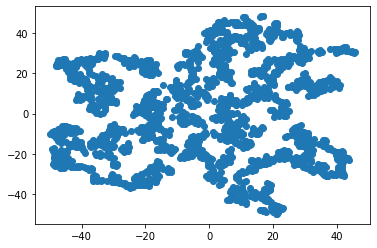

In [ ]:
from sklearn.manifold import TSNE
import re
import matplotlib.pyplot as plt

#X = w2v.w1
X=dict(zip(w2v.words_list, w2v.w1))
print (len(X))

vec = np.array(list(X.values()))

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(vec)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.show()

In [ ]:
'''
with open("/content/drive/MyDrive/Theogony.pkl", "rb") as fp:
  text_only = pickle.load(fp)
text_only
'''
#какая-то шляпа, почему-то не заменились сущности в 100-мерном ембидинге, сделаем проверку, 
#в Гильгамеше тоже пригодится там список сущностей избыточный изначально
new_Ents=[]
for Ent_ie in Ents:
  if Ent_ie in list(X.keys()):
    new_Ents.append(Ent_ie)
  else: print(Ent_ie)

Ents=new_Ents




Alemena
Limos
Rivers
Nemean
Lethe
Limping
Cytherea
Obriareus
Titan
Lampetunt
Theban
Alcmene
TretusOfNemea


In [ ]:
#res = list(test_dict.keys()).index(search_key)
 
res = [list(X.keys()).index(i) for i in Ents]
w_counter =[w2v.words_counts[i] for i in res]
#print(w_counter)
df = pd.DataFrame(X_tsne[res], index=Ents, columns=['x', 'y'])
df['w_index']=res
df['w_counter']=w_counter


#df.info()
#df.loc[df.index=='Zeus']

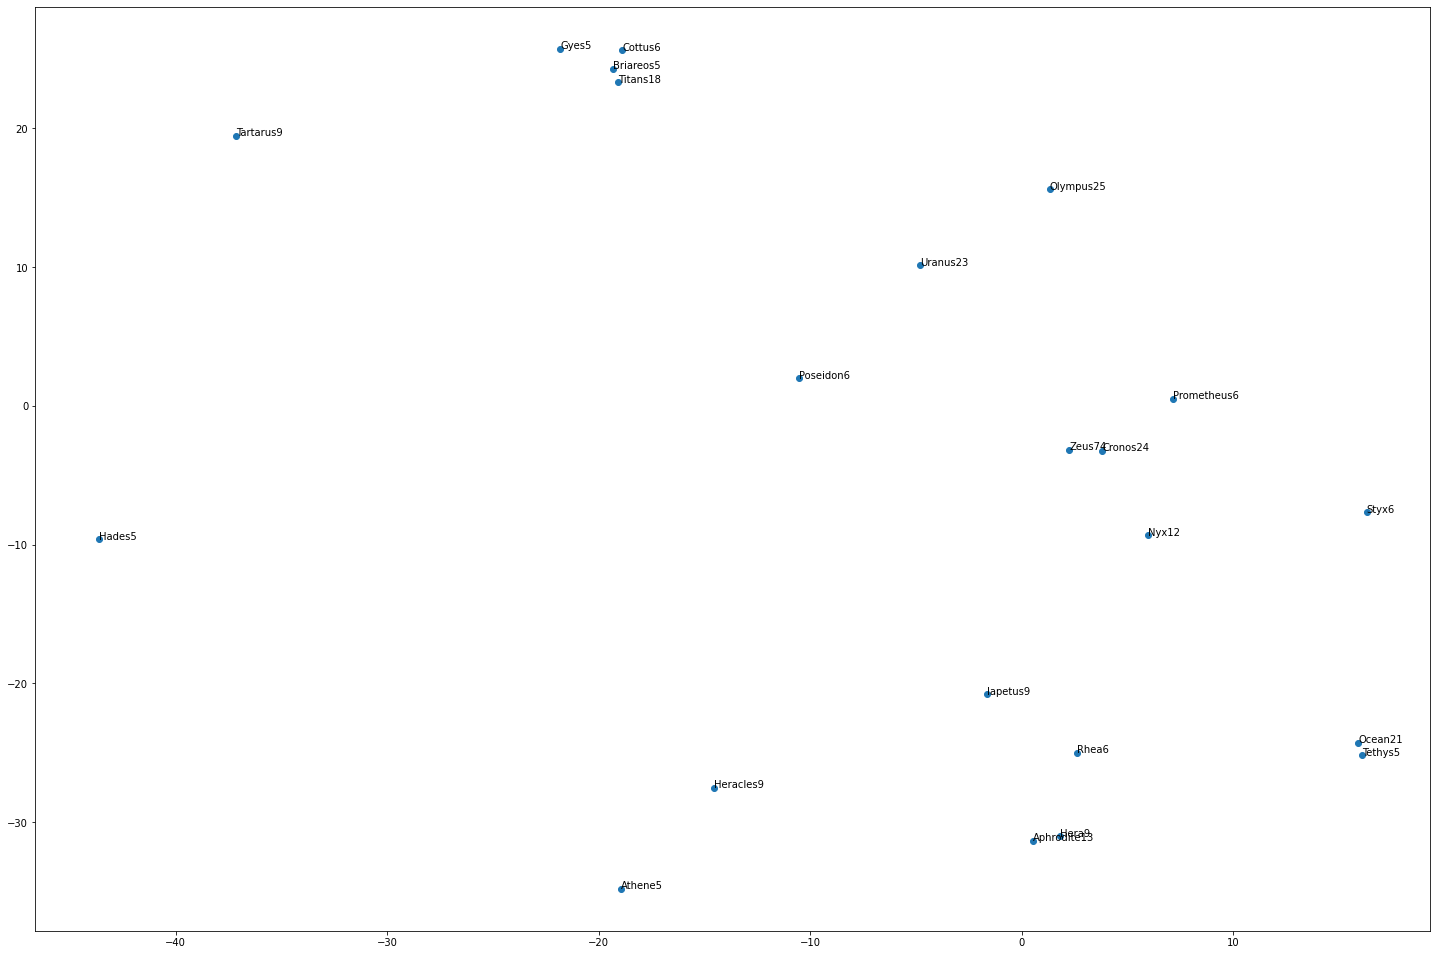

In [ ]:
df_plt = df[df['w_counter']>4]
#plt.scatter(X_tsne[res, 0], X_tsne[res, 1])
#plt.show()
fig = plt.figure(figsize=(25,17))
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df_plt['x'], df_plt['y'])
for word, pos in df_plt.iterrows():
  ax.annotate(word+str(int(pos[-1:])),pos[:-2])
  #print(pos[:-2])

In [ ]:
#закодировать координату цветом 
#или 3 координаты RGB
#закодировать координату размером

In [ ]:
def out_red(text):
    print("\033[34m{}".format(text))
#out_red("ПРИВЕТ")
#print("\033[3m\033[33m\033[41m{}\033[0m".format("Htua_0111100000"))
#print("\033[41m{}\033[0m".format("  "))
#print("\033[42m{}\033[0m".format(" A"))
s=''
for i in range(40,48):
  #print("\033[42m{}\033[0m".format(" A"))
  #print("\033[{}\033[0m".format(str(i)+"m A"))
  s+="\033[{}".format(str(i)+"m  ")
s+="\033[0m"
print(s)
#плавного не сделать перехода

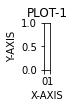

In [ ]:
from matplotlib.patches import Rectangle

x_max = w2v.w1.shape[1]
y_max = len(df_plt.index)

fig = plt.figure(figsize=(x_max, y_max//5))
ax = fig.add_subplot(x_max+1, y_max+1, 1)

ax.add_patch(Rectangle((2, 2), 1, 2))
plt.xlabel("X-AXIS")
plt.ylabel("Y-AXIS")
plt.title("PLOT-1")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


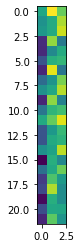

In [ ]:
from PIL import Image
import requests
from io import BytesIO

df_plt['w2v'] = [X[i] for i in df_plt.index]
#print(df_plt.head())

#data = vec[res]
#data = np.random.randn(25, 25)
data = np.array(list(df_plt['w2v']))
#print(type(data),type(data[0]), data.shape, data[0].shape)#, data[0])

plt.imshow(data)
#print(df_plt.head())


In [ ]:
data.max(), data.min()

(2.726263356245721, -2.62395523526424)

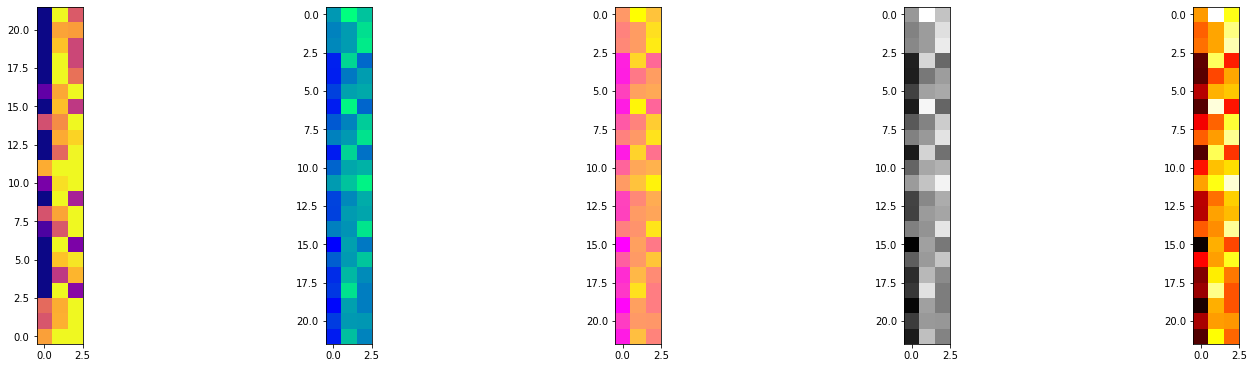

In [ ]:
fig, axs = plt.subplots(1, 5, figsize=(20,5), constrained_layout=True)
p1 = axs[0].imshow(data, cmap='plasma', aspect='equal', vmin=-1, vmax=1, origin="lower")
#fig.colorbar(p1, ax=axs[0])
p2 = axs[1].imshow(data, cmap='winter', aspect='equal', origin="upper")#, extent=(0, 30, 0, 15))#interpolation='gaussian',
#fig.colorbar(p2, ax=axs[1])
p3 = axs[2].imshow(data, cmap='spring', aspect='equal')#, extent=(5, 0, 15, 0))#interpolation='gaussian',
#fig.colorbar(p3, ax=axs[2])
p4 = axs[3].imshow(data, cmap='gray', aspect='equal')#, extent=(5, 0, 15, 0))#interpolation='gaussian',
#fig.colorbar(p4, ax=axs[3])
p5 = axs[4].imshow(data, cmap='hot', aspect='equal')#, extent=(5, 0, 15, 0))#interpolation='gaussian',
#fig.colorbar(p5, ax=axs[4])

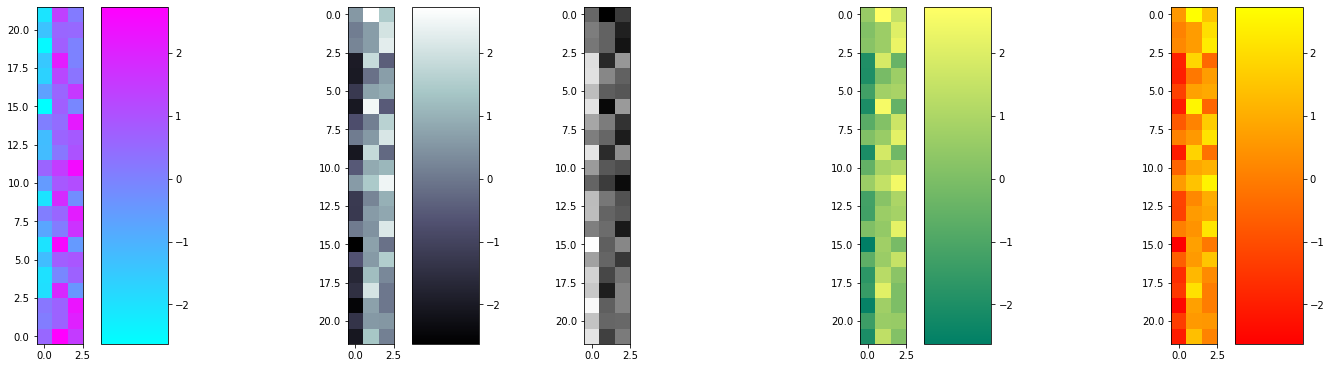

In [ ]:
fig, axs = plt.subplots(1, 5, figsize=(20,5), constrained_layout=True)
p1 = axs[0].imshow(data, cmap='cool', aspect='equal', origin="lower")
fig.colorbar(p1, ax=axs[0])
p2 = axs[1].imshow(data, cmap='bone', aspect='equal', origin="upper")#, extent=(0, 30, 0, 15))#interpolation='gaussian',
fig.colorbar(p2, ax=axs[1])
p3 = axs[2].imshow(data, cmap='binary', aspect='equal')#, extent=(30, 30, 30, 30))#interpolation='gaussian',
#fig.colorbar(p3, ax=axs[2])
p4 = axs[3].imshow(data, cmap='summer', aspect='equal')#, extent=(5, 0, 15, 0))#interpolation='gaussian',
fig.colorbar(p4, ax=axs[3])
p5 = axs[4].imshow(data, cmap='autumn', aspect='equal')#, extent=(5, 0, 15, 0))#interpolation='gaussian',
fig.colorbar(p5, ax=axs[4])

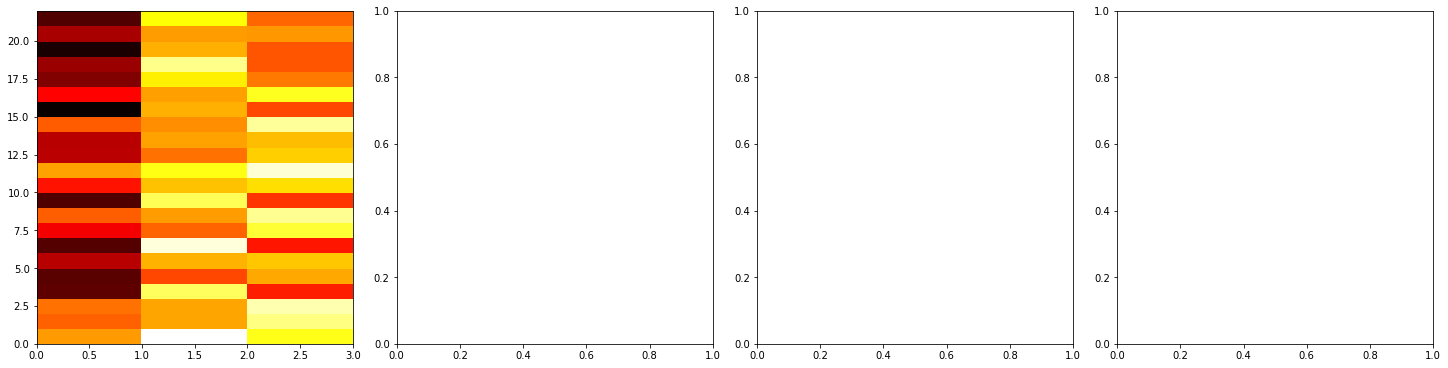

In [ ]:
#победил hot в нем 4 полюса белый, черный, желтый, красный
fig, axs = plt.subplots(1, 4, figsize=(20,5), constrained_layout=True)
p1 = axs[0].pcolormesh(data, cmap='hot')#, edgecolors="k", shading='flat'
#fig.colorbar(p1, ax=axs[0])
#p2 = axs[1].pcolormesh(data, cmap='gray')#, edgecolors="k", shading='flat'
#fig.colorbar(p2, ax=axs[1])
#p3 = axs[2].pcolormesh(data, cmap='bone')#, edgecolors="k", shading='flat'
#fig.colorbar(p3, ax=axs[2])
#p4 = axs[3].imshow(data, cmap='')#aspect='equal'#, extent=(5, 0, 15, 0))#interpolation='gaussian',

#plt.pcolormesh(data, cmap='plasma')#, edgecolors="k", shading='flat'

In [ ]:
#дальше посмотрели на тепловых картах w2v разной размерности 
#текстовые метки пока не знаю как выве5сти, он и к лучшему, за уши ничего притягивать не будет повода
w2v_file_list=['/content/drive/MyDrive/theog_n10ep_100_win10.w2v']
w2v_file_list.append('/content/drive/MyDrive/theog_n5ep_100_win10.w2v')
w2v_file_list.append('/content/drive/MyDrive/theog_n3ep_100_win10.w2v')
w2v_file_list.append('/content/drive/MyDrive/theog_n_2_ep_100_win_10.w2v')

w2v_list=[]
for f_name in w2v_file_list:
  w2v_list.append(load_w2v(f_name))

In [ ]:
for w2v_sample in w2v_list:
  column_name='w2v_n_'+str(w2v_sample.n)
  #print(column_name,w2v_sample.w1.shape)
  df_plt[column_name] = [w2v_sample.w1[j] for j in df_plt.w_index]
print(df_plt.info())
df_plt.head()

<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, Hades to Rhea
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   x          22 non-null     float32
 1   y          22 non-null     float32
 2   w_index    22 non-null     int64  
 3   w_counter  22 non-null     int64  
 4   w2v        22 non-null     object 
 5   w2v_n_10   22 non-null     object 
 6   w2v_n_5    22 non-null     object 
 7   w2v_n_3    22 non-null     object 
 8   w2v_n_2    22 non-null     object 
dtypes: float32(2), int64(2), object(5)
memory usage: 2.1+ KB
None


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


x          y  w_index  w_counter  \
Hades     -43.643253  -9.629653      896          5   
Titans    -19.108223  23.304821      622         18   
Gyes      -21.819214  25.729017      484          5   
Aphrodite   0.544370 -31.341286       85         13   
Styx       16.308920  -7.676228     1016          6   

                                                         w2v  \
Hades      [0.5677257277570225, 2.726263356245721, 1.4832...   
Titans     [0.10387901288155488, 0.6430442105671854, 2.05...   
Gyes       [0.23838605636002883, 0.6372460926510995, 2.29...   
Aphrodite  [-1.9534975527676528, 1.8500184076871933, -0.4...   
Styx       [-1.9857174505191966, -0.09603361809503941, 0....   

                                                    w2v_n_10  \
Hades      [1.3989171853720324, 0.20503401359114304, 0.70...   
Titans     [2.148564497887661, -0.7169468003638365, -0.24...   
Gyes       [0.681620635691374, -0.25733798953856685, 2.10...   
Aphrodite  [0.14139486524795314, 0.5693255059257932, 0.43...   
Styx       [1.22083602903301, -0.8246048765269469, 1.7698...   

                                                     w2v_n_5  \
Hades      [0.36765592106980954, -0.23076125740854422, 0....   
Titans     [1.8980612010100695, -1.4501810931609727, 0.16...   
Gyes       [-1.2097126888800476, -2.310717984483522, 0.48...   
Aphrodite  [0.9682731700442401, -0.04456484976901878, 0.5...   
Styx       [2.2024398075850034, -2.2595398466038157, 2.86...   

                                                     w2v_n_3  \
Hades      [-0.9489285876900027, -1.9018000160677042, -0....   
Titans     [-1.6871369815111217, -0.18496618272488108, -1...   
Gyes       [0.8226099712947641, -1.5184706811256463, -1.4...   
Aphrodite  [-1.0355322786331786, -1.5115346780895267, -0....   
Styx       [-2.3512577096802993, 1.7532052381458252, -2.5...   

                                               w2v_n_2  
Hades       [0.23092448542286126, -1.6686992708126618]  
Titans        [1.727035049659622, -0.6343546531846156]  
Gyes       [-0.05467742391967963, -1.8630036701112636]  
Aphrodite    [0.8063945132422695, -1.2875197038077575]  
Styx          [3.6405650647048007, 0.6415510737814543]

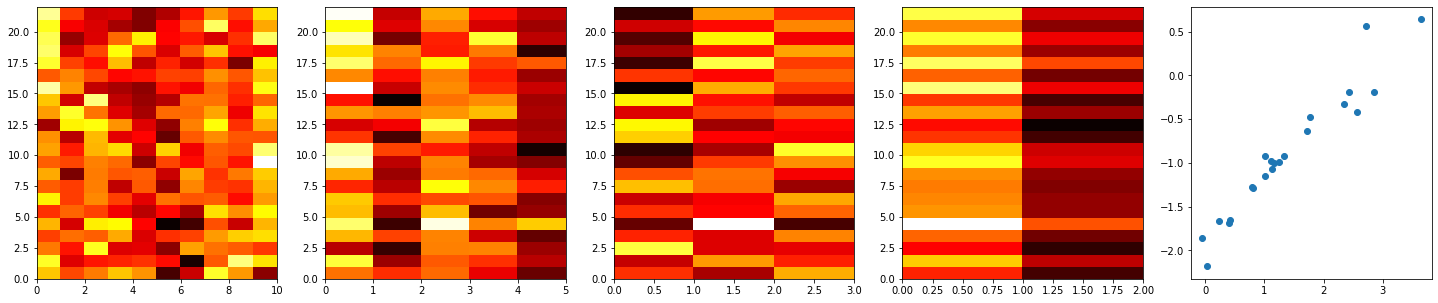

In [ ]:
plt.gcf().clear()
plt.clf()
plt.cla()
plt.close() 
fig, axs = plt.subplots(1, len(w2v_list)+1, figsize=(25,5))#, constrained_layout=True)
for i, w2v_sample in enumerate(w2v_list):
  #сейчас сам не понимаю, отчего бы прямо из класса не рисовать
  column_name='w2v_n_'+str(w2v_sample.n)
  data = np.array(list(df_plt[column_name]))
  axs[i].pcolormesh(data, cmap='hot')
axs[len(w2v_list)].scatter(data[:,0],data[:,1])
#for word, row in df_plt.iterrows():
  #print(row[:2])
  #axs[len(w2v_list)].annotate(word+str(pos['w_counter']),row[:2])
  #axs[len(w2v_list)].annotate(str(pos['w_counter']),row[:2])
plt.show()

In [ ]:
print(data)

[[ 0.23092449 -1.66869927]
 [ 1.72703505 -0.63435465]
 [-0.05467742 -1.86300367]
 [ 0.80639451 -1.2875197 ]
 [ 3.64056506  0.64155107]
 [ 1.24110486 -0.99273199]
 [ 1.11270028 -0.9792207 ]
 [ 1.01332197 -1.15380581]
 [ 1.16297477 -0.99948763]
 [ 2.34820855 -0.32079906]
 [ 1.77548258 -0.47921232]
 [ 0.3962367  -1.68748838]
 [ 0.0299745  -2.18374829]
 [ 1.33902478 -0.92076979]
 [ 0.42021985 -1.65323532]
 [ 2.85193091 -0.18713575]
 [ 0.78330171 -1.26972497]
 [ 2.72360933  0.56632048]
 [ 1.01521248 -0.9224141 ]
 [ 2.43370243 -0.19333312]
 [ 1.13559171 -1.07436115]
 [ 2.55794429 -0.41372926]]


In [ ]:
#сравнить tnse и 2 мерный emb, можно ли не множить Emb макс размерностей а оставить только макс Emb и tnse
#не понял, причем тут было n_components, на выходе все равно 2 не доразбирался бросил
#похоже нельзя
'''
#vec = np.array(list(X.values()))
n_components=[2,3,5,10][::-1]#ошибся с порядком
fig, axs = plt.subplots(1, len(w2v_list)+1, figsize=(25,5))#, constrained_layout=True)
tsne_list=[]
X_tsne_list=[]
for i,w2v_sample in enumerate(w2v_list):
  print(n_components[i])
  tsne_list.append(TSNE(n_components=n_components[i]))

  column_name='w2v_n_'+str(w2v_list[0].n)#w2v_sample не нужен
  print(column_name)
  data = np.array(list(df_plt[column_name]))

  X_tsne_list.append(tsne.fit_transform(data))
  print(X_tsne_list[i].shape)
  axs[i].pcolormesh(X_tsne_list[i], cmap='hot')

plt.scatter(X_tsne_list[-1][:, 0], X_tsne_list[-1][:, 1])
plt.show()
'''

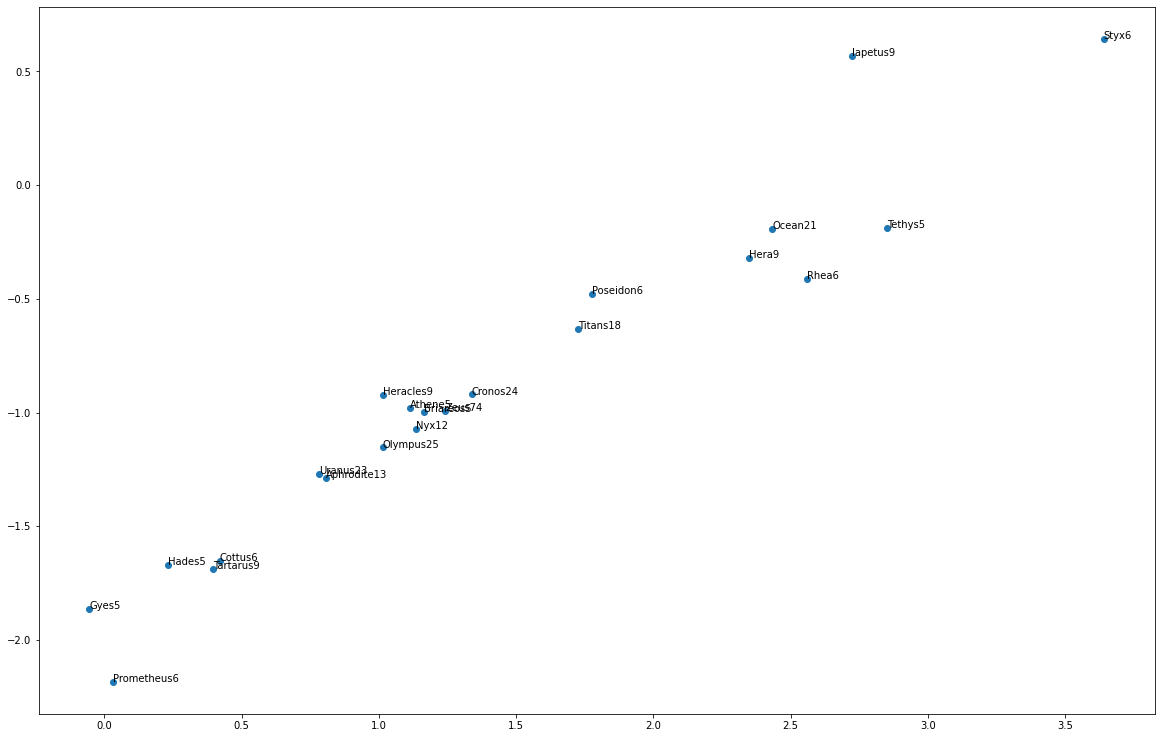

In [ ]:
fig = plt.figure(figsize=(20,13))
ax = fig.add_subplot(1, 1, 1)


ax.scatter(data[:,0], data[:,1])

for word, pos in df_plt.iterrows():
  #print(pos)
  xy = pos['w2v_n_2']
  #xy = (xy[0],xy[1])  
  #print(xy,  list(pos['w2v_n_2']))
  #ax.annotate(word+str(int(pos[-1:])),list(pos['w2v_n_2']))
  ax.annotate(word+str(int(pos['w_counter'])),xy)
#нипанятна как понимать, 10-мерный красивее сворачивается tsne первая картинка

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


w2v_n_100_w_15


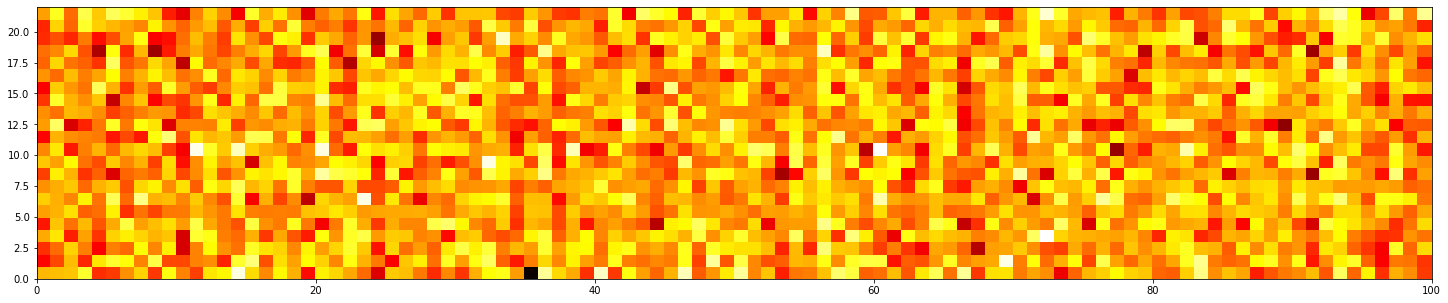

0 Hades
1 Titans
2 Gyes
3 Aphrodite
4 Styx
5 Zeus
6 Athene
7 Olympus
8 Briareos
9 Hera
10 Poseidon
11 Tartarus
12 Prometheus
13 Cronos
14 Cottus
15 Tethys
16 Uranus
17 Iapetus
18 Heracles
19 Ocean
20 Nyx
21 Rhea


In [ ]:
#еще посмотрели на тепловых картах w2v n=10 c разыми окнами w=5,7,10
w2v_file_list=['/content/drive/MyDrive/theog_1_n_100_ep_100_win_15.w2v']
#w2v_file_list.append('/content/drive/MyDrive/theog_1_n_100_ep_100_win_9.w2v')
#w2v_file_list.append('/content/drive/MyDrive/theog_1_n_100_ep_100_win_5.w2v')

'''
w2v_file_list=['/content/drive/MyDrive/theog_n10ep_100_win10.w2v']
w2v_file_list.append('/content/drive/MyDrive/theog_n_10_ep_100_win_7.w2v')
w2v_file_list.append('/content/drive/MyDrive/theog_n_10_ep_100_win_5.w2v')
'''

w2v_list=[]
for f_name in w2v_file_list:
  w2v_list.append(load_w2v(f_name))

for w2v_sample in w2v_list:
  column_name='w2v_n_'+str(w2v_sample.n)+'_w_'+str(w2v_sample.window)
  #print(column_name,w2v_sample.w1.shape)
  df_plt[column_name] = [w2v_sample.w1[j] for j in df_plt.w_index]
#print(df_plt.info())
#df_plt.head()

fig, axs = plt.subplots(1, len(w2v_list), figsize=(25,5))#, constrained_layout=True)
for i, w2v_sample in enumerate(w2v_list):
  #сейчас сам не понимаю, отчего бы прямо из класса не рисовать только из-за column_name
  column_name='w2v_n_'+str(w2v_sample.n)+'_w_'+str(w2v_sample.window)
  print(column_name)
  data = np.array(list(df_plt[column_name]))
  if len(w2v_list)==1: axs.pcolormesh(data, cmap='hot')
  else: axs[i].pcolormesh(data, cmap='hot')
plt.show()

'''
#транспонировали, тут нет смысла, но вообще мб
fig, axs = plt.subplots(1, len(w2v_list), figsize=(25,5))#, constrained_layout=True)
for i, w2v_sample in enumerate(w2v_list):
  #сейчас сам не понимаю, отчего бы прямо из класса не рисовать только из-за column_name
  column_name='w2v_n_'+str(w2v_sample.n)+'_w_'+str(w2v_sample.window)
  print(column_name)
  data = np.array(list(df_plt[column_name]))
  axs[i].pcolormesh(data.T, cmap='hot')
plt.show()
'''
i=0
for Ent, row in df_plt.iterrows():#возьмем короткий список из графика
  print(i,Ent)
  i+=1


In [ ]:
#for Ent, row in df_plt.iterrows():#возьмемкороткий список из графика
for Ent, row in df.iterrows():#возьмемкороткий список из графика
  sims=w2v.vec_sim(Ent)
  Neighb=[]
  for Word in sims:
    #print(Word[0])
    if Word[0] in Ents:# а искать соседей будем по полному
      Neighb.append(Word[0])
      if len(Neighb)==10:
        print(Neighb)
        continue

['Melpomene', 'Peitho', 'Euterpe', 'Polyhymnia', 'Terpsichore', 'Calliope', 'Admete', 'Ianthe', 'Cleio', 'Nemertes']
['Nilus', 'Alpheus', 'Strymon', 'Geras', 'Eridanus', 'Meander', 'Ister', 'Semele', 'Minos', 'Ariadne']
['Meander', 'Geras', 'Strymon', 'Ister', 'Eridanus', 'Alpheus', 'Phasis', 'Nilus', 'Rhesus', 'Heptaporus']
['Amphitrite', 'Speo', 'Cymothoe', 'Glauce', 'Doris', 'Galene', 'Pasithea', 'Halie', 'Eunice', 'Erato']
['Argos', 'Philotis', 'Apateon', 'Epimetheus', 'Clotho', 'Maia', 'Lachesis', 'Gorgons', 'Thetis', 'Graiae']
['Hades', 'Cerberus', 'Meliae', 'Typhoeus', 'Persephone', 'Philommedes', 'Cyprus', 'Pegasus', 'Pelias', 'Ares']
['Euagore', 'Laomedea', 'Polynoe', 'Asia', 'Melobosis', 'Chryseis', 'Polydora', 'Pontoporea', 'Lysianassa', 'Cerceis']
['Alpheus', 'Nilus', 'Strymon', 'Geras', 'Eridanus', 'Meander', 'Ister', 'Phasis', 'Semele', 'Rhesus']
['Thaumas', 'Prometheus', 'Cronos', 'Zeus', 'Nyx', 'Mecone', 'Forthwith', 'Ceto', 'Othyrs', 'Melian']
['Iolaus', 'Eos', 'Erigen

In [ ]:
#правки в словарь Theban
#Alcmene=Alcmena
#Obriareus Briareos

#Titans Titan - оставлял намеренно, проверить соседей
#['Obriareus', 'Gyes', 'Briareos'] - общие
#['Titans', 'Tartarus', 'Obriareus', 'Pelias', 'Iolcus', 'Cottus', 'Gyes', 'Olympian', 'Briareos', 'Othyrs']
#['Titans','Tartarus', 'Pelias', 'Iolcus', 'Cottus', 'Olympian', 'Othyrs']
#['Titan', 'Lampetunt', 'Obriareus', 'Cottus', 'Chaos', 'Gyes', 'Briareos', 'Uranus', 'Tyche', 'Theban']

#['Titan', 'Lampetunt', 'Cottus', 'Chaos', 'Uranus', 'Tyche', 'Theban']

In [ ]:
import pandas as pd

w2v_file_list = [#'/content/drive/MyDrive/theog_1_n_100_ep_100_win_9.w2v',
                 #'/content/drive/MyDrive/Gilg_1_n_100_ep_100_win_9.w2v',
                 '/content/drive/MyDrive/Theogony_3_n_3_ep_851_win_11.w2v',
                 '/content/drive/MyDrive/Gilg_n_3_ep_25_win_11.w2v',
                 '/content/drive/MyDrive/The_Genesis_n_3_ep_151_win_11.w2v'
                 ]

w2v_class_list=[]
w2v_list=[]
df_list=[]
Ents_list=[]#Лист словарей сущность - кол-во вхождений

for f_name in w2v_file_list:
  #w2v_class_list.append(load_w2v(f_name))
  w2v_class=load_w2v(f_name)

  w2v_list.append(dict(zip(w2v_class.words_list, w2v_class.w1)))
  
  df=pd.DataFrame(index=w2v_class.words_list)
  df['words_counts']=w2v_class.words_counts


  Ents_list.append(extract_Ent_es(w2v_class.words_list))#сначала выделим список

  #dict(zip(w2v.words_list, w2v.w1))
  df_list.append(df)


(2, 3)


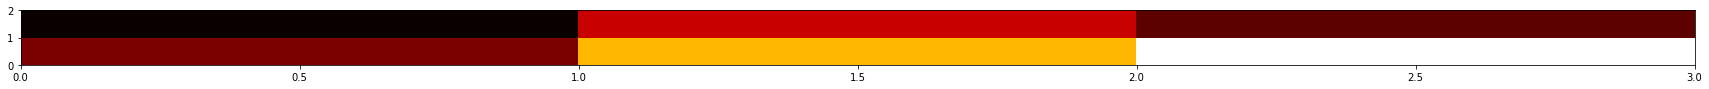

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data=np.array([w2v_list[0]['Uranus'], w2v_list[1]['Enkidu']])
print(data.shape)
fig = plt.figure(figsize=(30,1))#, constrained_layout=True)
plt.pcolormesh(data, cmap='hot')
plt.show()

In [ ]:
#def vec_sim(self, word, top_n=0):
def vec_sim(Emb, vec, top_n=0, f_print=True):#ищем макс похожие на вектор (той же размерности из любого эмбидинга)
    """
              Найти похожие слова
    """
    v_w1 = vec
    word_sim = {}

    for i in Emb.keys():
        v_w2 = Emb[i]
        theta_sum = np.dot(v_w1, v_w2)

        # np.linalg.norm (v_w1) Найти норму По умолчанию используется норма 2, которая является квадратичной степенью суммы квадратов
        theta_den = np.linalg.norm(v_w1) * np.linalg.norm(v_w2)
        theta = theta_sum / theta_den

        word_sim[i] = theta
    
    #print(word_sim.items())
    words_sorted = sorted(word_sim.items(), key=lambda kv: kv[1], reverse=True)
    #print(words_sorted)

    if top_n>0:
      words_sorted = words_sorted[:top_n]
      if f_print:
        for word, sim in words_sorted[:top_n]:
            print(word, sim)
    return words_sorted

def most_sims_person(emb_for_search, Entity_vec, Ent_list):
  #по уму надо бы сначала срез по эмбидингам делать а потом похожие искать
  #потом если руки дойдут, пока хочется посмотреть что получится
  vec_sim_sample = vec_sim(emb_for_search, Entity_vec, top_n=0)
  #print(vec_sim_sample)
  sims_Ents=[]
  for word,_ in vec_sim_sample:
    if word in Ent_list:
      sims_Ents.append(word)
  return(sims_Ents)

#vec_sim_sample = vec_sim(w2v_list[1], w2v_list[0]['Zeus'], top_n=5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


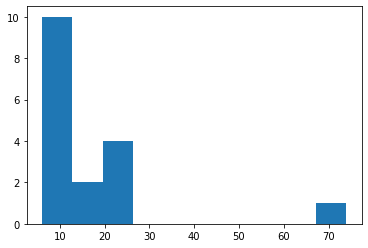

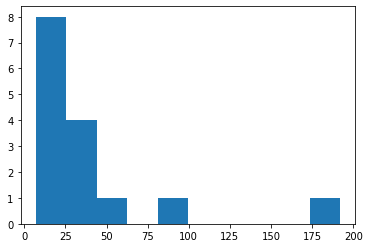

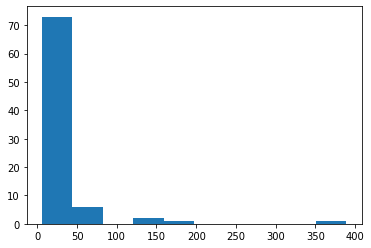

17 ['Zeus', 'Olympus', 'Cronos', 'Uranus', 'Ocean', 'Titans', 'Aphrodite', 'Nyx', 'Iapetus', 'Hera', 'Tartarus', 'Heracles', 'Poseidon', 'Rhea', 'Cottus', 'Styx', 'Prometheus']
15 ['Gilgamesh', 'Enkidu', 'Uruk', 'Humbaba', 'Shamash', 'Utnapishtim', 'Enlil', 'Urshanabi', 'Bull', 'Anu', 'Ninsun', 'Ishtar', 'Heaven', 'Ea', 'Lugulbanda']
83 ['God', 'Jacob', 'Joseph', 'Abraham', 'Egypt', 'Pharaoh', 'Isaac', 'Esau', 'Laban', 'Abram', 'Canaan', 'Rachel', 'Israel', 'Noah', 'Sarah', 'Lot', 'Rebekah', 'Leah', 'Judah', 'Abimelech', 'Sodom', 'Shechem', 'Cain', 'Sarai', 'King', 'Ishmael', 'Nahor', 'Come', 'Shem', 'Benjamin', 'Haran', 'Reuben', 'Egyptians', 'Hagar', 'Bethel', 'Ephron', 'Edom', 'Hittites', 'Shelah', 'Beer', 'Paddan', 'Manasseh', 'Hamor', 'Simeon', 'Hittite', 'Goshen', 'Mamre', 'Enoch', 'Ham', 'Japheth', 'Lamech', 'Canaanites', 'Ephraim', 'Seir', 'Bethuel', 'Abel', 'Terah', 'Bilhah', 'Gomorrah', 'Anah', 'Gerar', 'Philistines', 'Adah', 'Eliphaz', 'Eber', 'Milcah', 'Oholibamah', 'Zoar',

In [ ]:
import matplotlib.pyplot as plt
most_freq=5
Most_Freq_Ents=[]
for tmp_ind in range(len(df_list)):
  df=df_list[tmp_ind]
  Most_Freq_Ents.append(df[df.index.isin(Ents_list[tmp_ind])][df['words_counts']>most_freq].sort_values('words_counts', ascending=False).index.to_list())
  distr = df[df.index.isin(Ents_list[tmp_ind])][df['words_counts']>most_freq].sort_values('words_counts', ascending=True)['words_counts'].to_list()
  #print(distr)
  plt.hist(distr)
  plt.show()
print(len(Most_Freq_Ents[0]),Most_Freq_Ents[0])
print(len(Most_Freq_Ents[1]),Most_Freq_Ents[1])
print(len(Most_Freq_Ents[2]),Most_Freq_Ents[2])


In [ ]:
#навскидку
#Гильгемеш - Геракл (боролся со львами и ходил на тот свет, но в Теогонии об этом нет ничего), 
#Энкиду - Уран , Рея, Геракл (львам от него тоже перепало)
#Иштар Афродита (здесь), Артемида и Деметра (вообще, здесь не заметил такого контекста)
#Гелиос - Шамаш как солнце и Urshanabi как лодочник (в Теогонии нет про это)
#прочие стихийные боги, месопотамских не знаю, об этом мало в Гильгамеше

In [ ]:
#vec_sim_sample = vec_sim(w2v_list[1], w2v_list[0]['Zeus'])
#print(vec_sim_sample[:5])
coolest_Ents_num=10
for i,Entities_list in enumerate(Most_Freq_Ents):
  print('**************')
  for Entity in Entities_list:
    for j,Ents_list_other in enumerate(Most_Freq_Ents):
    #for j,Ents_list_other in enumerate(Ents_list):
      #if i!=j:
        sims_Ents = most_sims_person(w2v_list[j], w2v_list[i][Entity], Ents_list_other)
        print(Entity,sims_Ents[:coolest_Ents_num])


**************
Zeus ['Zeus', 'Cronos', 'Nyx', 'Prometheus', 'Iapetus', 'Poseidon', 'Rhea', 'Uranus', 'Styx', 'Ocean']
Zeus ['Humbaba', 'Bull', 'Urshanabi', 'Gilgamesh', 'Heaven', 'Enkidu', 'Ishtar', 'Shamash', 'Ninsun', 'Anu']
Zeus ['Zibeon', 'Oholibamah', 'Anah', 'Eliphaz', 'Basemath', 'Seir', 'Shelah', 'Canaanite', 'Edom', 'Enosh']
Olympus ['Olympus', 'Uranus', 'Cottus', 'Prometheus', 'Titans', 'Poseidon', 'Zeus', 'Cronos', 'Tartarus', 'Styx']
Olympus ['Heaven', 'Bull', 'Humbaba', 'Ishtar', 'Anu', 'Enlil', 'Ninsun', 'Uruk', 'Shamash', 'Gilgamesh']
Olympus ['Oholibamah', 'Zibeon', 'Anah', 'Eliphaz', 'Basemath', 'Shelah', 'Enosh', 'Adah', 'Esau', 'Eber']
Cronos ['Cronos', 'Zeus', 'Nyx', 'Prometheus', 'Iapetus', 'Rhea', 'Styx', 'Ocean', 'Poseidon', 'Uranus']
Cronos ['Humbaba', 'Urshanabi', 'Gilgamesh', 'Bull', 'Heaven', 'Enkidu', 'Shamash', 'Ninsun', 'Ishtar', 'Anu']
Cronos ['Zibeon', 'Oholibamah', 'Anah', 'Eliphaz', 'Basemath', 'Seir', 'Shelah', 'Adah', 'Enosh', 'Canaanite']
Uranus ['U

In [ ]:
#в табличке выше ничего хорошего может и не быть, тк каждый эмбидинг построен в своем пространстве
#могло бы и тут что-нибудь хорошее появиться, если бы пространства примерно совпали, но это маловероятно, по крайней мере не нужно  на это надеяться
#если разобраться  - что по осям, теоретически их можно как-то друг к другу научиться приводить
#для начала можно попробовать общее пространство 
#(если до этого дойдет дело нужно будет сравнить эмб полученные расчетом и суммированием ранее имевшихся)

In [ ]:
#сначала не нашел в английском переводе Гигантов, чуть позже нашел Giants, одно вхождение, в русском переводе -2
#надо функцию рисующую рядом указаные word2veci

In [ ]:

df = df_list[0]
print(df[df.index=='Zeus'])

      words_counts
Zeus            74


In [ ]:
#посмотрим проработку эпохами
#надо бы сделать функцией этот блок
import pandas as pd

w2v_file_list = [#'/content/drive/MyDrive/theog_1_n_50_ep_113_win_11.w2v',
                 #'/content/drive/MyDrive/theog_1_n_50_ep_413_win_11.w2v'
                 '/content/drive/MyDrive/Theogony_3_n_3_ep_351_win_11.w2v',
                 '/content/drive/MyDrive/Theogony_3_n_3_ep_851_win_11.w2v'
                 ]

#сейчас все кроме w2v одинаковое и можно бы без этого обойтись, но

w2v_class_list=[]
w2v_list=[]
df_list=[]
Ents_list=[]

for f_name in w2v_file_list:
  #w2v_class_list.append(load_w2v(f_name))
  w2v_class=load_w2v(f_name)

  w2v_list.append(dict(zip(w2v_class.words_list, w2v_class.w1)))
  
  df=pd.DataFrame(index=w2v_class.words_list)
  df['words_counts']=w2v_class.words_counts

  Ents_list.append(extract_Ent_es(w2v_class.words_list))#сначала выделим список

  #dict(zip(w2v.words_list, w2v.w1))
  df_list.append(df)

most_freq=5
coolest_Ents_num=10

Most_Freq_Ents=[]
for tmp_ind in range(len(df_list)):
  df=df_list[tmp_ind]
  Most_Freq_Ents.append(df[df.index.isin(Ents_list[tmp_ind])][df['words_counts']>most_freq].sort_values('words_counts', ascending=False).index.to_list())

sims_Ents_list=[]
for i,Entities_list in enumerate(Most_Freq_Ents):#перебираем список списков ВИП
  print('**************')
  sims_Ents_list.append([])
  #print('ibeg',i, len(sims_Ents_list))
  for Entity in Entities_list:
    #надо не список ВИП а весь список сущностей перебирать for j,Ents_list_other in enumerate(Most_Freq_Ents):#снова перебираем список список ВИП, пропуская список выбраный выше
    for j,Ents_list_other in enumerate(Most_Freq_Ents):#теперь перебираем весь NER
      sims_Ents_list[i].append({})
      if i!=j:
        sims_Ents = most_sims_person(w2v_list[j], w2v_list[i][Entity], Ents_list_other)
        sims_Ents_list[i][j][Entity]=sims_Ents[:coolest_Ents_num]
        print(Entity,sims_Ents[:coolest_Ents_num])
      #print('iend',i, len(sims_Ents_list[i]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


**************
Zeus ['Zeus', 'Cronos', 'Prometheus', 'Nyx', 'Uranus', 'Poseidon', 'Olympus', 'Styx', 'Iapetus', 'Rhea']
Olympus ['Uranus', 'Olympus', 'Titans', 'Cottus', 'Poseidon', 'Tartarus', 'Prometheus', 'Zeus', 'Cronos', 'Nyx']
Cronos ['Prometheus', 'Cronos', 'Zeus', 'Nyx', 'Uranus', 'Olympus', 'Styx', 'Poseidon', 'Iapetus', 'Ocean']
Uranus ['Uranus', 'Poseidon', 'Titans', 'Olympus', 'Cottus', 'Tartarus', 'Zeus', 'Cronos', 'Prometheus', 'Nyx']
Ocean ['Styx', 'Ocean', 'Prometheus', 'Nyx', 'Cronos', 'Zeus', 'Rhea', 'Iapetus', 'Hera', 'Olympus']
Titans ['Tartarus', 'Titans', 'Poseidon', 'Cottus', 'Uranus', 'Olympus', 'Zeus', 'Cronos', 'Prometheus', 'Heracles']
Aphrodite ['Ocean', 'Rhea', 'Nyx', 'Iapetus', 'Hera', 'Aphrodite', 'Styx', 'Cronos', 'Zeus', 'Heracles']
Nyx ['Prometheus', 'Cronos', 'Zeus', 'Styx', 'Nyx', 'Olympus', 'Ocean', 'Uranus', 'Iapetus', 'Rhea']
Iapetus ['Nyx', 'Ocean', 'Cronos', 'Styx', 'Zeus', 'Iapetus', 'Rhea', 'Prometheus', 'Hera', 'Aphrodite']
Hera ['Ocean', 'Ny

In [ ]:
#len(sims_Ents_list[0][4])
for Ent in sims_Ents_list[0][1].keys():
  #print(Ent, set(sims_Ents_list[0][1][Ent]))
  #print(Ent, len(set(sims_Ents_list[1][0][Ent])), set(sims_Ents_list[1][0][Ent]))
  diff=set(sims_Ents_list[0][1][Ent])-set(sims_Ents_list[1][0][Ent])
  if len(diff)!=0: print('изменения ближайших соседей  для ', Ent, diff)
  
#Zeus {'Cronos', 'Tartarus', 'Aphrodite', 'Heracles', 'Ocean', 'Olympus', 'Poseidon', 'Uranus', 'Cottus', 'Iapetus', 'Titans', 'Apollo', 'Hera', 'Styx', 'Prometheus', 'Nyx', 'Rhea', 'Zeus'}
#Zeus {'Cronos', 'Aphrodite', 'Tartarus', 'Ocean', 'Prometheus', 'Uranus', 'Poseidon', 'Olympus', 'Cottus', 'Iapetus', 'Titans', 'Apollo', 'Hera', 'Styx', 'Heracles', 'Nyx', 'Rhea', 'Zeus'}
#что-то есть, на множествах не видно, тк обрезаны


изменения ближайших соседей  для  Zeus {'Styx', 'Olympus'}
изменения ближайших соседей  для  Olympus {'Tartarus'}
изменения ближайших соседей  для  Cronos {'Ocean', 'Styx', 'Olympus'}
изменения ближайших соседей  для  Ocean {'Prometheus', 'Olympus'}
изменения ближайших соседей  для  Titans {'Heracles'}
изменения ближайших соседей  для  Aphrodite {'Styx'}
изменения ближайших соседей  для  Nyx {'Olympus', 'Prometheus', 'Styx', 'Uranus'}
изменения ближайших соседей  для  Iapetus {'Prometheus', 'Styx'}
изменения ближайших соседей  для  Hera {'Prometheus', 'Styx'}
изменения ближайших соседей  для  Tartarus {'Iapetus', 'Heracles'}
изменения ближайших соседей  для  Heracles {'Ocean', 'Styx'}
изменения ближайших соседей  для  Poseidon {'Iapetus', 'Heracles'}
изменения ближайших соседей  для  Rhea {'Prometheus', 'Styx'}
изменения ближайших соседей  для  Cottus {'Heracles'}
изменения ближайших соседей  для  Styx {'Olympus', 'Cottus', 'Poseidon', 'Uranus'}
изменения ближайших соседей  для  Promet

In [ ]:
#заметен ли дрейф слов, не только сущностей
for i,Entities_list in enumerate(Most_Freq_Ents):#перебираем список списков ВИП
  print('**************')
  sims_Ents_list.append([])
  #print('ibeg',i, len(sims_Ents_list))
  for Entity in Entities_list:
    for j,Ents_list_other in enumerate(Most_Freq_Ents):#снова перебираем список список ВИП, пропуская список выбраный выше
      sims_Ents_list[i].append({})
      if i!=j:
        sims_Ents = vec_sim(w2v_list[j], w2v_list[i][Entity], 500, False)
        sims_Ents_list[i][j][Entity]=sims_Ents#[:coolest_Ents_num]
print(len(sims_Ents_list[0][1]['Zeus']),sims_Ents_list[0][1]['Zeus'])
for Ent in sims_Ents_list[0][1].keys():
  diff=set(sims_Ents_list[0][1][Ent])-set(sims_Ents_list[1][0][Ent])
  if len(diff)!=0: print(Ent,len(diff),diff)
  #сортировки не понял, во множестве перемешалось?
#поменялось вообще все (что тоже непонятно? xnj-nj ljk;yj ,skj jcnfnmcz) 
#дрейфа в сущностях не было, потому что по полному закрытому списку самых часто упоминаемых поиск делали
#сейчас поправлю

**************
**************
500 [('price', 0.9999117879237313), ('men', 0.9991327419819228), ('tender', 0.9989990487505632), ('honoured', 0.9979448435251408), ('Thaumas', 0.9979269673336267), ('overwhelming', 0.9978314273000692), ('call', 0.99752482664389), ('due', 0.9961454553250405), ('devise', 0.9959644525764125), ('voiced', 0.9954894704318419), ('pleasures', 0.9946024197826835), ('dear', 0.99442289634754), ('raging', 0.9915422046938539), ('cunning', 0.990505467697786), ('angered', 0.9898806881259948), ('wise', 0.9896931297445588), ('outlook', 0.9886748475815945), ('delighting', 0.9883791909897649), ('Zeus', 0.9877323340091295), ('crashing', 0.9870780804345459), ('Cronos', 0.9866831873700388), ('Prometheus', 0.9864697825567951), ('theban', 0.9856782492663712), ('sends', 0.9855193407409646), ('lordly', 0.9850300819575599), ('three', 0.984904466193615), ('herself', 0.983985224464644), ('birds', 0.9838630200260418), ('besought', 0.9835097492427176), ('plan', 0.9833988984173497), ('fu

In [ ]:
#посмотрим кластеры
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Reshape, Input, LeakyReLU
from tensorflow.keras.layers import BatchNormalization, Conv2D, Conv2DTranspose
from sklearn.metrics import silhouette_score, pairwise_distances

MAX_CLUSTERS    = 30
MENTS_NUM       = 5
#coolest_Ents_num=10

In [ ]:
def get_w2v_vectors(w2v_file_list=[], mm_entry_trhd=5):
    #из списка файлов достаем список w2v и список NER
    w2v_list=[]
    df_list=[]
    Ents_list=[]#Лист словарей сущность - кол-во вхождений
    most_mentioned_Ents_list=[]


    for f_name in w2v_file_list:
        w2v_class=load_w2v(f_name)
        w2v_list.append(dict(zip(w2v_class.words_list, w2v_class.w1)))
        df=pd.DataFrame(index=w2v_class.words_list)
        df['words_counts']=w2v_class.words_counts


        Ents_list.append(extract_Ent_es(w2v_class.words_list))#сначала выделим список
        most_mentioned_Ents_list.append(df[df.index.isin(Ents_list[-1])][df['words_counts']>mm_entry_trhd].sort_values('words_counts', ascending=False).index.to_list())
        print(len(most_mentioned_Ents_list[-1]), most_mentioned_Ents_list[-1])
        df_list.append(df)
    return w2v_list, Ents_list, df_list, most_mentioned_Ents_list

def get_clusters(Ents_vecs_list):
    inertia_list = []
    n_clusters_list = [n_clusters for n_clusters in range(1, MAX_CLUSTERS)]

    for n_clusters in n_clusters_list:
        k_model = KMeans(n_clusters=n_clusters)
        k_model.fit(Ents_vecs_list)
        #predictions = model_2.predict(sample_data_vec_2)
        inertia_list.append(k_model.inertia_)
    '''
    plt.figure(figsize=(21,10))
    plt.plot(inertia_list, 'bx-')
    plt.show()
    '''
    #можно бы переписать и оптимизировать под один цикл
    plt.figure(figsize=(25,15))
    #print(n_clusters_list)
    #print(inertia_list)
    for idx, n_clusters in enumerate(n_clusters_list[:-1]):                   # Итерируемся по списку со значениями числа кластеров + получаем индекс текущего элемента
        change = inertia_list[idx + 1] - inertia_list[idx]                      # Рассчитываем изменение значения inertia при увеличении числа кластеров на 1
        plt.plot(                                                               # Строим линии, показывающие направление изменения значения inertia при увеличении числа кластеров на 1
            [n_clusters, n_clusters + 3], 
            [inertia_list[idx], inertia_list[idx] + 3 * change], color='red')
    plt.plot(n_clusters_list, inertia_list, 'bx-')

def get_clusters_labels(nclasse: int, Ents_vecs_list):
    k_model = KMeans(n_clusters=n_clusters)
    k_model.fit(Ents_vecs_list)
    return k_model.predict(Ents_vecs_list)

def print_cluster(printed_cluster_num, Ents_full_list, full_cl_list, Ents_printed_list):
    #можно бы сделать словарь - Ent_cluster
    print('************',printed_cluster_num,'************')
    for j, n_cl in enumerate(full_cl_list): 
        if n_cl==printed_cluster_num:
            Entity = Ents_full_list[j]
            if Entity in Ents_printed_list:
                print(Entity)

In [ ]:
w2v_file_list = ['/content/drive/MyDrive/Theogony_3_n_3_ep_851_win_11.w2v',#емб маленькой размерности много эпох
                 #нужно бы перезаписать с новым классом или класс переделать 
                 '/content/drive/MyDrive/theog_2_n_50_ep_351_win_11.w2v',#емб средней размерности тоже много эпох, слегка косячный словарь Ents
                 '/content/drive/MyDrive/theog_1_n_100_ep_100_win_15.w2v',#также длинное окно посмотрим
                 '/content/drive/MyDrive/Gilg_n_3_ep_25_win_11.w2v',#емб средней размерности эпох много, накосячил с именем файла
                 '/content/drive/MyDrive/Gilg_1_n_100_ep_100_win_9.w2v', #и емб размером в 100
                 '/content/drive/MyDrive/The_Genesis_n_3_ep_151_win_11.w2v'
            ]

#w2v_file_list = ['/content/drive/MyDrive/Theogony_3_n_3_ep_851_win_11.w2v',#емб маленькой размерности много эпох

w2v_list, Ents_list, df_list, most_mentioned_Ents_list = get_w2v_vectors(w2v_file_list, MENTS_NUM)

Ents_vecs_list=[]
for n, Ents in enumerate(Ents_list):
    Ents_vecs_list.append([])
    for Entity in Ents:
        Ents_vecs_list[n].append(w2v_list[n][Entity])
#print(len(Ents_vecs_list[-1]),Ents_vecs_list[-1][:3])

17 ['Zeus', 'Olympus', 'Cronos', 'Uranus', 'Ocean', 'Titans', 'Aphrodite', 'Nyx', 'Iapetus', 'Hera', 'Tartarus', 'Heracles', 'Poseidon', 'Rhea', 'Cottus', 'Styx', 'Prometheus']
17 ['Zeus', 'Olympus', 'Cronos', 'Uranus', 'Ocean', 'Titans', 'Aphrodite', 'Nyx', 'Iapetus', 'Hera', 'Tartarus', 'Heracles', 'Poseidon', 'Rhea', 'Cottus', 'Styx', 'Prometheus']
17 ['Zeus', 'Rhea', 'Olympus', 'Cronos', 'Uranus', 'Ocean', 'Titans', 'Nyx', 'Aphrodite', 'Iapetus', 'Hera', 'Tartarus', 'Heracles', 'Apollo', 'Cottus', 'Styx', 'Prometheus']
15 ['Gilgamesh', 'Enkidu', 'Uruk', 'Humbaba', 'Shamash', 'Utnapishtim', 'Enlil', 'Urshanabi', 'Bull', 'Anu', 'Ninsun', 'Ishtar', 'Heaven', 'Ea', 'Lugulbanda']
15 ['Gilgamesh', 'Enkidu', 'Uruk', 'Humbaba', 'Shamash', 'Utnapishtim', 'Enlil', 'Urshanabi', 'Bull', 'Anu', 'Ninsun', 'Ishtar', 'Heaven', 'Ea', 'Lugulbanda']
83 ['God', 'Jacob', 'Joseph', 'Abraham', 'Egypt', 'Pharaoh', 'Isaac', 'Esau', 'Laban', 'Abram', 'Canaan', 'Rachel', 'Israel', 'Noah', 'Sarah', 'Lot', 'Re

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


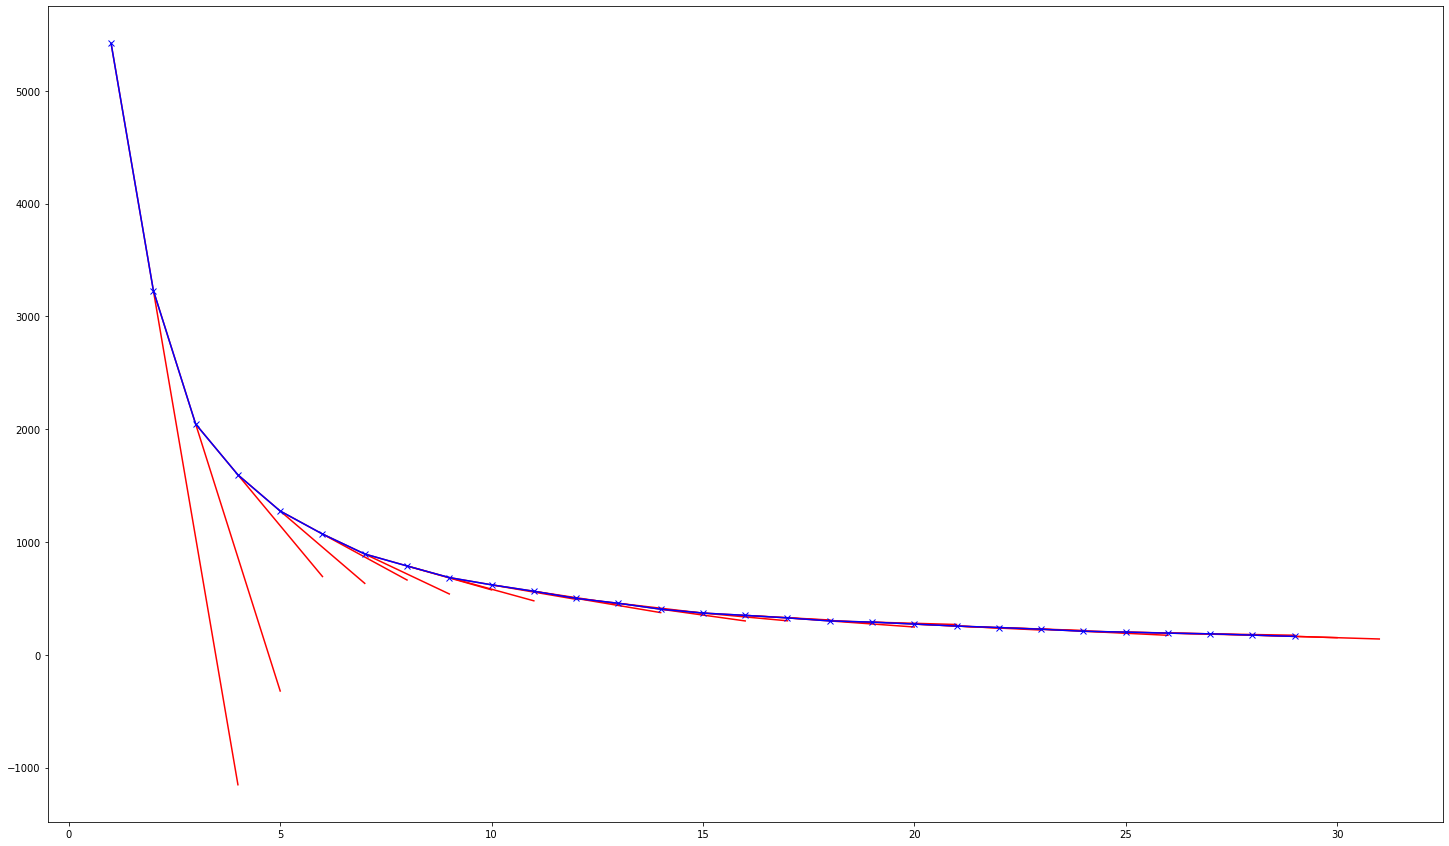

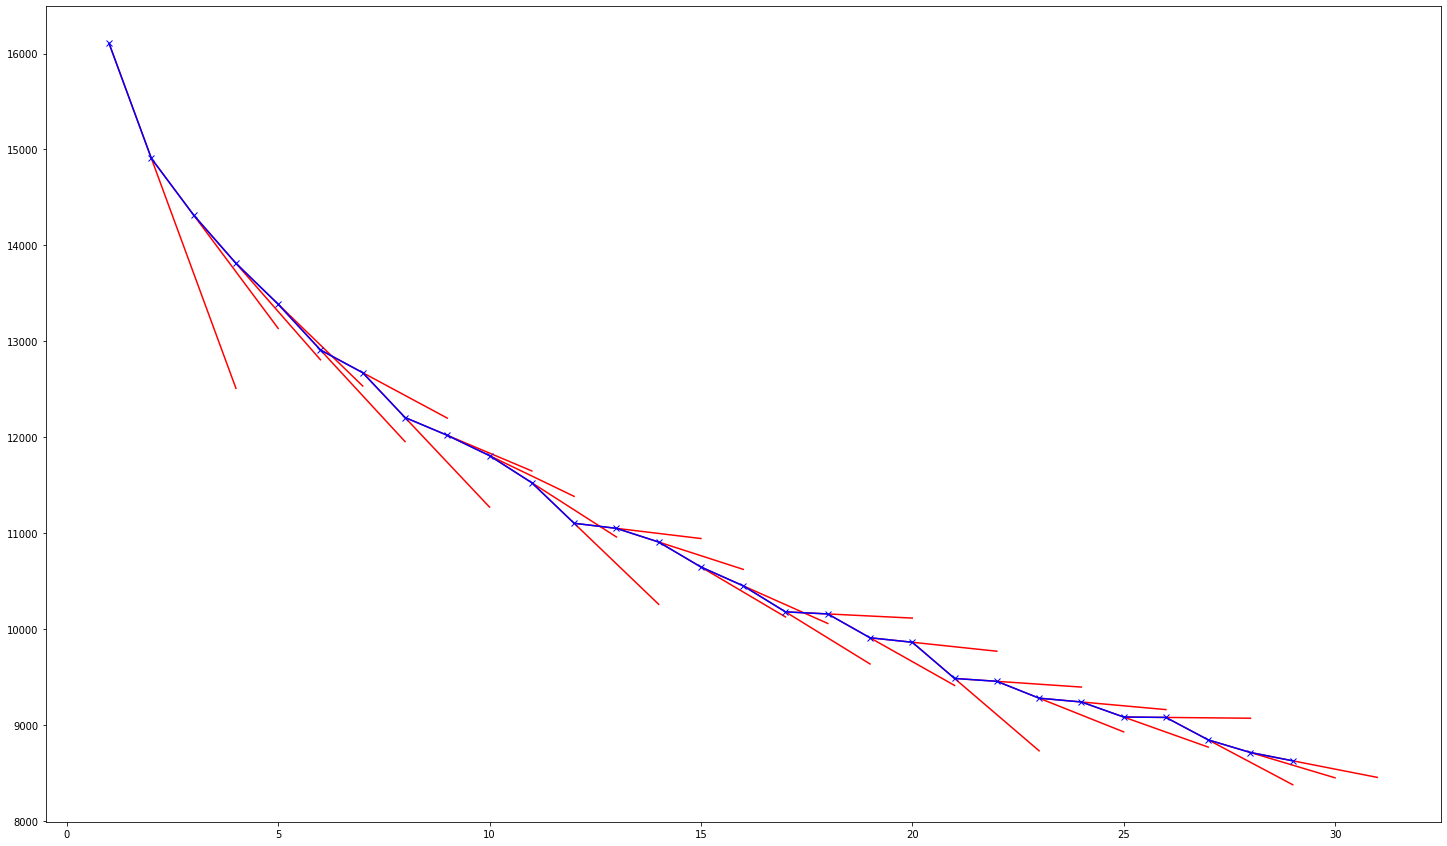

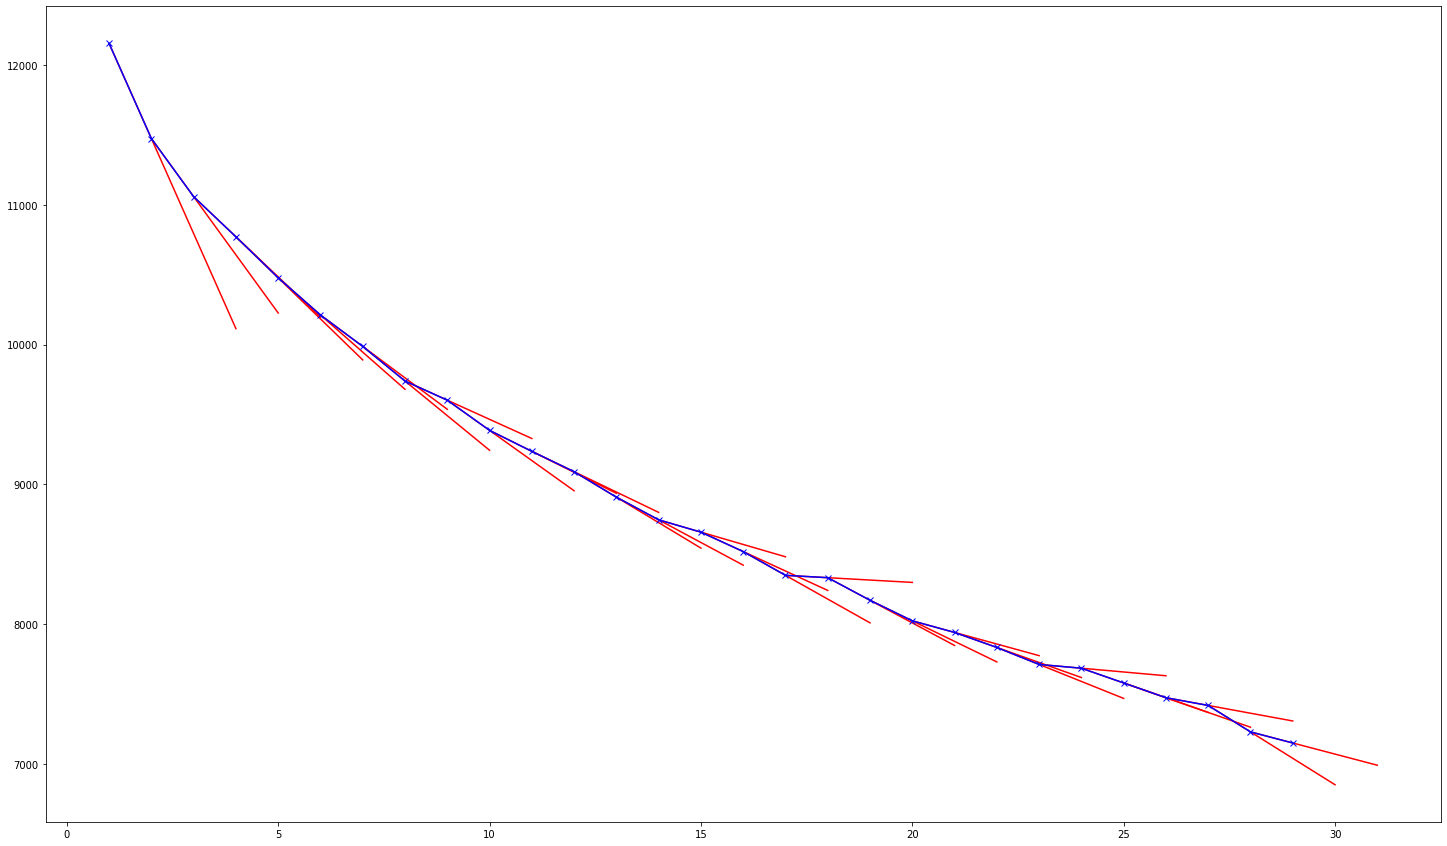

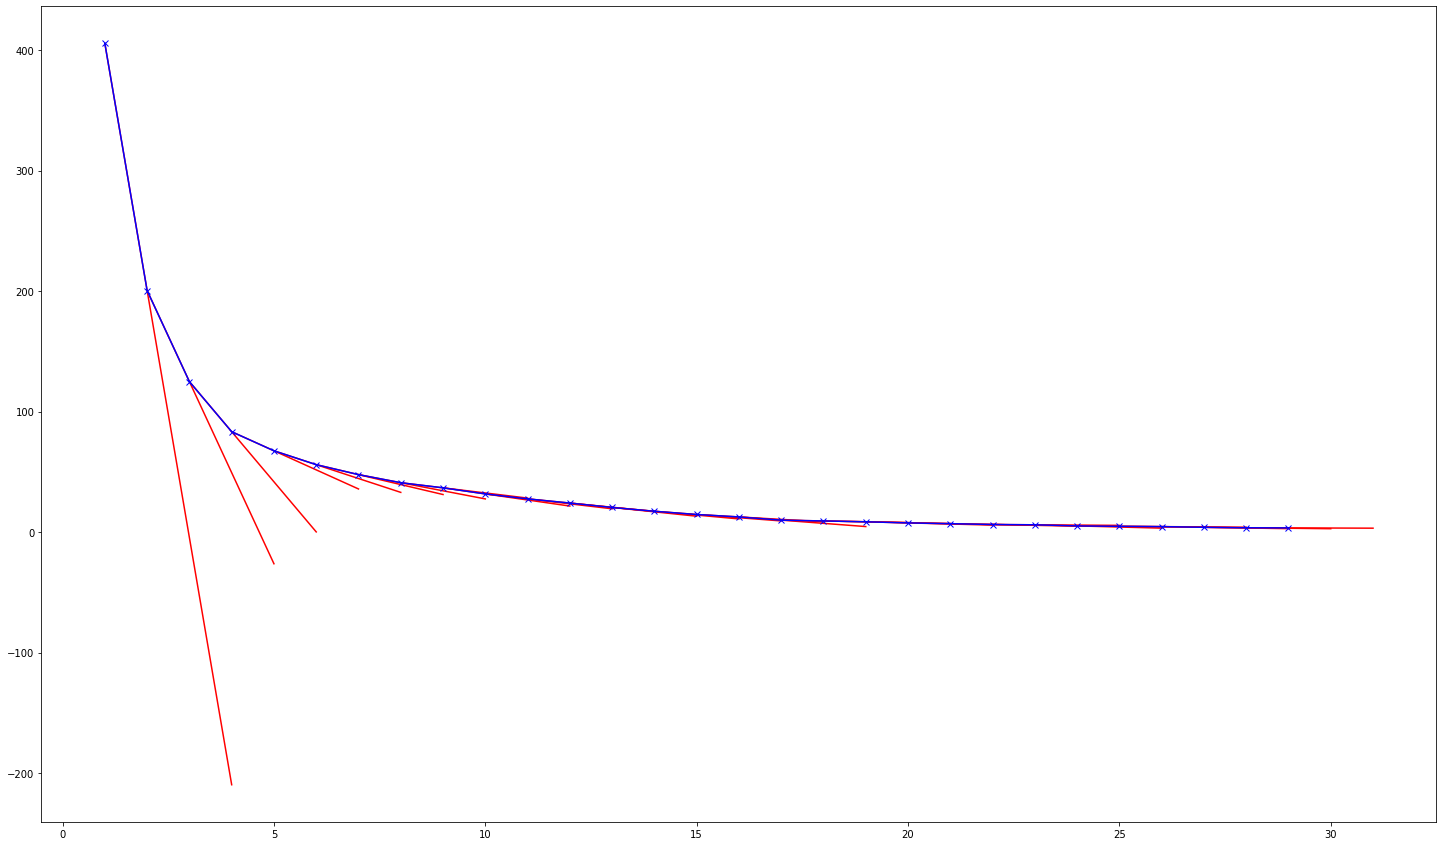

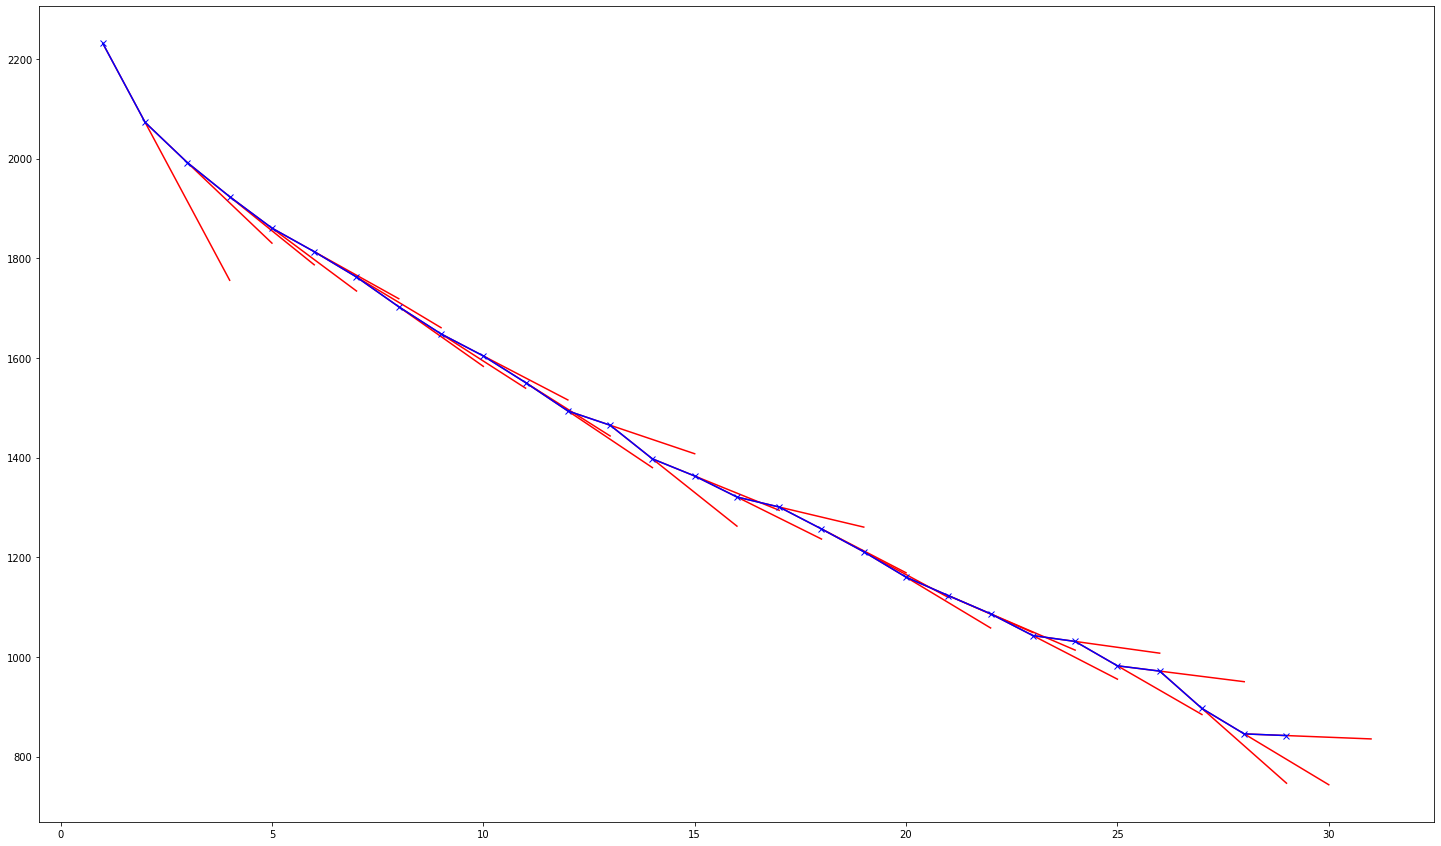

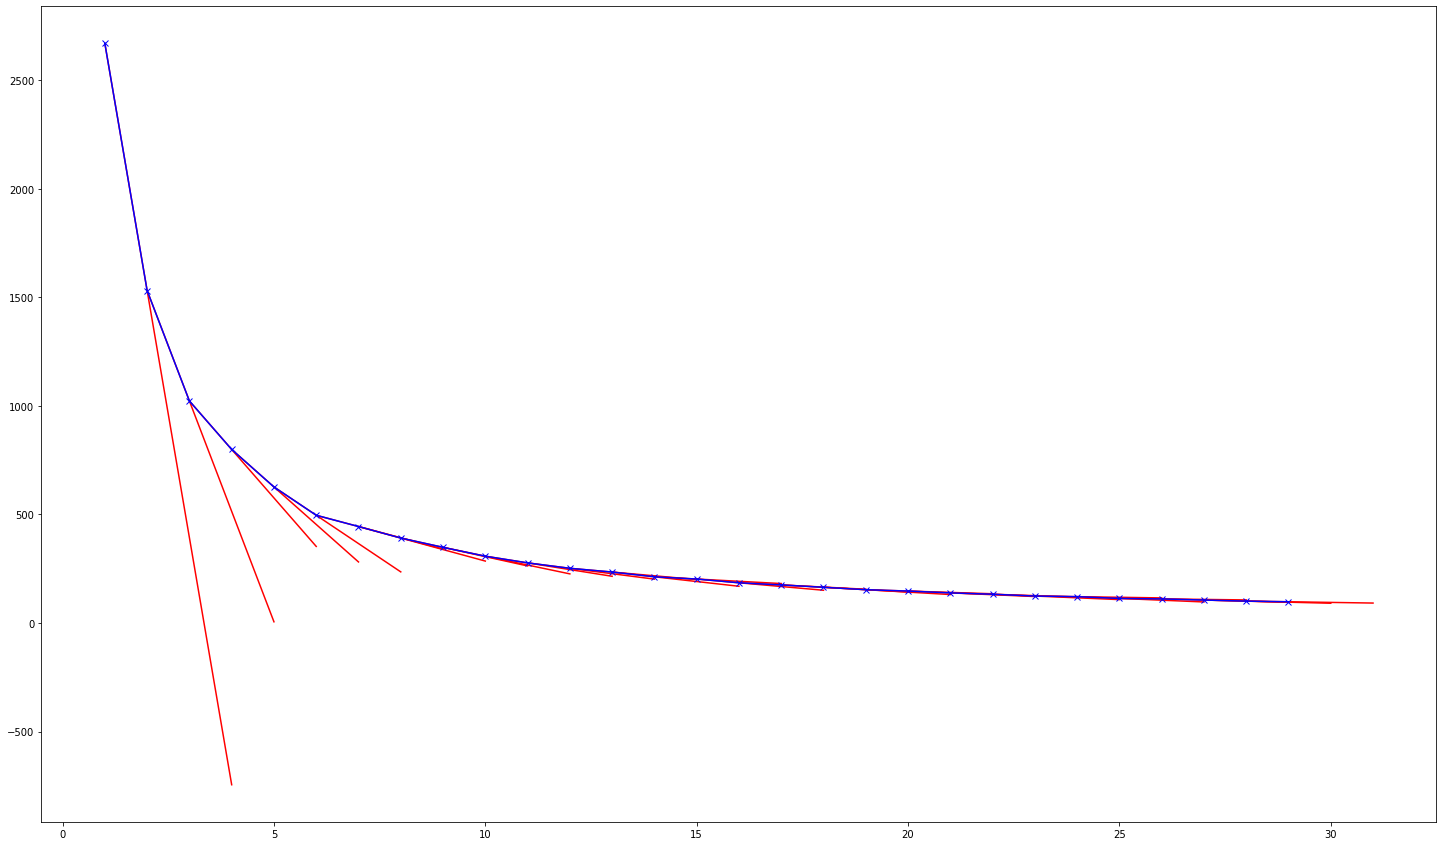

In [ ]:
for Ents_vecs in Ents_vecs_list:
    get_clusters(Ents_vecs)


In [ ]:
#Theogony_3_n_3_ep_851_win_11 7 классов вижу на 1 картинке, при желании можно разглядеть 9
#theog_2_n_50_ep_351_win_11 5 классов вижу на 2 картинке, при желании можно разглядеть 11 или 15
#theog_1_n_100_ep_100_win_15 6 классов вижу,  можно разглядеть также 10
#Gilg_n_3_ep_25_win_11 5 классов вижу, при желании можно разглядеть 7 или 6
#Gilg_1_n_100_ep_100_win_9 2 и 5 классов вижу, при желании можно разглядеть сколько хочешь
#The_Genesis_n_3_ep_101_win_11 6 классов вижу
#широкие эмб
#(кстати очевидный вывод - чем позже произведение, тем классов больше, нужно проверить)
#предположу, что сканиднавы должны поразнообразней быть

# 3 картинках, на второй при желании то же можно увидеть, можно бы угол или тангенс посчитать, пока на глаз
#n_clusters_list=[7, 17, 24]
n_clusters_list=[7]

Ents_cl_list=[]
for n_clusters in n_clusters_list:
    #print(n_clusters)
    for Ents_vecs in Ents_vecs_list:
        Ents_cl_list.append(get_clusters_labels(n_clusters, Ents_vecs))
        #break
print(len(Ents_cl_list))

6


In [ ]:
for k, emb_file in enumerate(w2v_file_list):
    print(emb_file, most_mentioned_Ents_list[k])
    for i, n_clusters in enumerate(n_clusters_list):#по списку кластеров выбираем номер и размер списка
        print(n_clusters,'_______')
        for n in range(n_clusters): #по номеру кластера
            #для каждого номера кластера выведем список NER ограниченный вторым списком
            print_cluster(n, Ents_list[k], Ents_cl_list[k], most_mentioned_Ents_list[k])

/content/drive/MyDrive/Theogony_3_n_3_ep_851_win_11.w2v ['Zeus', 'Olympus', 'Cronos', 'Uranus', 'Ocean', 'Titans', 'Aphrodite', 'Nyx', 'Iapetus', 'Hera', 'Tartarus', 'Heracles', 'Poseidon', 'Rhea', 'Cottus', 'Styx', 'Prometheus']
7 _______
************ 0 ************
************ 1 ************
Cronos
Zeus
Poseidon
Nyx
Olympus
Uranus
Tartarus
Cottus
Titans
Styx
Prometheus
************ 2 ************
************ 3 ************
************ 4 ************
************ 5 ************
************ 6 ************
Hera
Aphrodite
Iapetus
Rhea
Ocean
Heracles
/content/drive/MyDrive/theog_2_n_50_ep_351_win_11.w2v ['Zeus', 'Olympus', 'Cronos', 'Uranus', 'Ocean', 'Titans', 'Aphrodite', 'Nyx', 'Iapetus', 'Hera', 'Tartarus', 'Heracles', 'Poseidon', 'Rhea', 'Cottus', 'Styx', 'Prometheus']
7 _______
************ 0 ************
Cronos
Zeus
Hera
Poseidon
Aphrodite
Iapetus
Nyx
Olympus
Uranus
Tartarus
Rhea
Styx
************ 1 ************
Ocean
************ 2 ************
************ 3 ************
****

In [ ]:
#+
#  распредились примерно одинаково по разным типам емб по одному тексту
# примерно одинаково на разных текста
# кучно разложились  все часто упоминаемые  


#какой-то  системы внутри кластеров системы не вижу
#кроме одного случая
'''
Heaven
************ 3 ************
************ 4 ************
Gilgamesh
Shamash
Enkidu
Ea
Lugulbanda
Utnapishtim
Urshanabi
************ 5 ************
************ 6 ************
Uruk
Anu
Ishtar
Enlil
Ninsun
Humbaba
Bull
'''
#когда по сюжету примерно на 2 лагеря разделились
#правда во втором случае Хумбаба и Гильгамеш в одном кластере, но 
#после того как добавил Бытиё перераспределились кмк получше, но Шамаш ушел в другой кластер, зато Бык выделился отдельно
#как пронимать  смещение кластеров? посмотреть KMeans поглубже
'''
Shamash #Солнце
Uruk #город
Anu #один из 3 верховных богов- бог неба и 
Ishtar #здесь больше Венера
Enlil #один из 3 верховных богов- бог неба и 
Ea #один из 3 верховных богов- бог воды
Ninsun
Humbaba
************ 3 ************
************ 4 ************
Gilgamesh
Enkidu
Lugulbanda #отец Гильгамеша
Utnapishtim #шумерский Ной
Urshanabi #шумерский Харон или здесь Гелиос как лодочник
************ 5 ************
************ 6 ************
Bull
Heaven
'''

#Genesis 100 эпох - мб мало, но пока Ханаан и хананене в одном кластере, Ханаанский - в другом? хотя логика какая-то есть

#классификация Проппа посмотреть

In [ ]:
#сейчас выведем все кластера на ограничиваясь списком
for k, emb_file in enumerate(w2v_file_list):
    print(emb_file, most_mentioned_Ents_list[k])
    for i, n_clusters in enumerate(n_clusters_list):#по списку кластеров выбираем номер и размер списка
        print(n_clusters,'_______')
        for n in range(n_clusters): #по номеру кластера
            print_cluster(n, Ents_list[k], Ents_cl_list[k], Ents_list[k])

/content/drive/MyDrive/Theogony_3_n_3_ep_851_win_11.w2v ['Zeus', 'Olympus', 'Cronos', 'Uranus', 'Ocean', 'Titans', 'Aphrodite', 'Nyx', 'Iapetus', 'Hera', 'Tartarus', 'Heracles', 'Poseidon', 'Rhea', 'Cottus', 'Styx', 'Prometheus']
7 _______
************ 0 ************
Machae
Phonos
Algea
Hysmina
Eridanus
Strymon
Meander
Ister
Phasis
Rhesus
Achelous
Nessus
Rhodius
Haliacmon
Heptaporus
Granicus
Aesepus
Simois
Peneus
Hermus
Caicus
Sangarius
Ladon
Scamander
Aristaeus
Polydorus
Thebe
Nausithous
Nausinous
************ 1 ************
Heliconian
Helicon
Cronos
Permessus
Olmeius
Zeus
Poseidon
Nyx
Hesiod
Olympus
Uranus
Olympian
Pieria
Pontus
Chaos
Tartarus
Eros
Erebus
Hemera
Cottus
Briareos
Gyes
Himerus
Titans
Thaumas
Phoreys
Ceto
Eurybia
Arima
Typhaon
Cerberus
HydraOfLerna
Styx
Pytho
Parnassus
Prometheus
Mecone
Melian
Forthwith
Othyrs
Cymopolea
Typhoeus
Hephaestus
Ares
Triton
Aeson
Iolcus
************ 2 ************
Sao
Galene
Glauce
Cymothoe
Speo
Halie
Pasithea
Eunice
Melite
Eulimene
Agaue
Pher

In [ ]:
#музы и реки четко расставляет, но там все просто, остального слишком много, чтобы без пузыря разобраться. 
#В гильгамеше не ориентируюсь в персонажах, надо изучить подробней

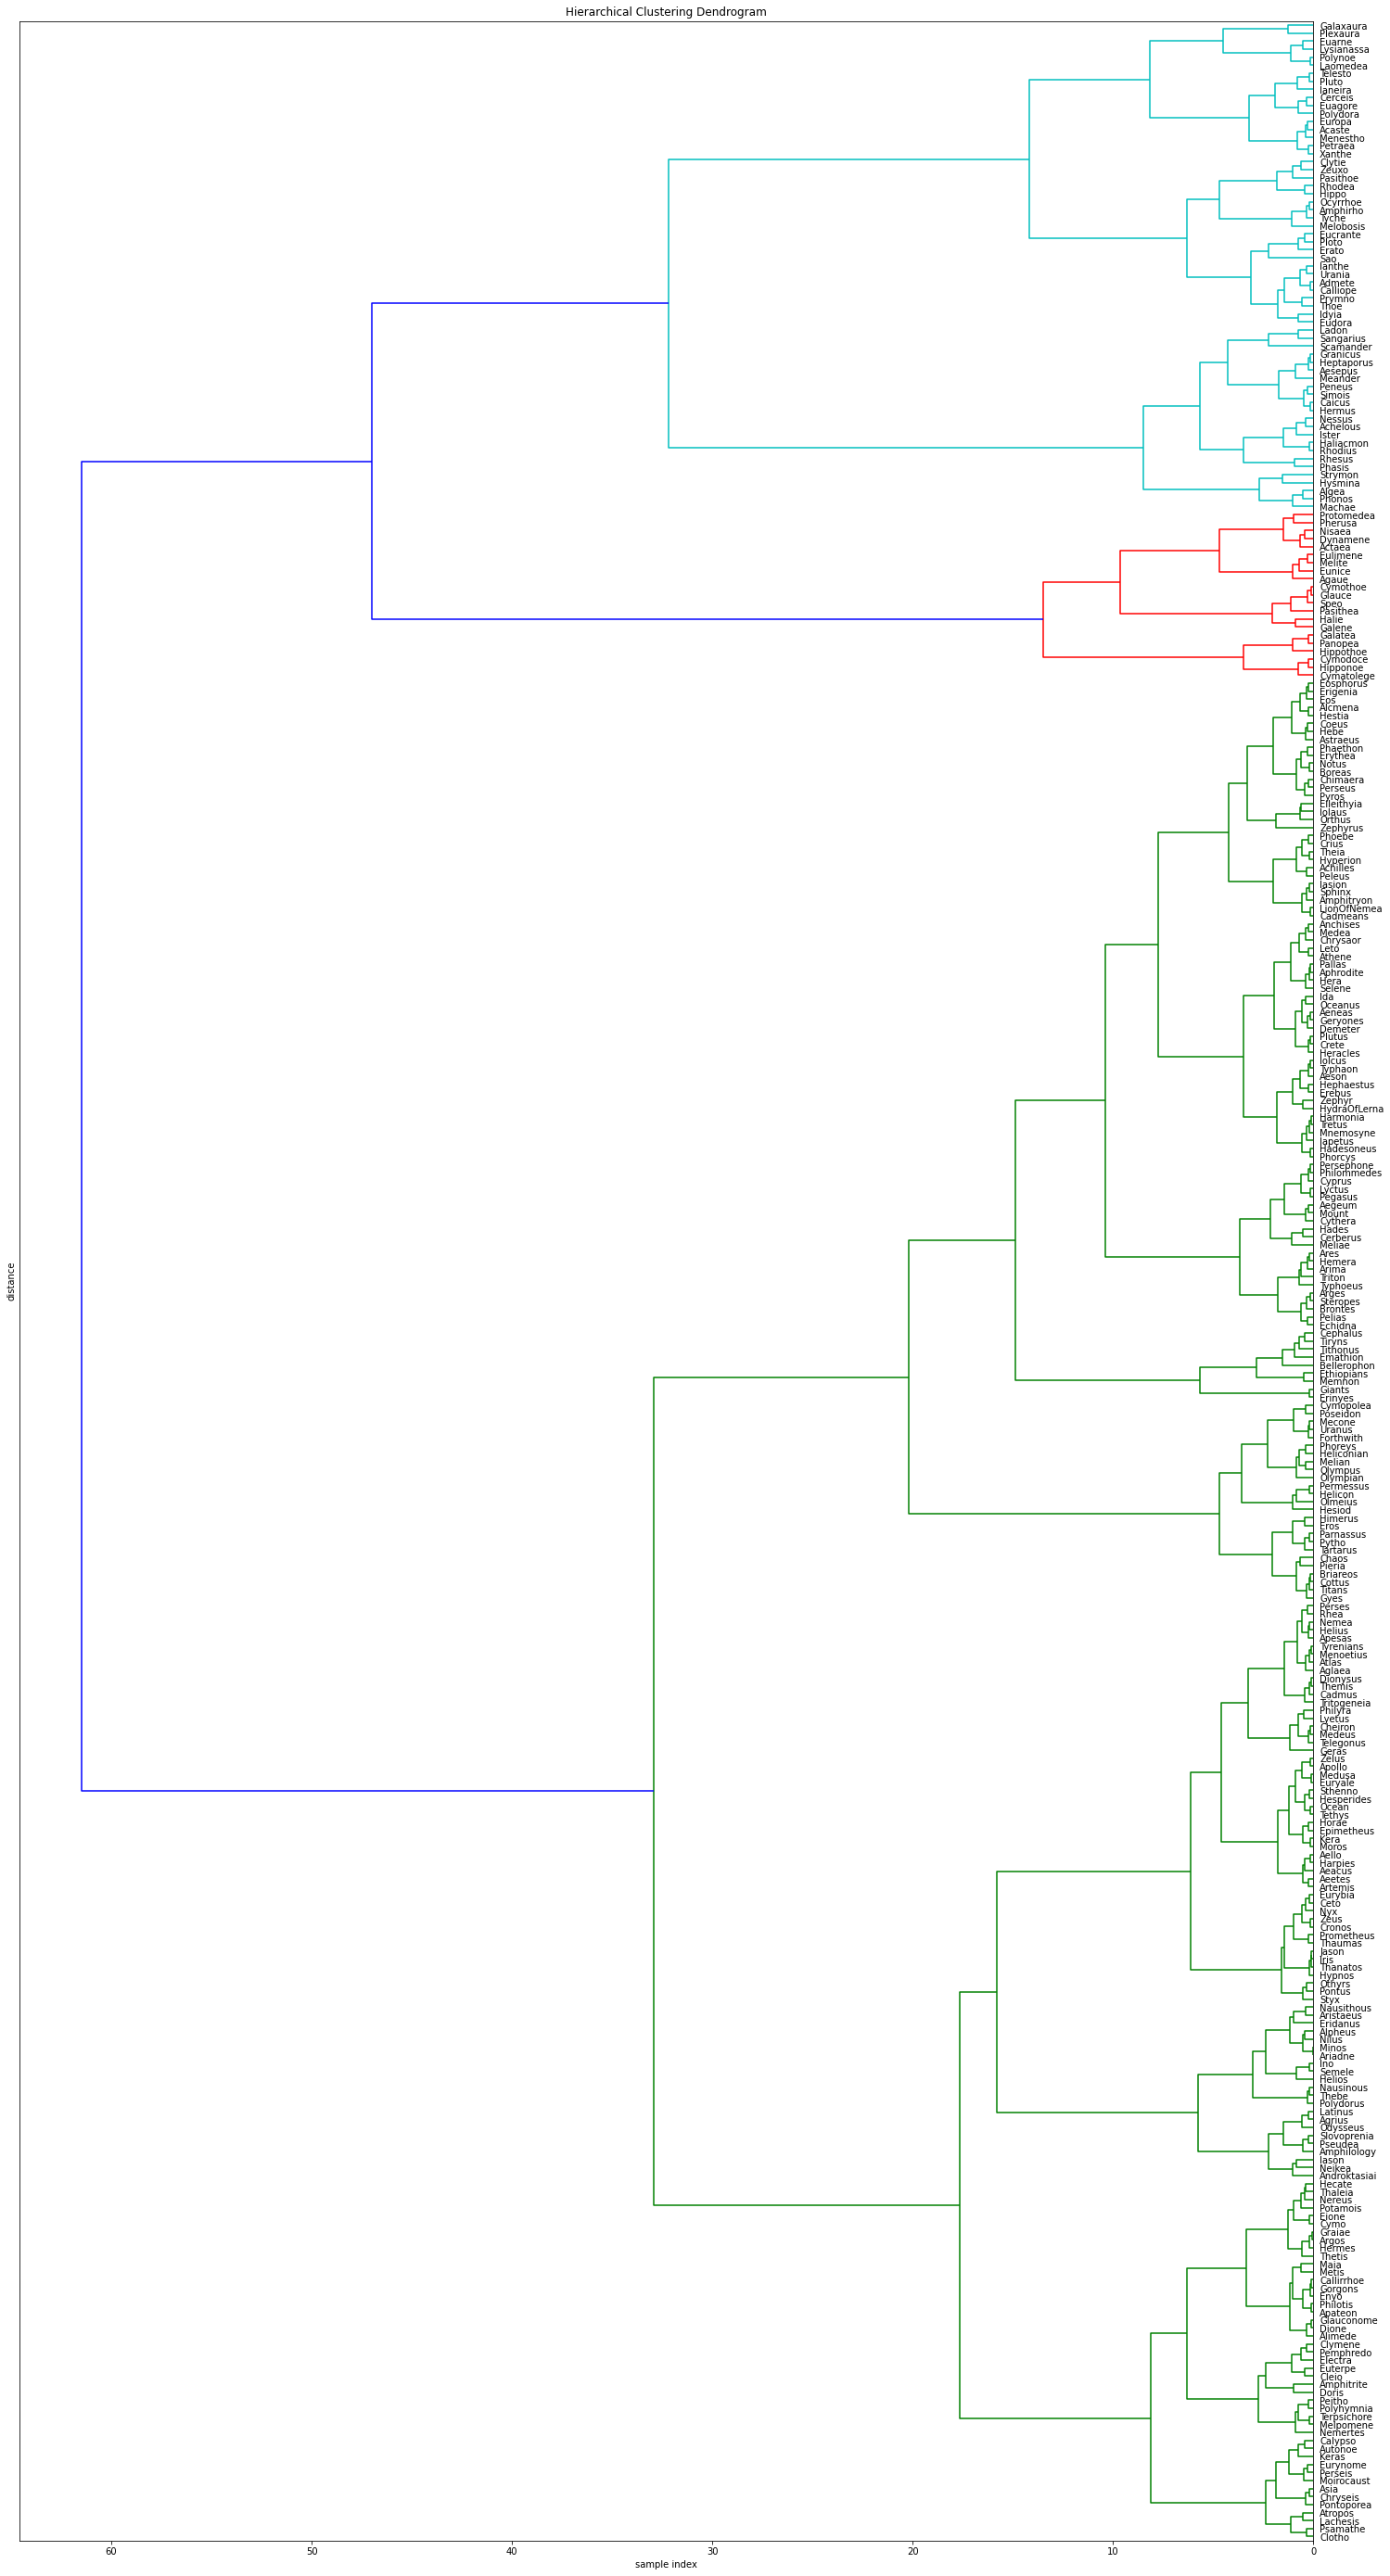

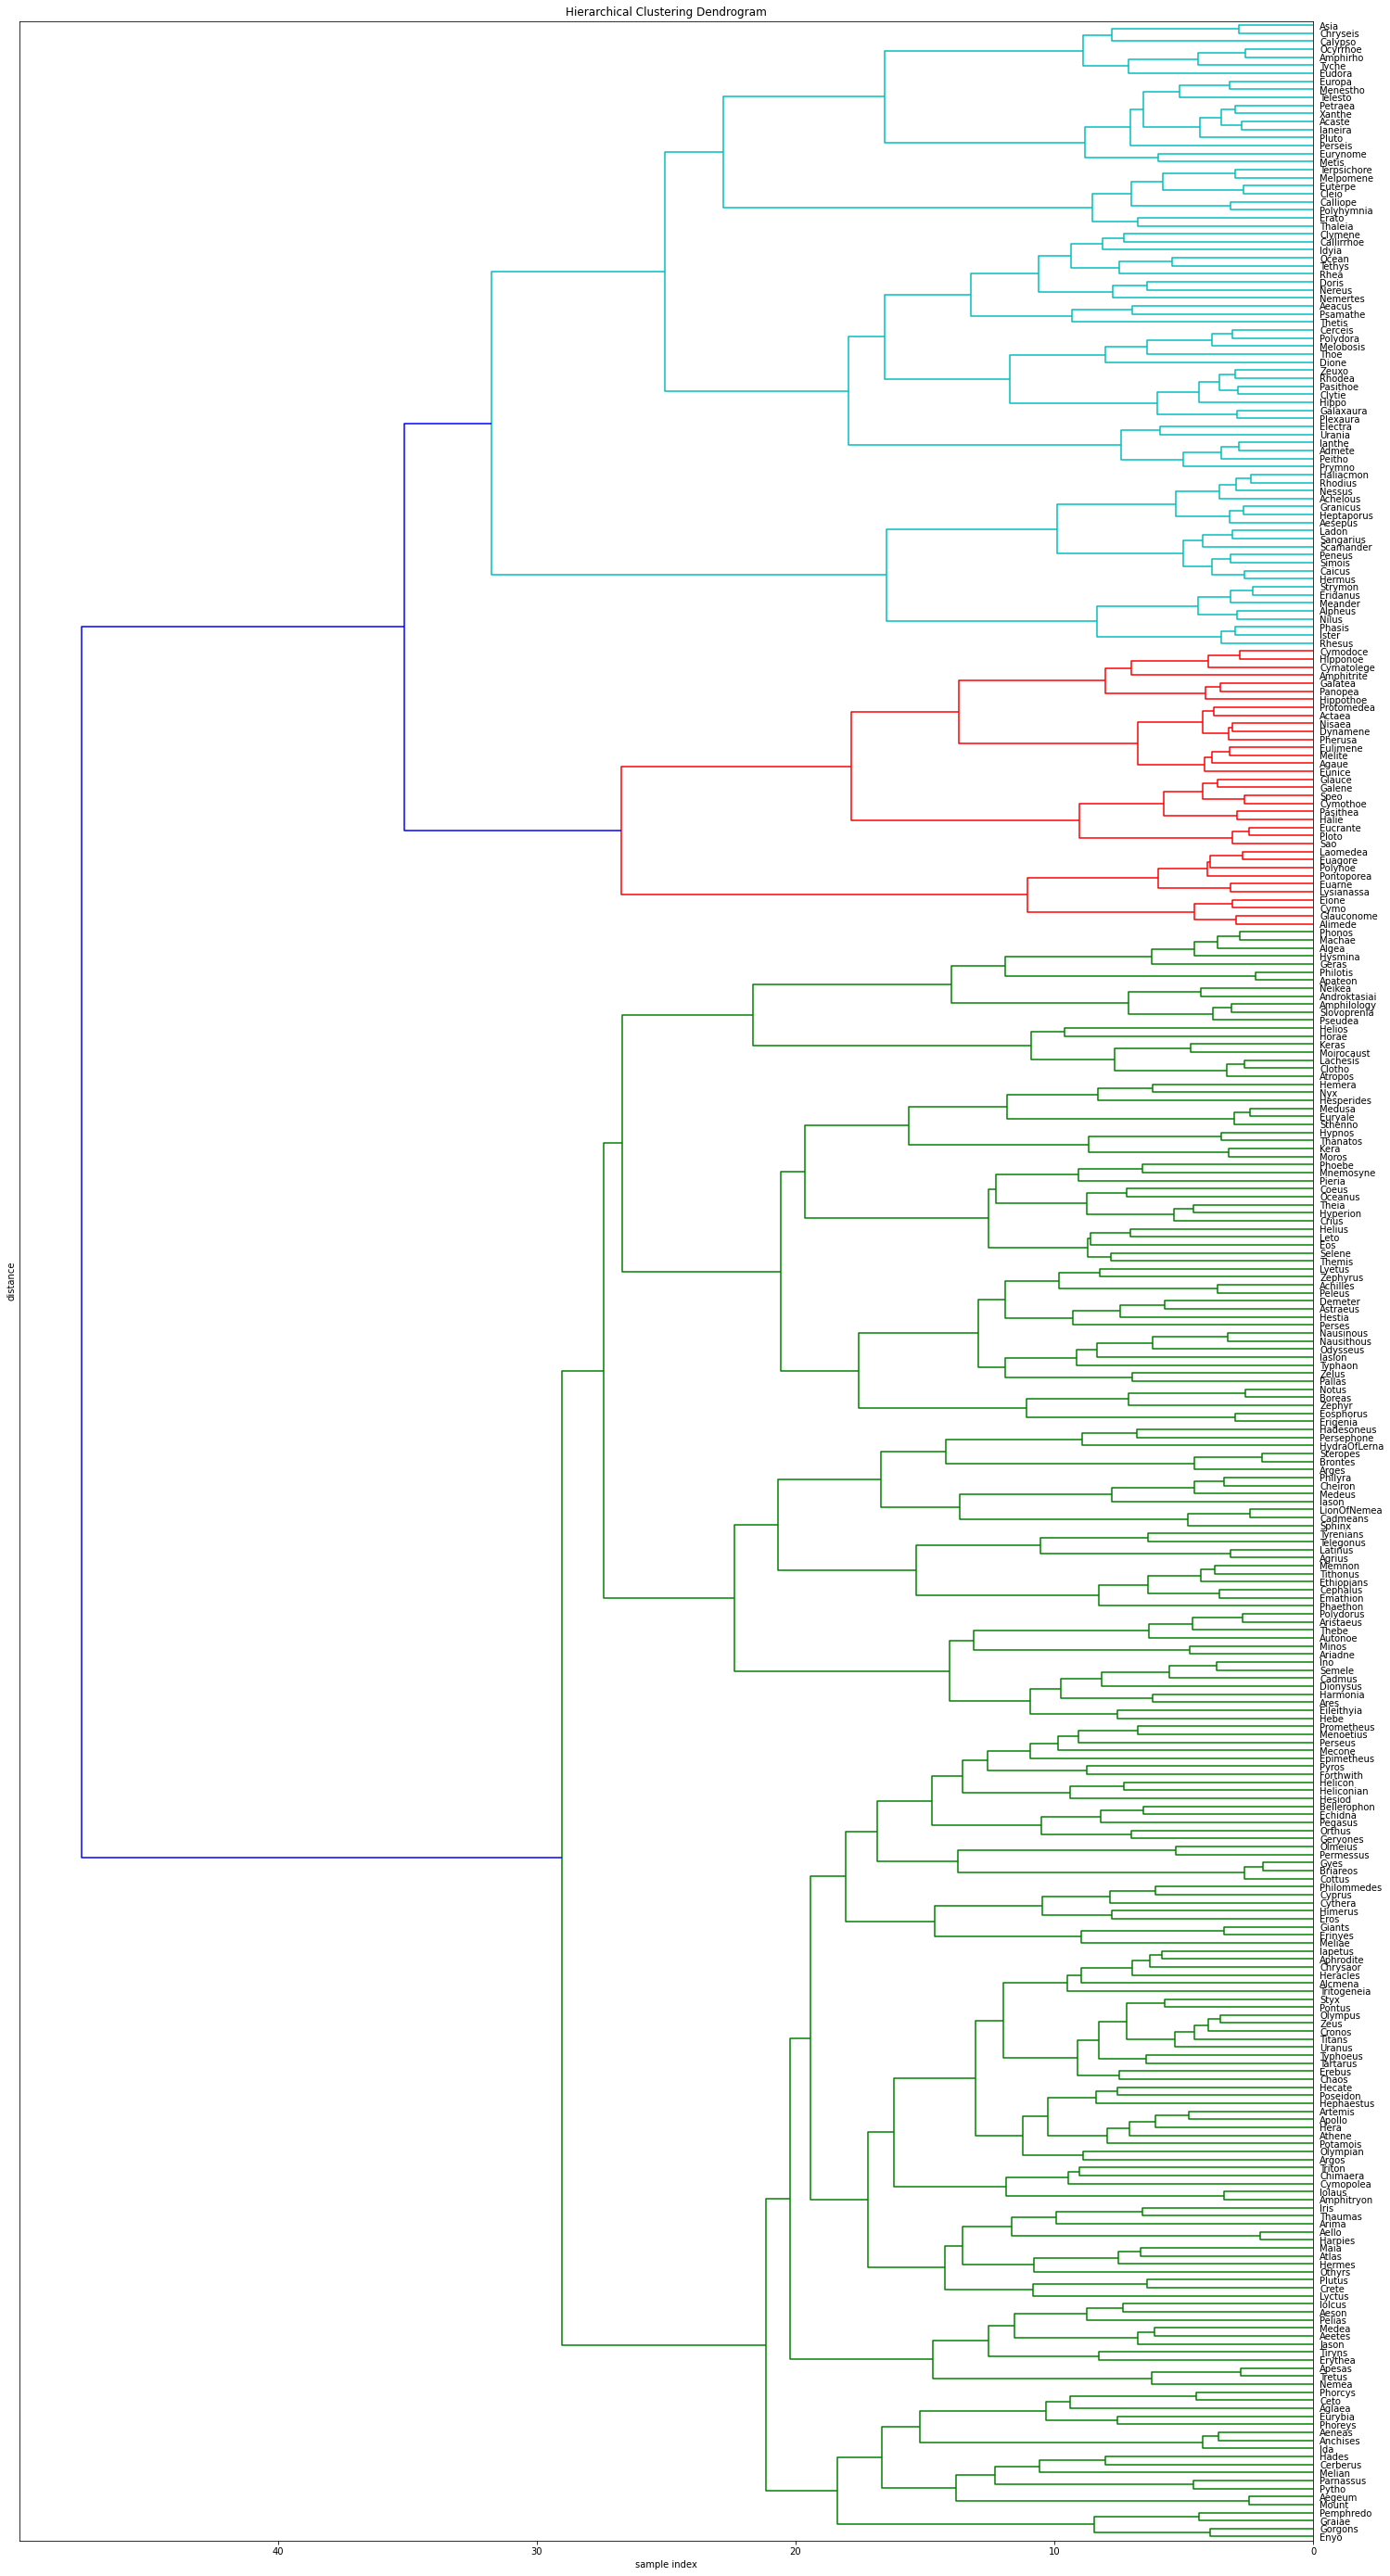

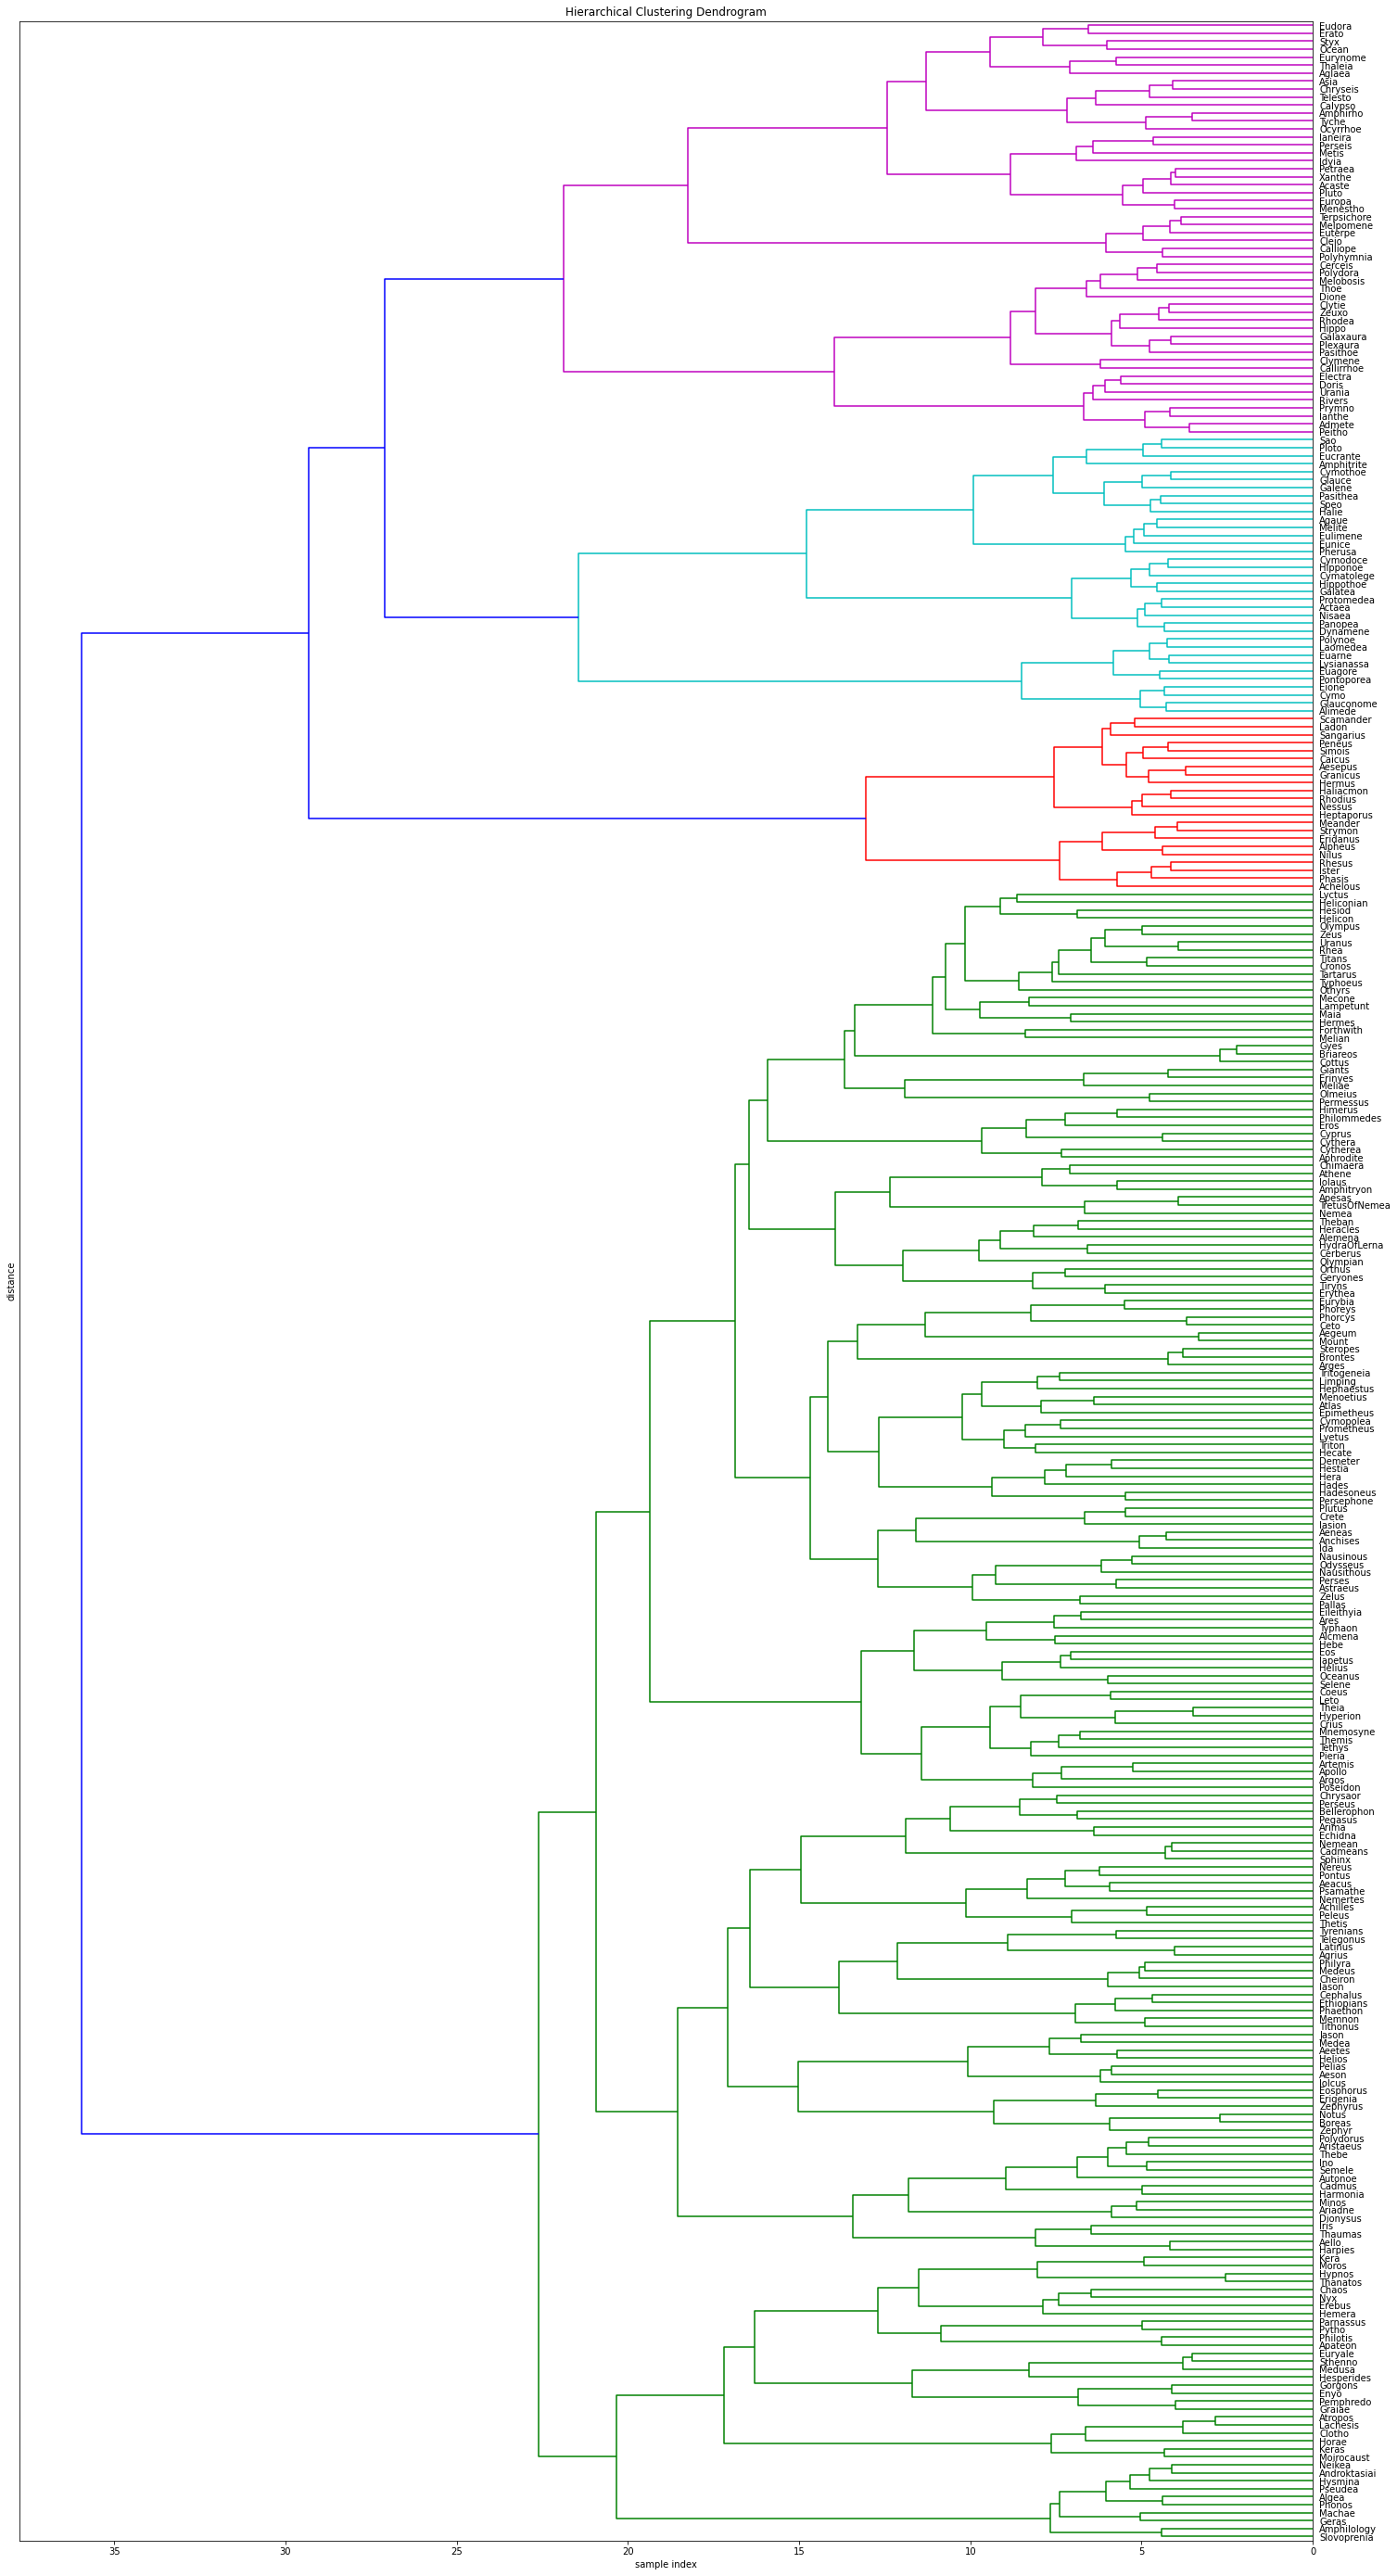

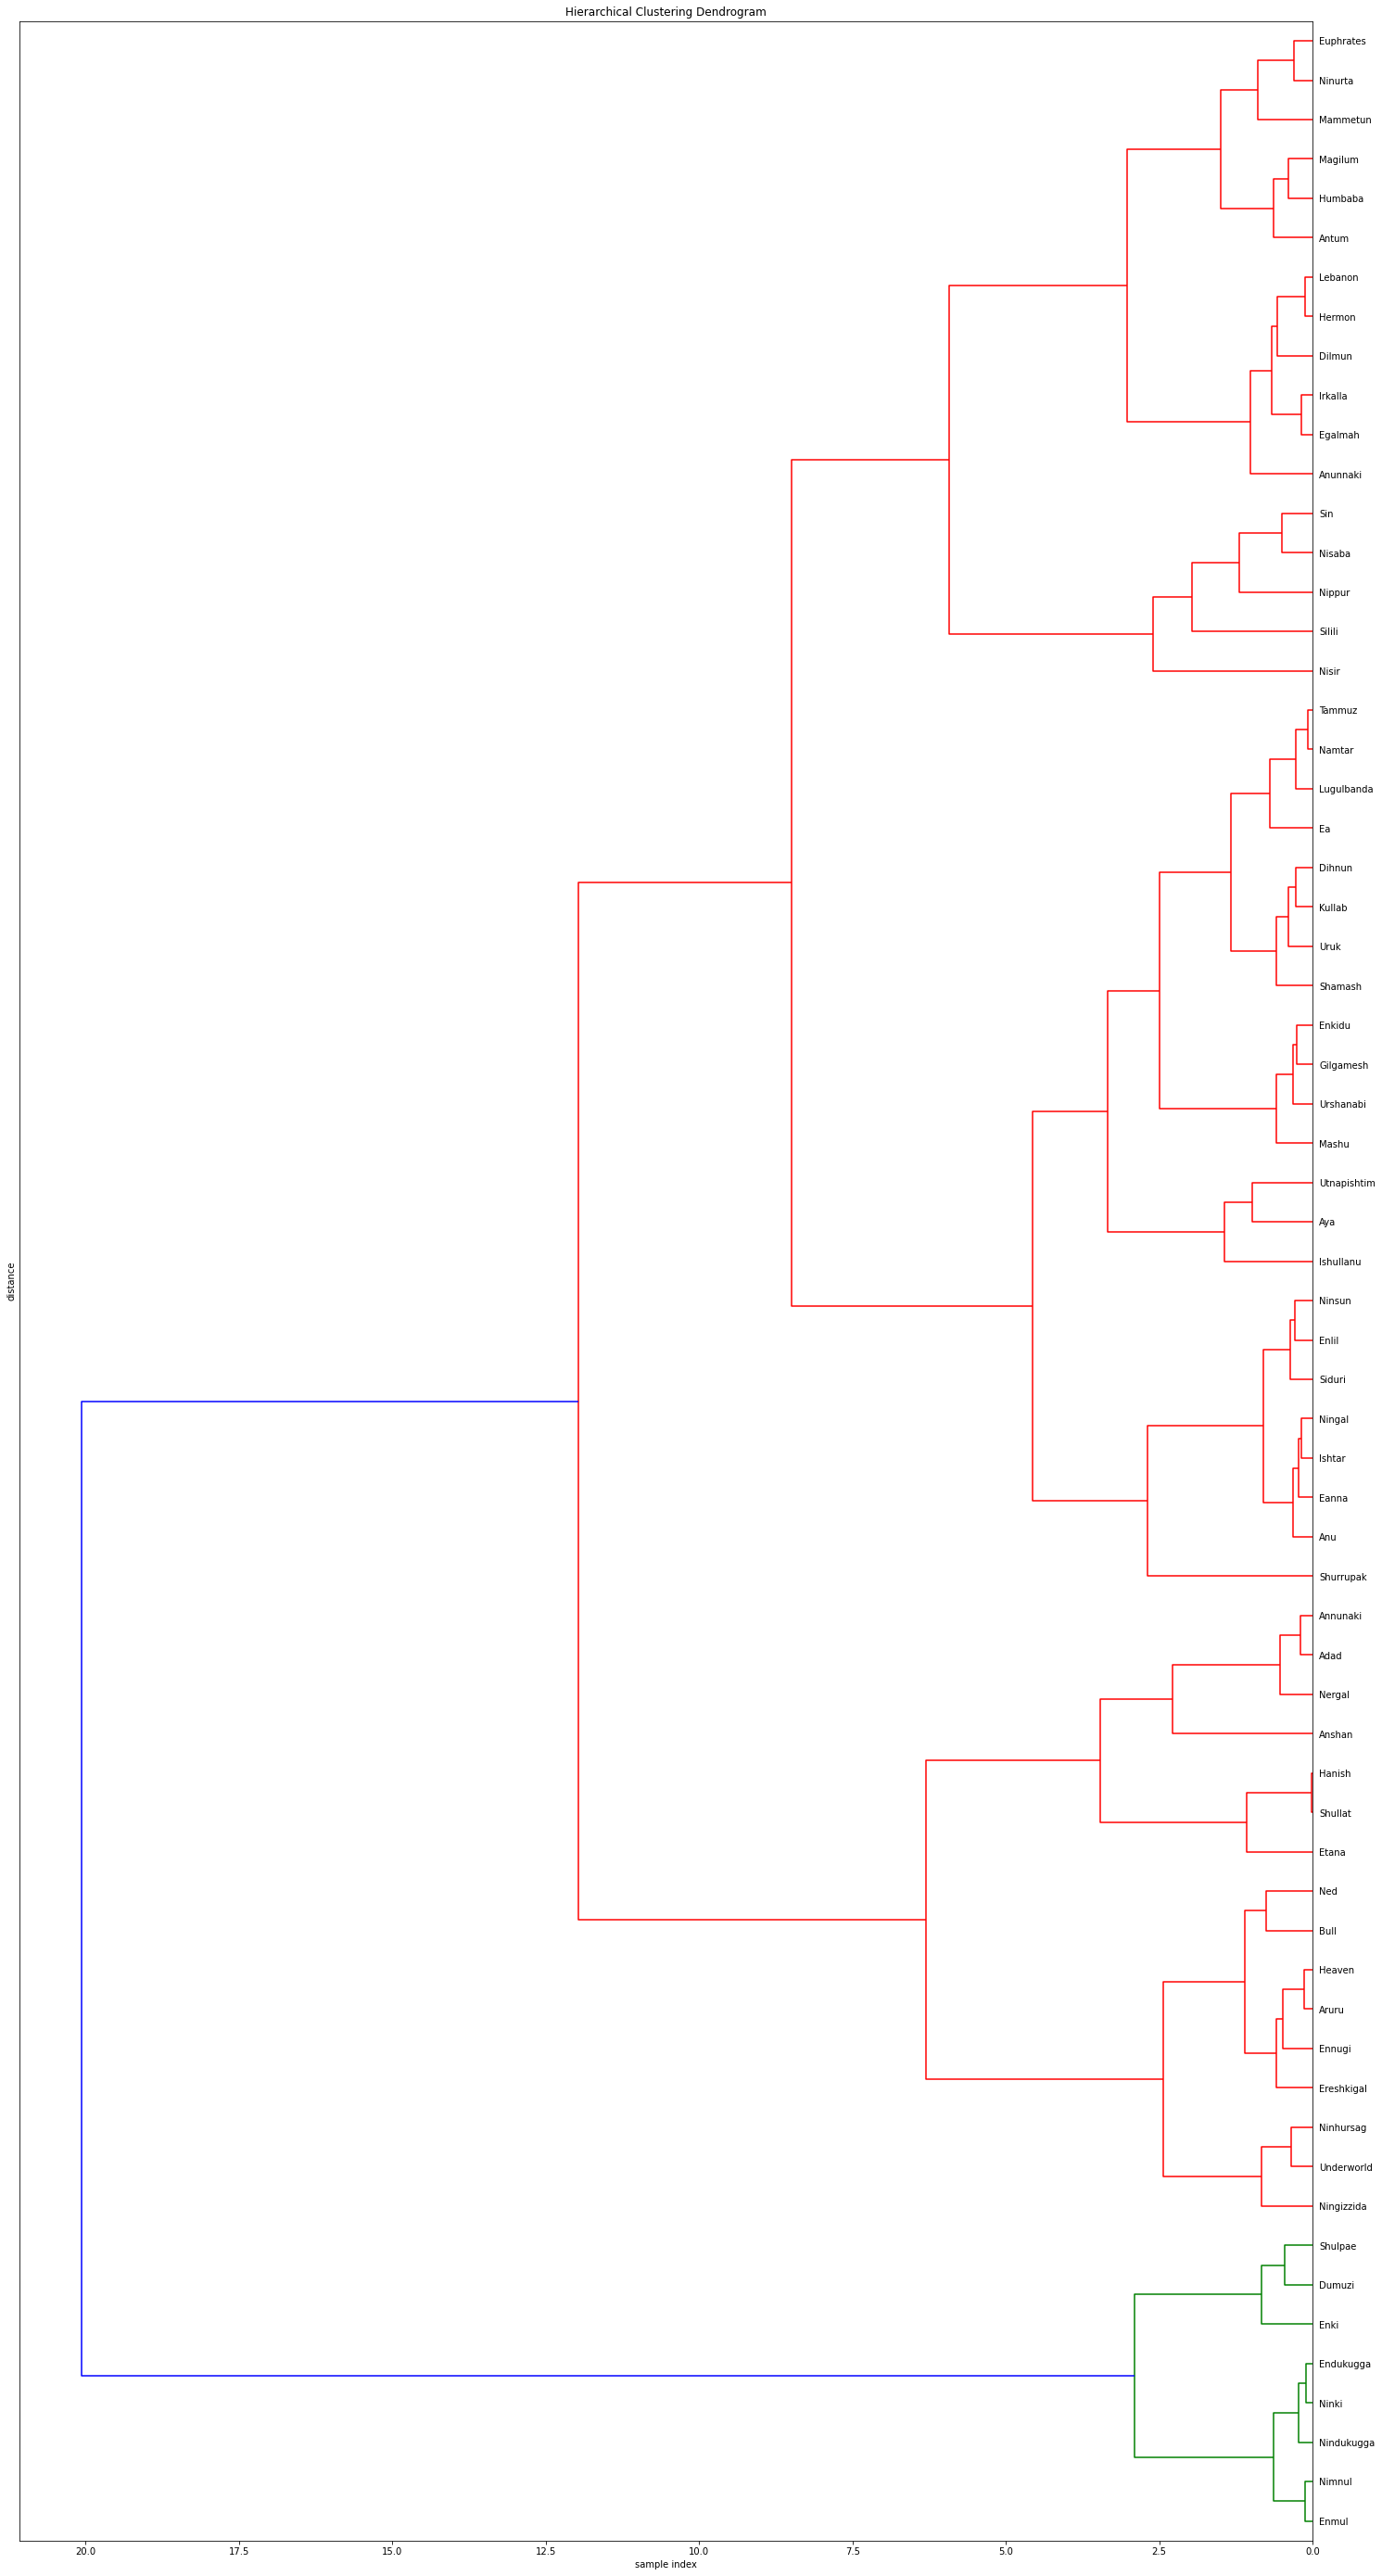

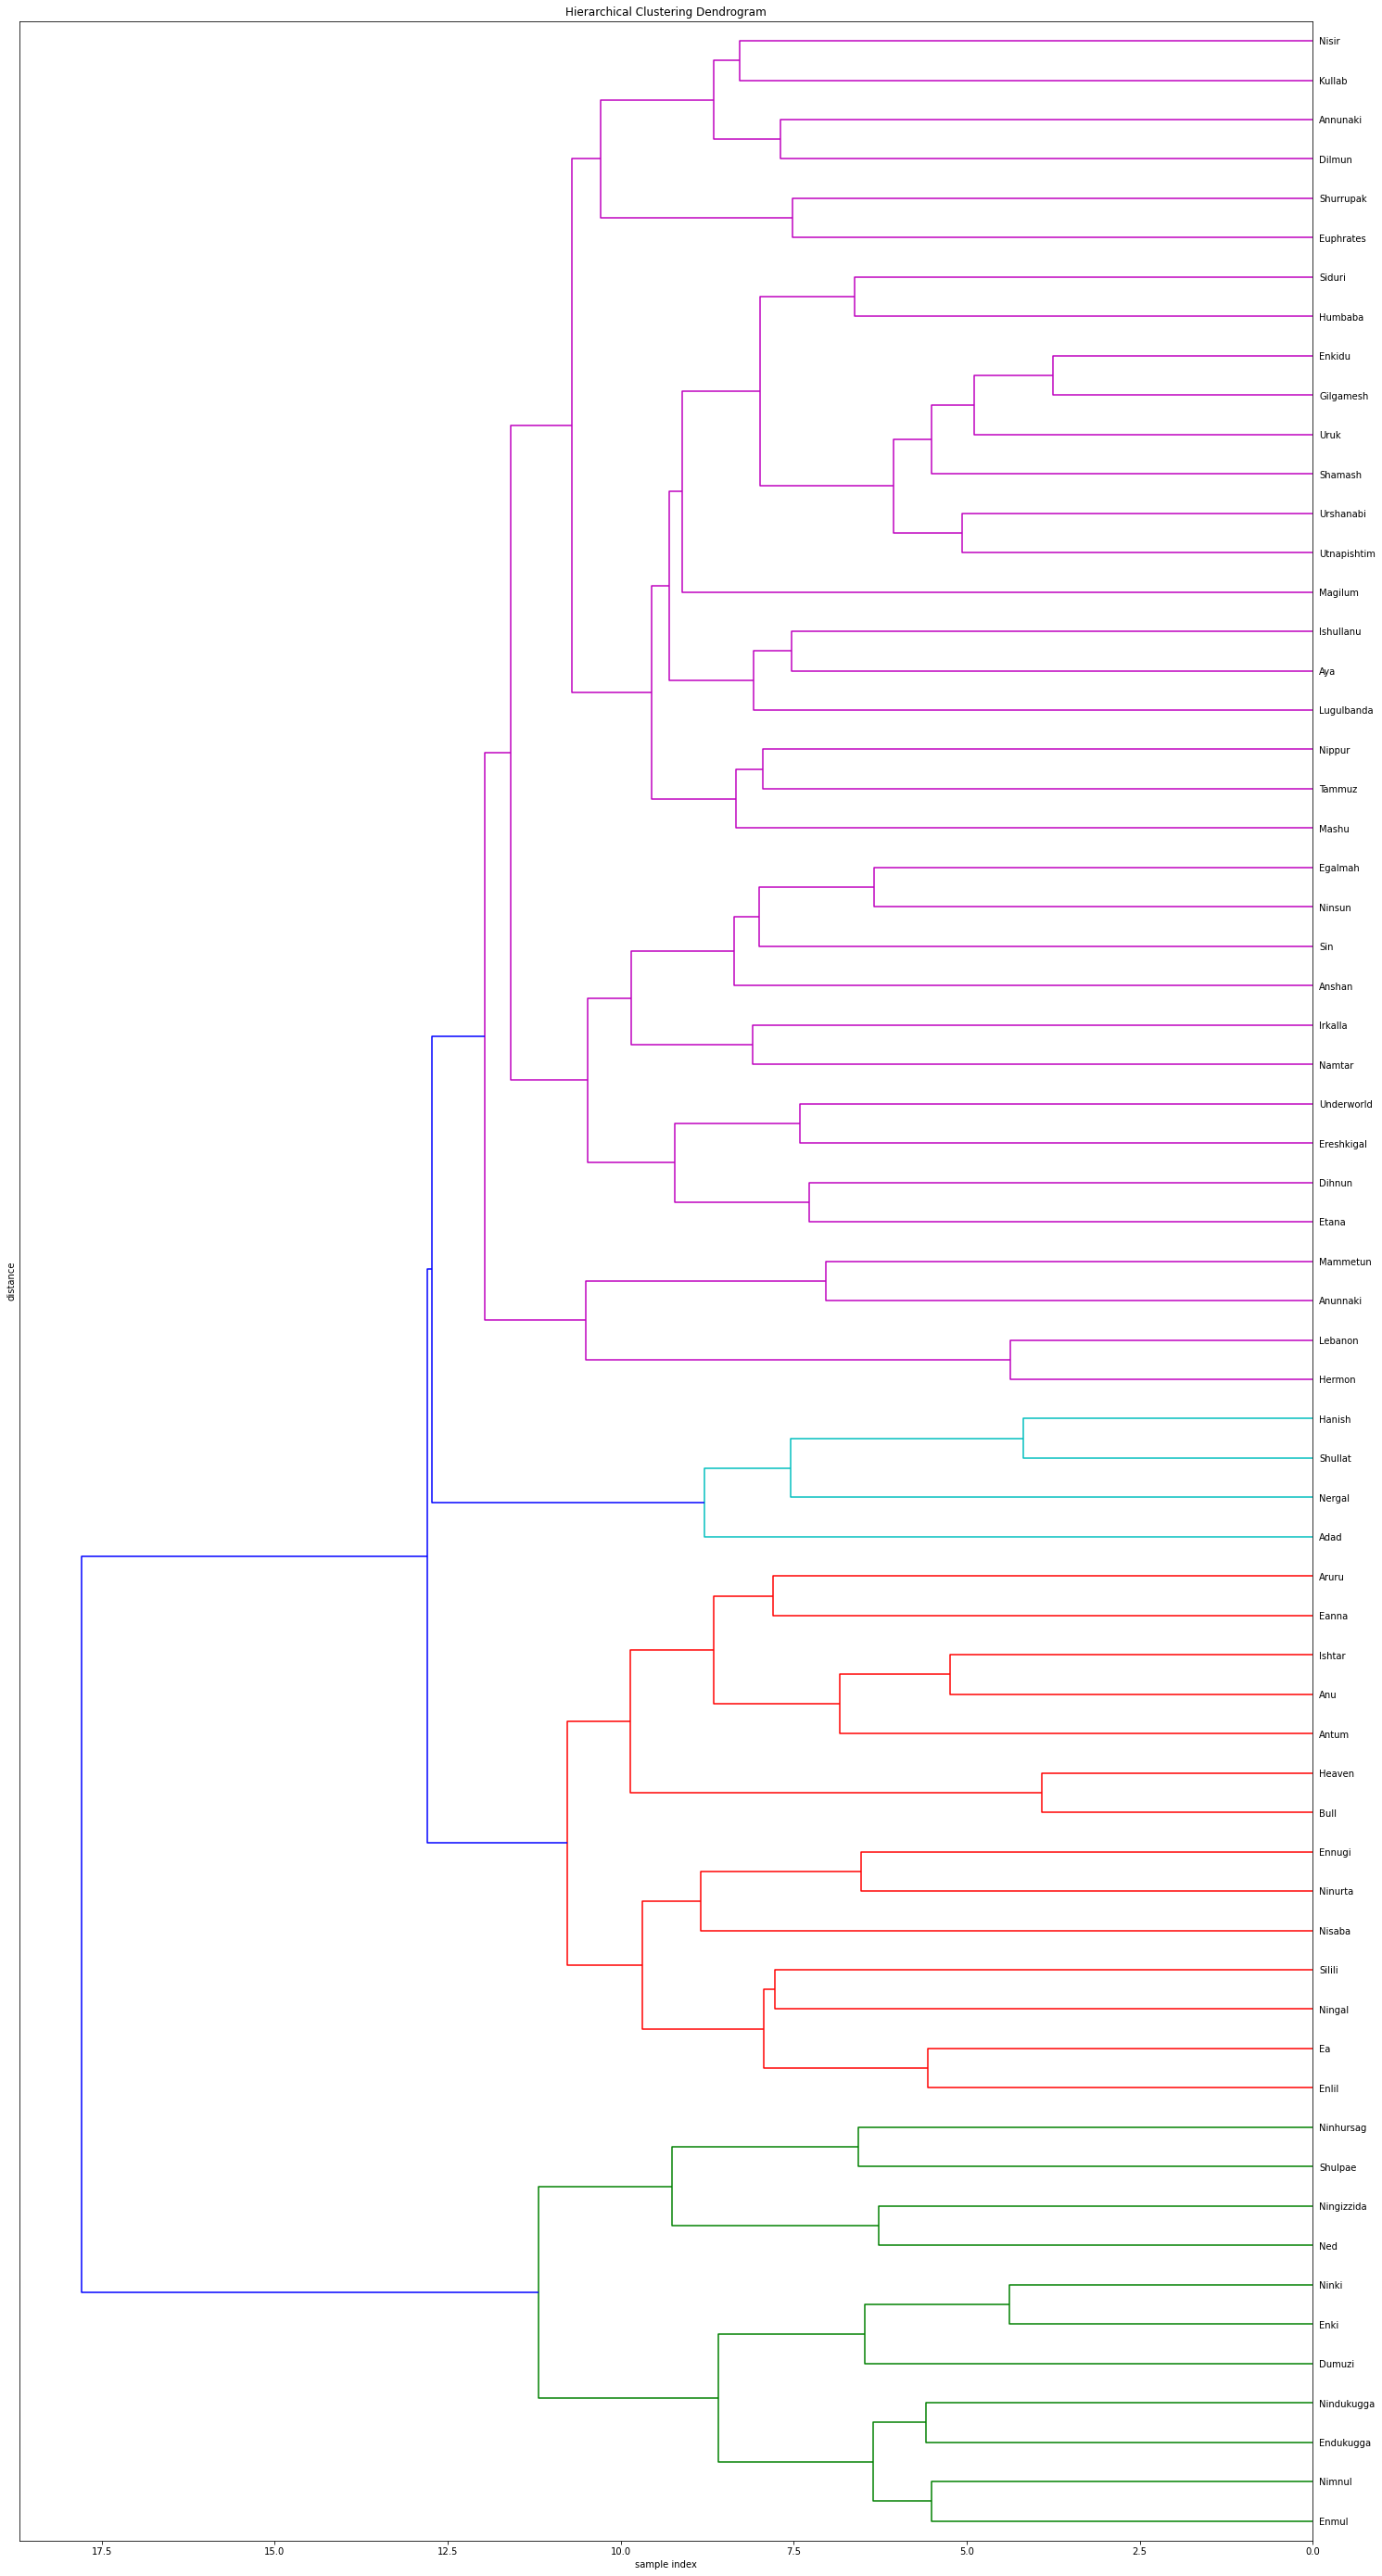

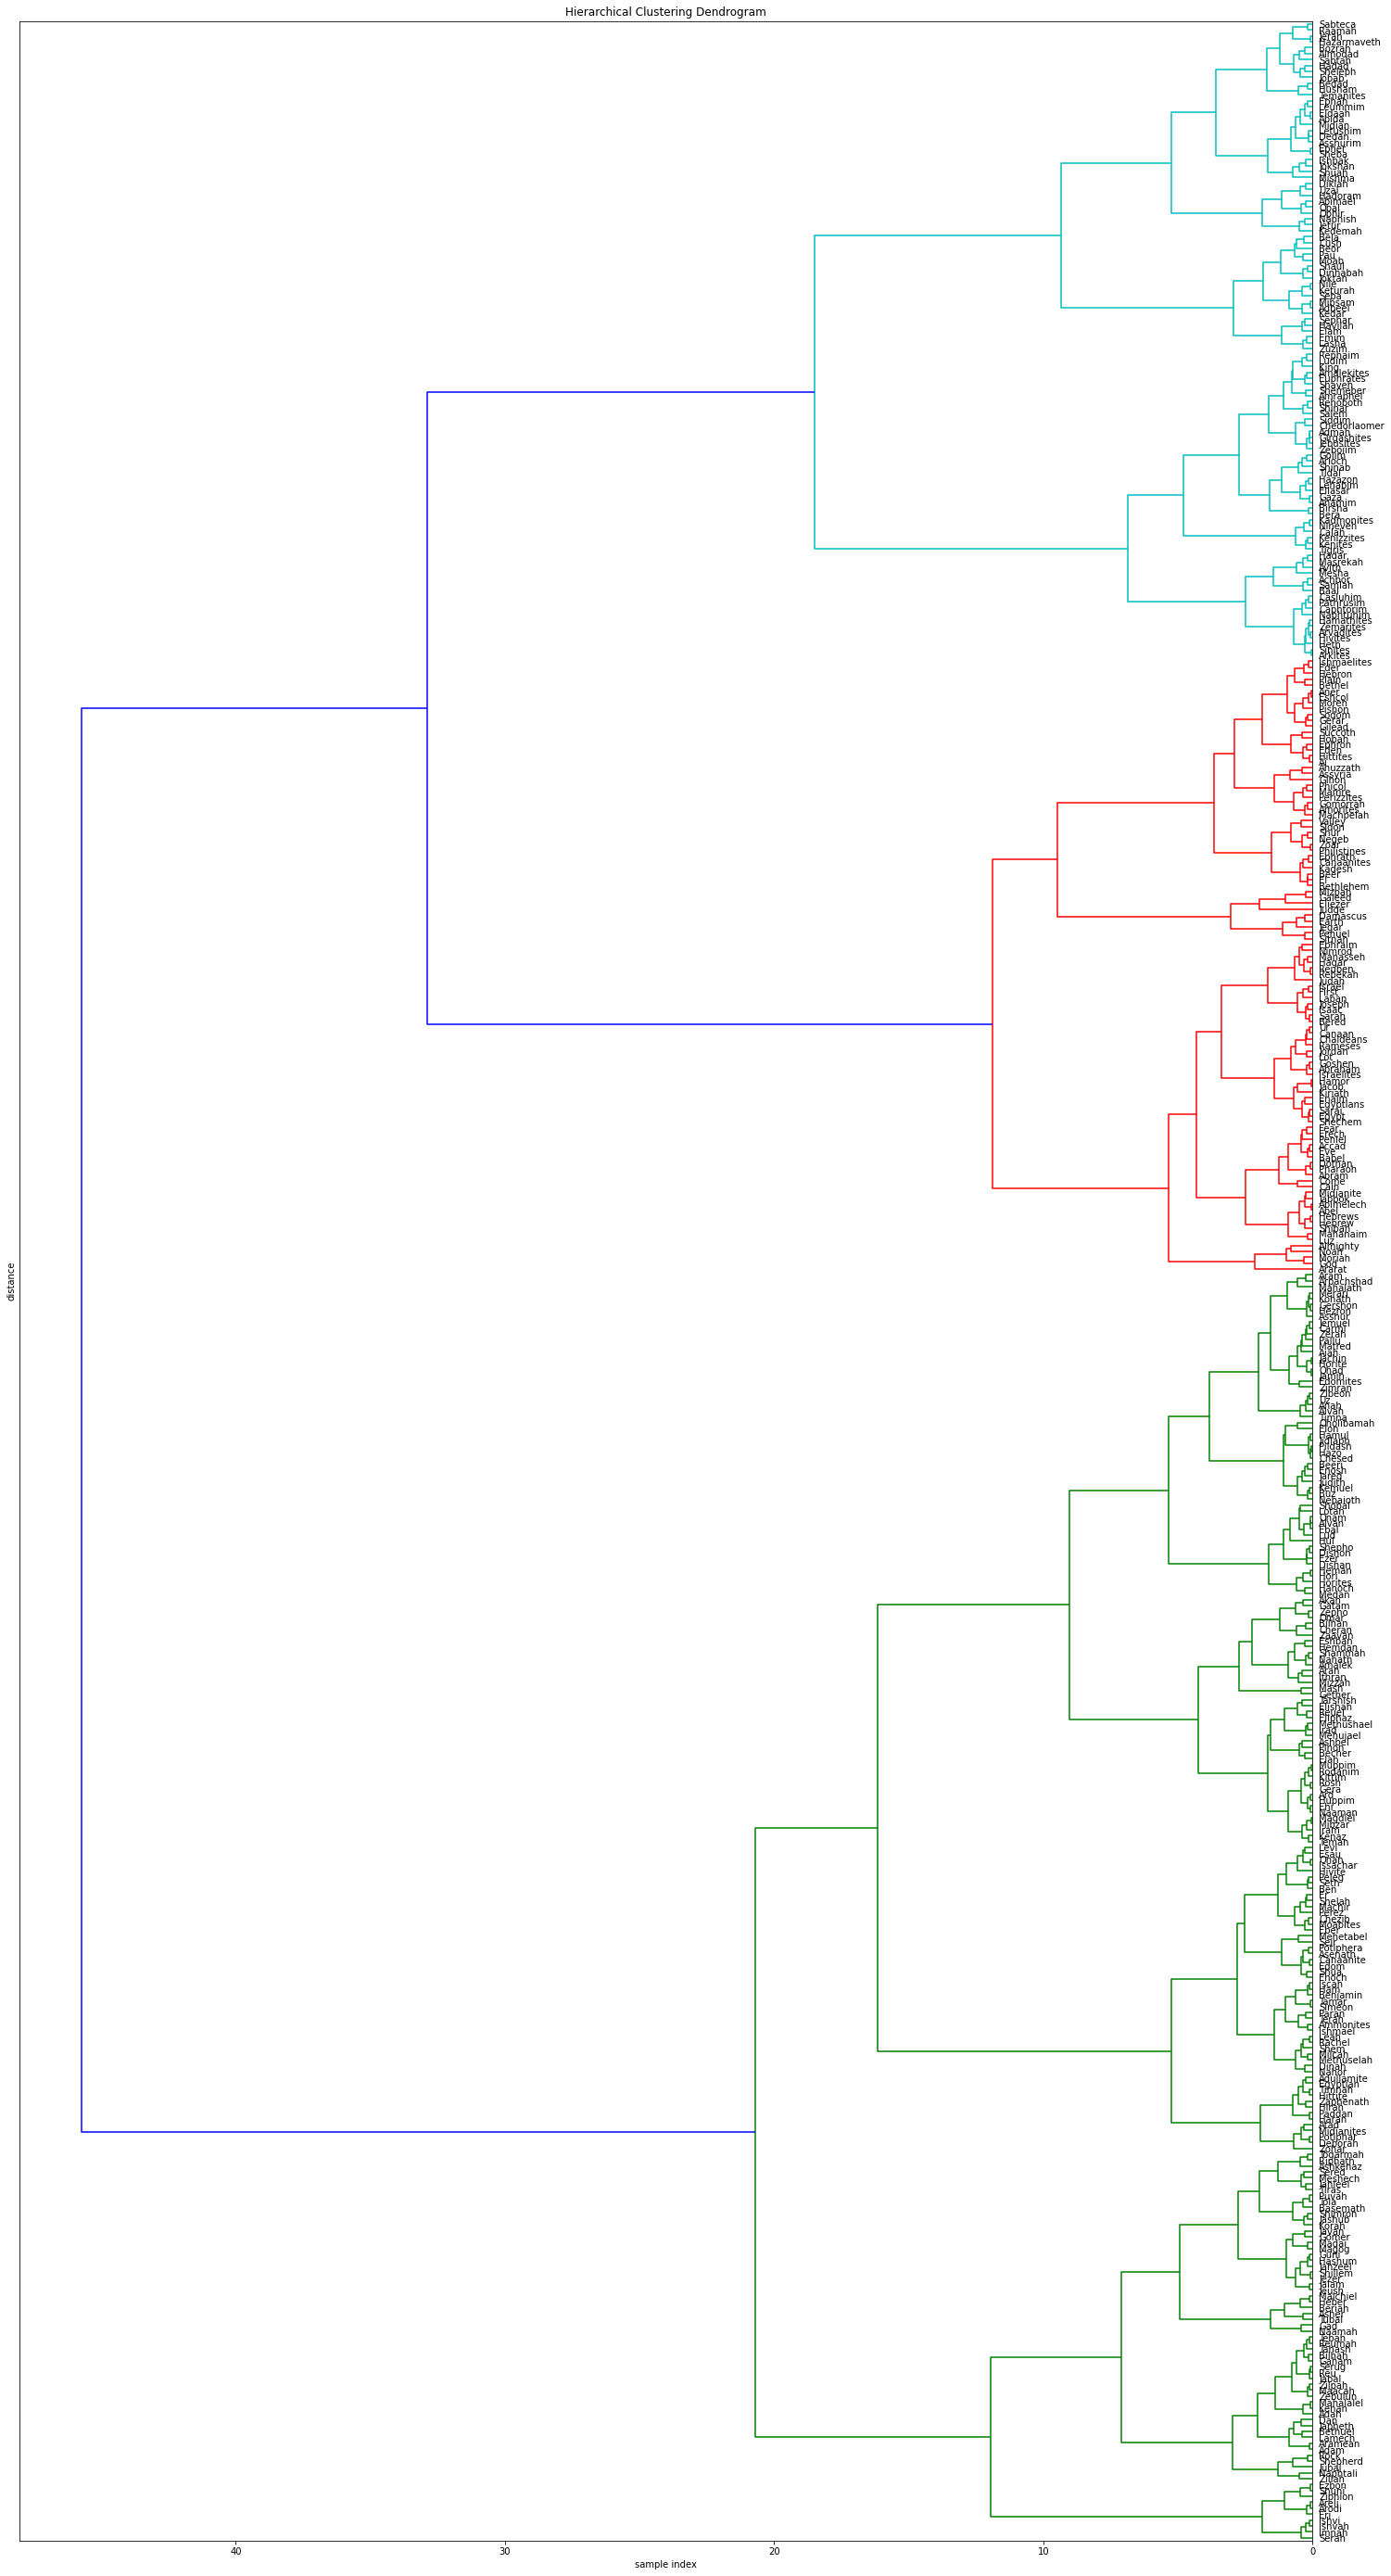

In [ ]:
from scipy.cluster.hierarchy import dendrogram, ward
from scipy.cluster.hierarchy import linkage

for i, emb_file in enumerate(w2v_file_list):
    Z = linkage(Ents_vecs_list[i], 'ward')
    #dendrogram(Z)
    plt.figure(figsize=(25, 50))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('sample index')
    plt.ylabel('distance')
    dendrogram(
        Z,
        labels=Ents_list[i],
        orientation='left',
        #leaf_rotation=90.,  # rotates the x axis labels
        leaf_font_size=10.,  # font size for the x axis labels
    )
    plt.show()
    #нипанятна что тут могло быть, но не вижу ничего
    #точнее тут могло бы быть что-то типа родители-дети , но не получилось

In [ ]:
from sklearn import cluster, datasets, mixture
'''
w2v_class_list=[]
w2v_list=[]
df_list=[]
Ents_list=[]
Ents_vecs_list=[]
'''
EPS=.75
Ents_dbscan_preds=[]
for i, emb_file in enumerate(w2v_file_list):
    #print(emb_file)
    dbscan = cluster.DBSCAN(eps=EPS)
    dbscan.fit(Ents_vecs_list[i])
    #Ents_dbscan_preds.append(dbscan.predict(Ents_vecs_list[i]))
    Ents_dbscan_preds.append(dbscan.labels_.astype(int))

#print(len(Ents_dbscan_preds),Ents_dbscan_preds)

for k, emb_file in enumerate(w2v_file_list):
    print(emb_file)
    for n in range(max(Ents_dbscan_preds[k])): #по номеру кластера
        print(max(Ents_dbscan_preds[k]))
        #для каждого номера кластера выведем список NER ограниченный вторым списком
        print_cluster(n, Ents_list[k], Ents_dbscan_preds[k], most_mentioned_Ents_list[k])
        #print_cluster(n, Ents_list[k], Ents_dbscan_preds[k], Ents_list[k])
# из most_mentioned_Ents_list почти никого
#как-то не особо, попробуем нормализовать

/content/drive/MyDrive/Theogony_3_n_3_ep_851_win_11.w2v
2
************ 0 ************
Cronos
Zeus
Hera
Poseidon
Aphrodite
Iapetus
Nyx
Olympus
Uranus
Tartarus
Rhea
Cottus
Titans
Ocean
Heracles
Styx
Prometheus
2
************ 1 ************
/content/drive/MyDrive/theog_2_n_50_ep_351_win_11.w2v
/content/drive/MyDrive/theog_1_n_100_ep_100_win_15.w2v
/content/drive/MyDrive/Gilg_n_3_ep_25_win_11.w2v
1
************ 0 ************
Gilgamesh
Shamash
Uruk
Anu
Ishtar
Enkidu
Enlil
Ea
Ninsun
Humbaba
Lugulbanda
Bull
Heaven
Urshanabi
/content/drive/MyDrive/Gilg_1_n_100_ep_100_win_9.w2v
/content/drive/MyDrive/The_Genesis_n_3_ep_151_win_11.w2v
2
************ 0 ************
God
Eden
Cain
Abel
Enoch
Lamech
Adah
Seth
Enosh
Noah
Shem
Ham
Japheth
Canaan
Egypt
Philistines
Canaanites
Gerar
Sodom
Gomorrah
Eber
Arpachshad
Shelah
Come
Nahor
Terah
Abram
Haran
Lot
Sarai
Milcah
Shechem
Bethel
Egyptians
Pharaoh
Zoar
Mamre
King
Seir
Dan
Hittites
Egyptian
Hagar
Ishmael
Abraham
Sarah
Isaac
Abimelech
Beer
Bethuel
Rebekah

In [ ]:
from sklearn.preprocessing import StandardScaler

Ents_dbscan_preds_norm=[]
for i, emb_file in enumerate(w2v_file_list):
    #print(emb_file)
    dbscan = cluster.DBSCAN(eps=EPS)
    dbscan.fit(StandardScaler().fit_transform(Ents_vecs_list[i]))
    #Ents_dbscan_preds.append(dbscan.predict(Ents_vecs_list[i]))
    Ents_dbscan_preds_norm.append(dbscan.labels_.astype(int))

#print(len(Ents_dbscan_preds),Ents_dbscan_preds)

for k, emb_file in enumerate(w2v_file_list):
    print(emb_file)
    for n in range(max(Ents_dbscan_preds_norm[k])): #по номеру кластера
        #для каждого номера кластера выведем список NER ограниченный вторым списком
        print_cluster(n, Ents_list[k], Ents_dbscan_preds_norm[k], most_mentioned_Ents_list[k])
        #print_cluster(n, Ents_list[k], Ents_dbscan_preds_norm[k], Ents_list[k])

#как-то не особо, попробуем нормализовать
#те же яйца

/content/drive/MyDrive/Theogony_3_n_3_ep_851_win_11.w2v
************ 0 ************
Cronos
Zeus
Hera
Poseidon
Aphrodite
Iapetus
Nyx
Olympus
Uranus
Tartarus
Rhea
Cottus
Titans
Ocean
Heracles
Styx
Prometheus
************ 1 ************
/content/drive/MyDrive/theog_2_n_50_ep_351_win_11.w2v
/content/drive/MyDrive/theog_1_n_100_ep_100_win_15.w2v
/content/drive/MyDrive/Gilg_n_3_ep_25_win_11.w2v
************ 0 ************
Gilgamesh
Shamash
Uruk
Anu
Ishtar
Enkidu
Enlil
Ea
Ninsun
Humbaba
Lugulbanda
Bull
Heaven
Utnapishtim
Urshanabi
/content/drive/MyDrive/Gilg_1_n_100_ep_100_win_9.w2v
/content/drive/MyDrive/The_Genesis_n_3_ep_151_win_11.w2v


In [ ]:
#надо другую кластеризацию попробовать -- пробовал DBSCAN - ничего хорошего
#потом общие эмбидинги
#и  на скандинавах контроль провести или в другом порядке, скандинавы, потом общие эмбидинги
#7 кластеров - в-общем хорошее число, Пропп - проверить
#надо бы скрытые конкурирующие сущности попробовать выявить, типа earth - в Бытии один раз с большой буквы и много раз с маленькой
#у Гесиода тоже есть, да и везде
#Гесиод кстати попал в крутой кластер, возможно это закон
#или все в куче кластеризовать? или просто ближайшие слова просмотреть
#если вылажусь проследить совпадающие NER типа Gomer/Japeth-Iapethus/Gera
#Shammah

In [ ]:
#общий эмб и кластеризация
w2v_file_list = ['/content/drive/MyDrive/Theogony_3_n_3_ep_851_win_11.w2v',#емб маленькой размерности много эпох
                 '/content/drive/MyDrive/Gilg_n_3_ep_25_win_11.w2v',#емб средней размерности эпох много, накосячил с именем файла
                 '/content/drive/MyDrive/The_Genesis_n_3_ep_151_win_11.w2v',
            ]

#w2v_file_list = ['/content/drive/MyDrive/Theogony_3_n_3_ep_851_win_11.w2v',#емб маленькой размерности много эпох

w2v_list, Ents_list, df_list, most_mentioned_Ents_list = get_w2v_vectors(w2v_file_list, MENTS_NUM)

Ents_vecs_list=[]
for n, Ents in enumerate(Ents_list):
    Ents_vecs_list.append([])
    for Entity in Ents:
        Ents_vecs_list[n].append(w2v_list[n][Entity])

17 ['Zeus', 'Olympus', 'Cronos', 'Uranus', 'Ocean', 'Titans', 'Aphrodite', 'Nyx', 'Iapetus', 'Hera', 'Tartarus', 'Heracles', 'Poseidon', 'Rhea', 'Cottus', 'Styx', 'Prometheus']
15 ['Gilgamesh', 'Enkidu', 'Uruk', 'Humbaba', 'Shamash', 'Utnapishtim', 'Enlil', 'Urshanabi', 'Bull', 'Anu', 'Ninsun', 'Ishtar', 'Heaven', 'Ea', 'Lugulbanda']
83 ['God', 'Jacob', 'Joseph', 'Abraham', 'Egypt', 'Pharaoh', 'Isaac', 'Esau', 'Laban', 'Abram', 'Canaan', 'Rachel', 'Israel', 'Noah', 'Sarah', 'Lot', 'Rebekah', 'Leah', 'Judah', 'Abimelech', 'Sodom', 'Shechem', 'Cain', 'Sarai', 'King', 'Ishmael', 'Nahor', 'Come', 'Shem', 'Benjamin', 'Haran', 'Reuben', 'Egyptians', 'Hagar', 'Bethel', 'Ephron', 'Edom', 'Hittites', 'Shelah', 'Beer', 'Paddan', 'Manasseh', 'Hamor', 'Simeon', 'Hittite', 'Goshen', 'Mamre', 'Enoch', 'Ham', 'Japheth', 'Lamech', 'Canaanites', 'Ephraim', 'Seir', 'Bethuel', 'Abel', 'Terah', 'Bilhah', 'Gomorrah', 'Anah', 'Gerar', 'Philistines', 'Adah', 'Eliphaz', 'Eber', 'Milcah', 'Oholibamah', 'Zoar',

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [ ]:
#надо бы общий эмб посчитать по текстам, но как-то не успеваю, потому просуммирую, что получится - то и получится
common_emb= dict()
for i, emb_file in enumerate(w2v_file_list):
    for key in w2v_list[i].keys():
        try:
            common_emb[key ]= (common_emb[key]+w2v_list[i][key])/2
        except:
            common_emb[key] = w2v_list[i][key]
    print(emb_file, len(w2v_list[i]), len(common_emb))

/content/drive/MyDrive/Theogony_3_n_3_ep_851_win_11.w2v 1921 1921
/content/drive/MyDrive/Gilg_n_3_ep_25_win_11.w2v 2377 3575
/content/drive/MyDrive/The_Genesis_n_3_ep_151_win_11.w2v 2749 5089


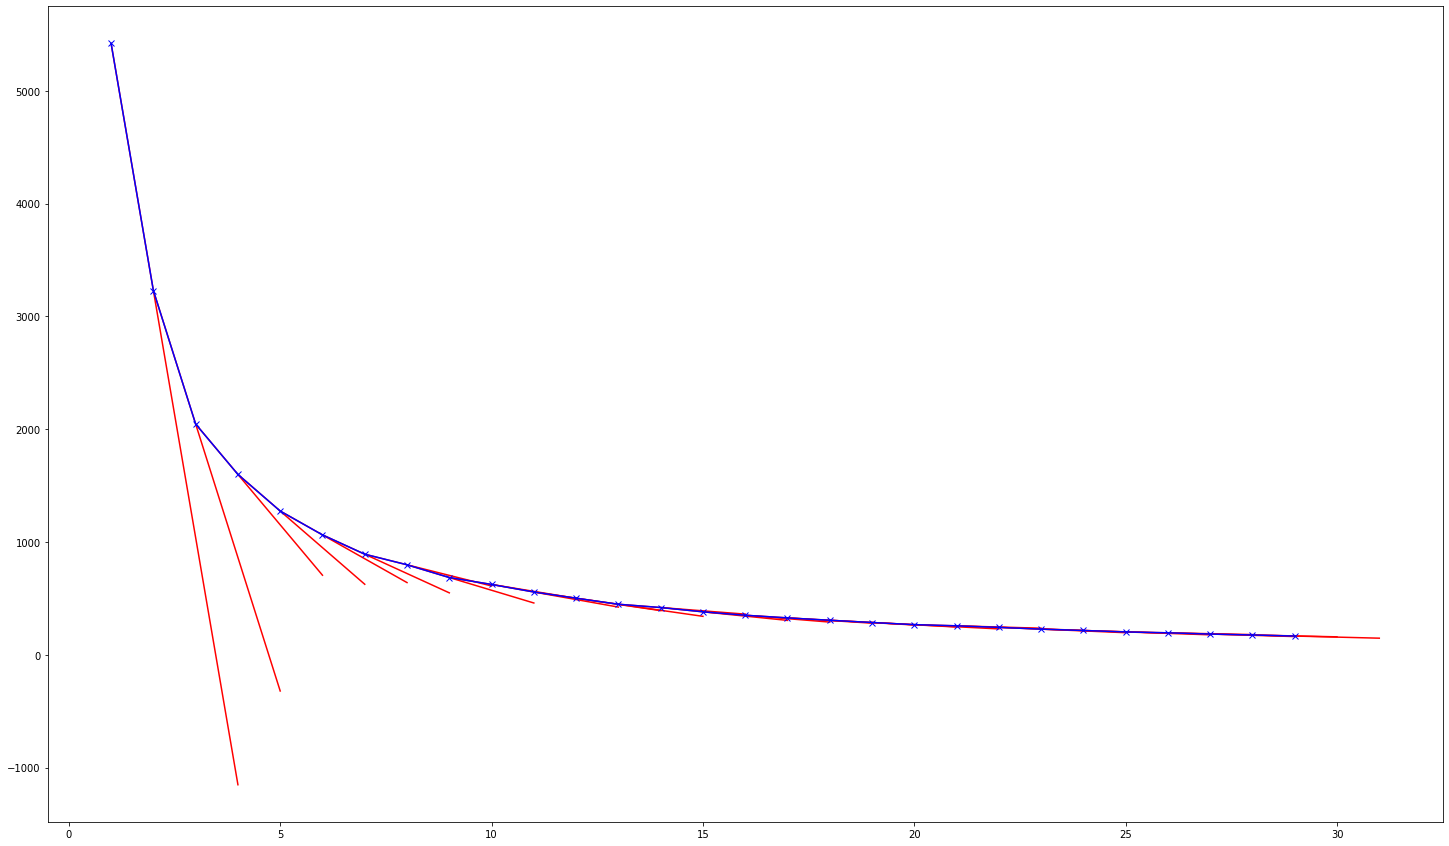

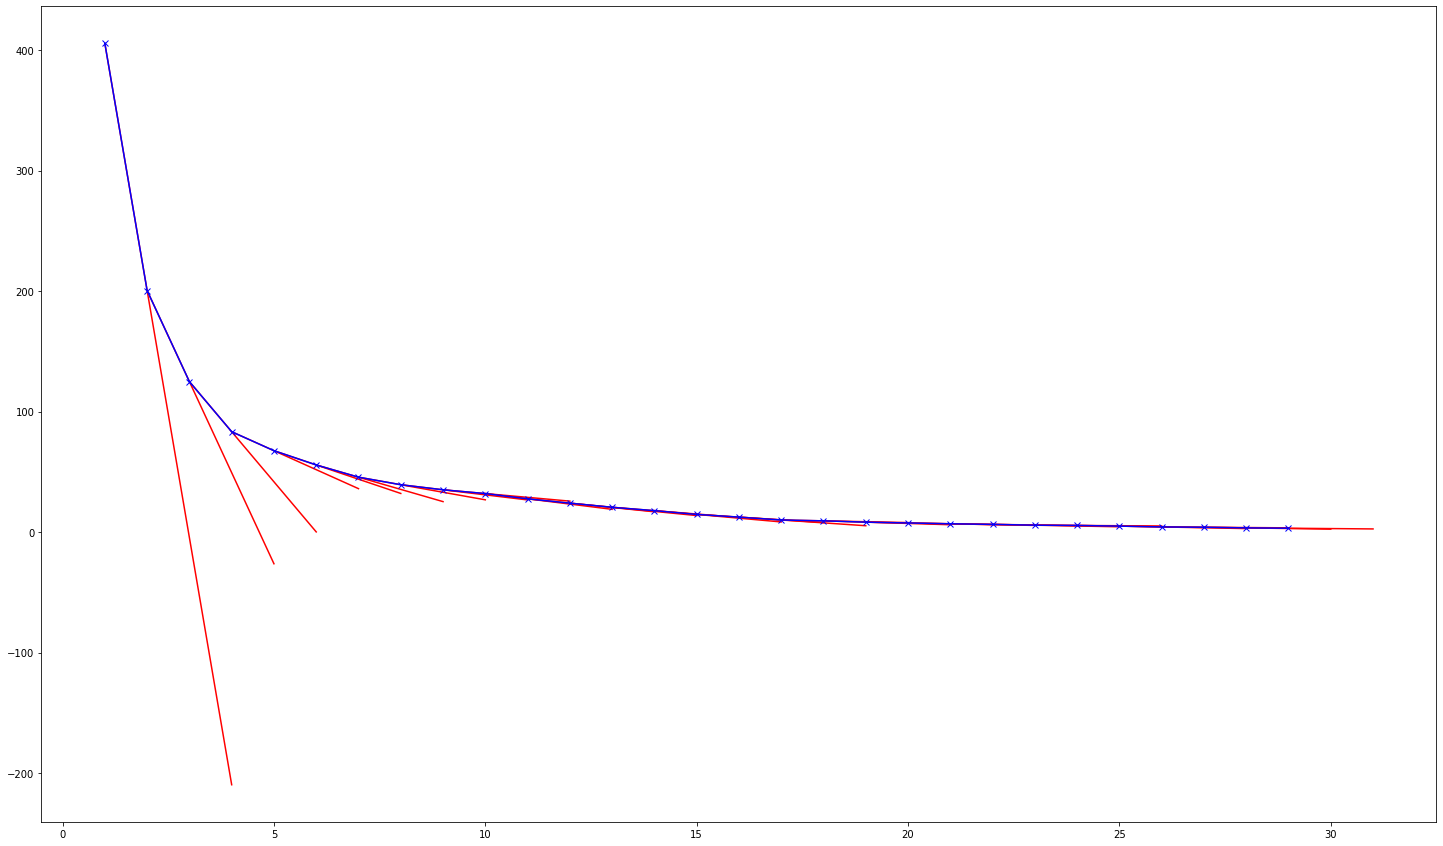

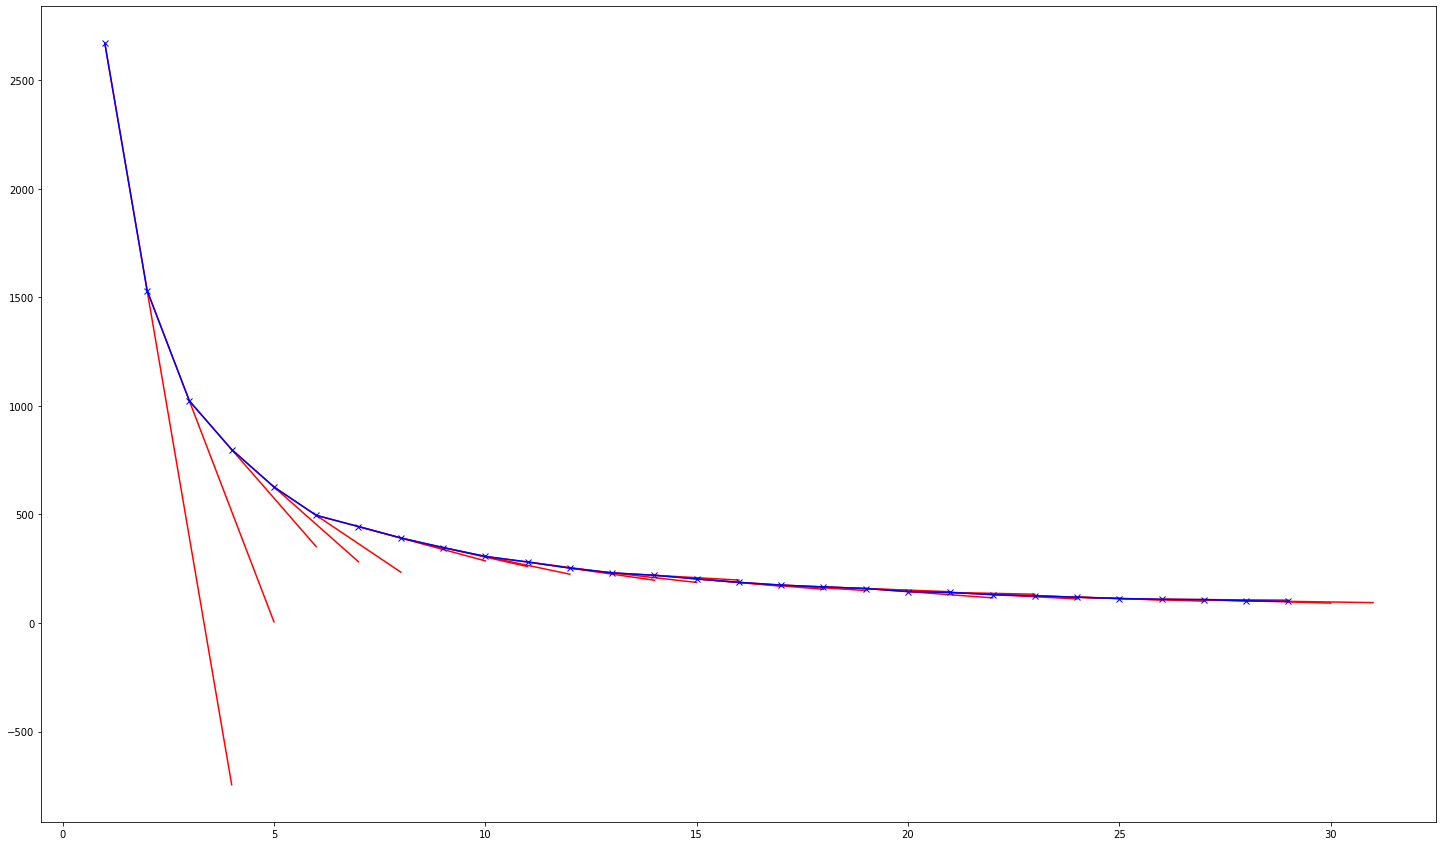

In [ ]:
for Ents_vecs in Ents_vecs_list:
    get_clusters(Ents_vecs)
#7-4-6 кластеров вижу в общем емб для отдельных списков NER - чем позже текст тем больше кластеров

805


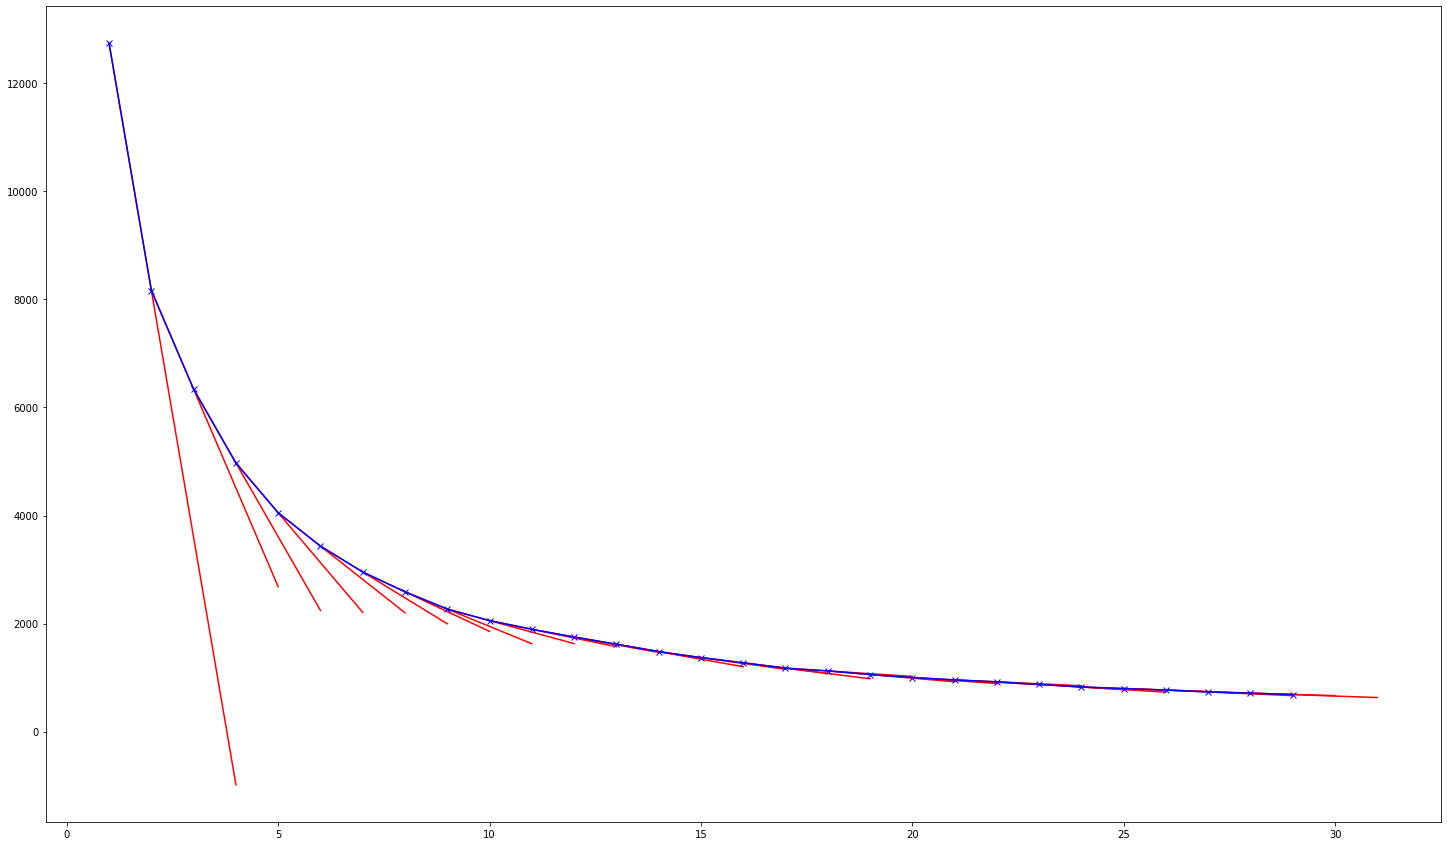

In [ ]:
common_Ents_vecs=[]
for i in range(len(Ents_vecs_list)):
    common_Ents_vecs += Ents_vecs_list[i]
    #print(len(Ents_vecs_list[i]))
print(len(common_Ents_vecs))

get_clusters(common_Ents_vecs)
#вижу 10 итого не так чтоб пересекались

In [ ]:
common_Ents_vecs_most_popular=[]
for i in range(len(most_mentioned_Ents_list)):
    common_Ents_vecs_most_popular += most_mentioned_Ents_list[i]

common_Ents_vecs_most_popular_vec =[]
for Ent in common_Ents_vecs_most_popular:
    common_Ents_vecs_most_popular_vec.append(common_emb[Ent])
    #print(len(Ents_vecs_list[i]))



n_clusters_list=[10]

Ents_cl_list=[]
for n_clusters in n_clusters_list:
    #print(n_clusters)
    for Ents_vecs in common_Ents_vecs_most_popular:
        Ents_cl_list.append(get_clusters_labels(n_clusters, common_Ents_vecs_most_popular_vec))
        #break
print(len(Ents_cl_list))

115


In [ ]:
#сейчас выведем все кластера на ограничиваясь списком
for n in range(10): #по номеру кластера
    class_list=[]
    for i,j in enumerate(Ents_cl_list[0]):
        #print(i)
        if j==n:
            class_list.append(common_Ents_vecs_most_popular[i])
    print('*****', n,' класс',class_list)

***** 0  класс ['Esau', 'Leah', 'Shem', 'Japheth', 'Lamech', 'Bethuel', 'Bilhah', 'Milcah', 'Seth', 'Zilpah', 'Levi', 'Dan']
***** 1  класс ['God', 'Joseph', 'Abraham', 'Egypt', 'Pharaoh', 'Isaac', 'Laban', 'Abram', 'Canaan', 'Israel', 'Sarah', 'Lot', 'Abimelech', 'Shechem', 'Cain', 'Sarai', 'Come', 'Egyptians', 'Goshen', 'Abel']
***** 2  класс ['Zeus', 'Olympus', 'Cronos', 'Uranus', 'Nyx', 'Poseidon', 'Styx', 'Prometheus']
***** 3  класс ['Uruk', 'Humbaba', 'Enlil', 'Bull', 'Anu', 'Ninsun', 'Ishtar', 'Heaven', 'Ea', 'Noah', 'Almighty']
***** 4  класс ['Shelah', 'Anah', 'Adah', 'Eliphaz', 'Eber', 'Oholibamah', 'Zibeon', 'Enosh', 'Basemath', 'Arpachshad']
***** 5  класс ['Sodom', 'King', 'Bethel', 'Ephron', 'Hittites', 'Beer', 'Mamre', 'Canaanites', 'Gomorrah', 'Gerar', 'Philistines', 'Zoar', 'Eden', 'Machpelah']
***** 6  класс ['Jacob', 'Rachel', 'Rebekah', 'Judah', 'Ishmael', 'Nahor', 'Benjamin', 'Haran', 'Reuben', 'Hagar', 'Paddan', 'Manasseh', 'Hamor', 'Simeon', 'Hittite', 'Ham', 'E

In [ ]:
#только 2 кластера чуть-чуть перемешались и Ной не попал к Гильгамешу
#придется все-таки считать общий w2vec, заодно поправим списки NER (Almighty, King, Heaven)
#возможно, скорей всего, порялок имеет значение, возьмем исторический, 

#не хватает памяти даже для тех корпусов что поменьше
#зря я утяжелил w2vec, надо было наоборот

#corp_list=['Hilg_corp.pkl','The_Genesis.pkl','Theogony_1921.pkl']
corp_list=['Hilg_corp.pkl','The_Genesis.pkl']
#corp_list=['Hilg_corp.pkl','Theogony_1921.pkl']
corpus_path='/content/drive/MyDrive/'
text_only=[]
for corp_name in corp_list:
    with open(corpus_path+corp_name, "rb") as fp:
        text_only += pickle.load(fp)
    #print(len(text_only))


In [ ]:

Ents_0 = [
          'God', 'Earth', 'Eden', 'Pishon', 'Havilah', 'Gihon', 'Cush', 'Tigris', 'Assyria', 'Euphrates', 'Eve', 'Cain', 'Abel', 'Enoch', 'Irad', 'Mehujael', 'Methushael', 
          'Lamech', 'Adah', 'Zillah', 'Jabal', 'Jubal', 'Tubal', 'Naamah', 'Adam', 'Seth', 'Enosh', 'Kenan', 'Mahalalel', 'Jared', 'Methuselah', 'Noah', 'Shem', 'Ham', 
          'Japheth', 'Ararat', 'Canaan', 'Gomer', 'Magog', 'Madai', 'Javan', 'Meshech', 'Tiras', 'Ashkenaz', 'Riphath', 'Togarmah', 'Elishah', 'Tarshish', 'Kittim', 
          'Rodanim', 'Egypt', 'Seba', 'Sabtah', 'Raamah', 'Sabteca', 'Sheba', 'Dedan', 'Nimrod', 'Babel', 'Erech', 'Accad', 'Shinar', 'Nineveh', 'Rehoboth', 'Calah', 
          'Ludim', 'Anamim', 'Lehabim', 'Naphtuhim', 'Pathrusim', 'Casluhim', 'Caphtorim', 'Philistines', 'Sidon', 'Heth', 'Jebusites', 'Amorites', 'Girgashites', 
          'Hivites', 'Arkites', 'Sinites', 'Arvadites', 'Zemarites', 'Hamathites', 'Canaanites', 'Gerar', 'Gaza', 'Sodom', 'Gomorrah', 'Admah', 'Zeboiim', 'Lasha', 'Eber',
          'Elam', 'Asshur', 'Arpachshad', 'Lud', 'Aram', 'Uz', 'Hul', 'Gether', 'Mash', 'Shelah', 'Peleg', 'Joktan', 'Almodad', 'Sheleph', 'Hazarmaveth', 'Jerah', 'Hadoram', 
          'Uzal', 'Diklah', 'Obal', 'Abimael', 'Ophir', 'Jobab', 'Mesha', 'Sephar', 'Reu', 'Serug', 'Nahor', 'Terah', 'Abram', 'Haran', 'Lot', 'Ur', 'Chaldeans', #'Come
          'Sarai', 'Milcah', 'Iscah', 'Shechem', 'Moreh', 'Bethel', 'Ai', 'Negeb', 'Egyptians', 'Pharaoh', 'Perizzites', 'Jordan', 'Zoar', 'Plain', 'Mamre', 'Hebron',# 'King', 
          'Amraphel', 'Arioch', 'Ellasar', 'Chedorlaomer', 'Tidal', 'Goiim', 'Bera', 'Birsha', 'Shinab', 'Shemeber', 'Bela', 'Valley', 'Siddim', 'Rephaim', 'Zuzim', 'Emim',
          'Horites', 'Seir', 'El', 'Kadesh', 'Amalekites', 'Hazazon', 'Hebrew', 'Eshcol', 'Aner', 'Dan', 'Hobah', 'Damascus', 'Shaveh', 'Salem', 'Eliezer', 'Kenites', 
          'Kenizzites', 'Kadmonites', 'Hittites', 'Egyptian', 'Hagar', 'Shur', 'Ishmael', 'Bered', 'Almighty', 'Abraham', 'Sarah', 'Isaac', 'Judge', 'Moab', 'Moabites', 'Ben',
          'Ammonites', 'Abimelech', 'Paran', 'Phicol', 'Moriah', 'Buz', 'Kemuel', 'Chesed', 'Hazo', 'Pildash', 'Jidlaph', 'Bethuel', 'Rebekah', 'Reumah', 'Tebah',#'Beer',
          'Gaham', 'Tahash', 'Maacah', 'Kiriath', 'Ephron', 'Zohar', 'Machpelah', 'Hittite', 'Laban', 'Keturah', 'Zimran', 'Jokshan', 'Medan', 'Midian', 'Ishbak', 'Shuah',
          'Asshurim', 'Letushim', 'Leummim', 'Ephah', 'Epher', 'Hanoch', 'Abida', 'Eldaah', 'Nebaioth', 'Kedar', 'Adbeel', 'Mibsam', 'Mishma', 'Hadad', 'Jetur', 'Naphish', 
          'Kedemah', 'Aramean', 'Paddan', 'Esau', 'Jacob', 'Edom', 'Sitnah', 'Ahuzzath', 'Shibah', 'Judith', 'Beeri', 'Basemath', 'Elon', 'Canaanite', 'Mahalath',#'First',
          'Luz', 'Rachel', 'Leah', 'Zilpah', 'Bilhah', 'Reuben', 'Simeon', 'Levi', 'Judah', 'Naphtali', 'Gad', 'Asher', 'Issachar', 'Zebulun', 'Dinah', 'Joseph', 'Gilead',
          'Fear', 'Jegar', 'Galeed', 'Mizpah', 'Mahanaim', 'Jabbok', 'Israel', 'Peniel', 'Penuel', 'Israelites', 'Succoth', 'Hamor', 'Hivite', 'Deborah', 'Ephrath', 'Benjamin', 
          'Bethlehem', 'Eder', 'Oholibamah', 'Anah', 'Zibeon', 'Eliphaz', 'Reuel', 'Jeush', 'Jalam', 'Korah', 'Edomites', 'Teman', 'Omar', 'Zepho', 'Gatam', 'Kenaz', 'Timna',
          'Amalek', 'Nahath', 'Zerah', 'Shammah', 'Mizzah', 'Horite', 'Lotan', 'Shobal', 'Dishon', 'Ezer', 'Dishan', 'Hori', 'Heman', 'Alvan', 'Ebal', 'Shepho', 'Onam', 'Aiah', 
          'Hemdan', 'Eshban', 'Ithran', 'Cheran', 'Bilhan', 'Zaavan', 'Akan', 'Aran', 'Beor', 'Dinhabah', 'Bozrah', 'Husham', 'Temanites', 'Bedad', 'Avith', 'Samlah', 'Masrekah', 
          'Shaul', 'Baal', 'Achbor', 'Hadar', 'Pau', 'Mehetabel', 'Matred', 'Alvah', 'Elah', 'Pinon', 'Mibzar', 'Magdiel', 'Iram', 'Dothan', 'Ishmaelites', 'Midianite', 
          'Midianites', 'Potiphar', 'Adullamite', 'Hirah', 'Shua', 'Er', 'Onan', 'Chezib', 'Tamar', 'Timnah', 'Enaim', 'Perez', 'Hebrews', 'Nile', 'Zaphenath', 'Asenath', 
          'Potiphera', 'Manasseh', 'Ephraim', 'Goshen', 'Pallu', 'Hezron', 'Carmi', 'Jemuel', 'Jamin', 'Ohad', 'Jachin', 'Gershon', 'Kohath', 'Merari', 'Hamul', 'Tola', 'Puvah',
          'Jashub', 'Shimron', 'Sered', 'Jahleel', 'Ziphion', 'Shuni', 'Ezbon', 'Eri', 'Arodi', 'Areli', 'Imnah', 'Ishvah', 'Ishvi', 'Beriah', 'Serah', 'Heber', 'Malchiel', 
          'Becher', 'Ashbel', 'Gera', 'Naaman', 'Ehi', 'Rosh', 'Muppim', 'Huppim', 'Ard', 'Hashum', 'Jahzeel', 'Guni', 'Jezer', 'Shillem', 'Rameses', 'Shepherd',# 'Rock',
          'Atad', 'Machir'
          ]
Ents_1 = ['Hanish', 'Nimnul', 'Enmul', 'Ninki', 'Enki', 'Nindukugga', 'Endukugga', 'Ninhursag', 'Shulpae', 'Dumuzi', 'Ned', 'Namtar', 'Nisir', 'Anu', 'Annunaki',
          'Nergal', 'Shullat', 'Ea', 'Ennugi', 'Shurrupak', 'Mammetun', 'Anunnaki', 'Dihnun', 'Urshanabi', 'UbaraTutu', 'Siduri', 'ManScorpion', 'Mashu', 'Dilmun',
          'Utnapishtim', 'Irkalla', 'Nippur', 'Bull', 'BullOfHeaven', 'Ishullanu', 'Silili', 'Tammuz', 'Ishtar', 'Euphrates', 'Lebanon', 'Hermon', 'Namtar', 'Magilum',
          'Ningal', 'Kullab', 'Lugulbanda', 'Anshan', 'Aya', 'Enlil', 'Humbaba', 'Ninsun', 'Samugan', 'Nisaba', 'Ninurta', 'Enkidu', 'Aruru', 'Anu', 'Lord of Uruk',
          'Eanna', 'Uruk', 'Adad', 'Shamash', 'Gilgamesh', 'Antum', 'Ki', 'Gods', 'Sages', 'Ningiesu', 'Kullas', 'Endusugga', 'Ishullana', 'BefitSheri', 'Ereshkigal',
          'Ningizzida', 'Neti', 'Apsu', 'Man-scorpion', 'Nedu', 'Magan', 'PuzurAmurri', 'Igigi', 'Ad', 'Luguleanda', 'Mammetum', 'Underworld', 'Heaven', 'Ninlil',
          'Sin', 'Ellish', 'Etana', 'Shurrupax', 'Egalmah']
Ents_2 = ['Melpomene', 'Nilus', 'Meander', 'Amphitrite', 'Argos', 'Hades', 'Euagore', 'Alpheus', 'Thaumas', 'Iolaus', 'Philommedes', 'Thoe', 'Polydorus',
        'Algea', 'Euarne', 'Limos', 'Latinus', 'Hestia', 'Echidna', 'Rivers', 'Ino', 'Rhesus', 'Anchises', 'Titans', 'Gyes', 'Amphirho', 'Aphrodite', 'Pherusa', 
        'Plutus', 'Medea', 'Harmonia', 'Agaue', 'Clymene', 'Laomedea', 'Odysseus', 'Typhoeus', 'Geryones', 'Phoreys', 'Menestho', 'Eos', 'Iasion', 'Actaea', 'Epimetheus',
        'Demeter', 'Notus', 'Zelus', 'Olmeius', 'Telesto', 'Eosphorus', 'Pallas', 'Ianthe', 'Galatea', 'Menoetius', 'Aegeum', 'Lyetus', 'Perses', 'Cleio',
        'Ceto', 'Pluto', 'Psamathe', 'Arges', 'Philyra', 'Chrysaor', 'Eurybia', 'Horae', 'Pontus', 'Phonos', 'Amphitryon', 'Asia', 'Maia', 'Nessus', 'Polyhymnia', 'Rhodius', 
        'Apesas', 'Tyche', 'Pasithoe', 'Enyo', 'Phasis', 'Prymno', 'Erato', 'Agrius', 'Chaos', 'Tithonus', 'Styx', 'Glauconome', 'Iason', 'Theia', 'Hadesoneus', 
        'Pontoporea', 'Crete', 'Zeus', 'Moros', 'Eudora', 'Iolcus', 'Eros', 'Chimaera', 'Apateon', 'Atropos', 'Urania', 'Othyrs', 'Pytho', 'Idyia', 'Lethe', 'Helius', 
        'HydraOfLerna', 'Triton', 'Strymon', 'Polynoe', 'Arima', 'Euryale', 'Aristaeus', 'Pelias', 'Phorcys', 'Jason', 'Harpies', 'Protomedea', 'Limping', 'Oceanus',
        'Haliacmon', 'Permessus', 'Nisaea', 'Slovoprenia', 'Cymopolea', 'Geras', 'Cymodoce', 'Euterpe', 'Erythea', 'Xanthe', 'Cerberus', 'Graiae', 'Ister', 'Medeus',
        'Lysianassa', 'Peleus', 'Hermes', 'Galene', 'Bellerophon', 'Ares', 'Athene', 'Himerus', 'Ladon', 'Erinyes', 'Hippothoe', 'Pasithea', 'Meliae', 'Perseus', 
        'Ethiopians', 'Alimede', 'Mnemosyne', 'Admete', 'Dione', 'Cyprus', 'Parnassus', 'Terpsichore', 'Cythera', 'Achilles', 'Atlas', 'Acaste', 'Dynamene', 'Lachesis', 'Mecone', 
        'Autonoe', 'Pseudea', 'Ploto', 'Kera', 'Aeson', 'Thanatos', 'Speo', 'Hecate', 'Erigenia', 'Olympus', 'Thetis', 'Hippo', 'Tyrenians', 'Clotho', 'Europa', 'Cerceis',
        'Themis', 'Aeacus', 'Zephyrus', 'Rhodea', 'Caicus', 'Zeuxo', 'Peitho', 'Boreas', 'Artemis', 'Helicon', 'Philotis', 'Thebe', 'Briareos', 'Semele', 'Hesiod', 'Doris',
        'Aello', 'Scamander', 'Lyctus', 'Tiryns', 'Neikea', 'Hera', 'Eurynome', 'Ianeira', 'Hyperion', 'Cymothoe', 'Melobosis', 'Achelous', 'Keras', 'Granicus', 'Theban',
        'Hesperides', 'Memnon', 'Hemera', 'Galaxaura', 'Hermus', 'Plexaura', 'Mount', 'Forthwith', 'Poseidon', 'Iris', 'Metis', 'Simois', 'Nausithous', 'Coeus', 
        'Cymatolege', 'Zephyr', 'Olympian', 'Pegasus', 'Melite', 'Heptaporus', 'Calliope', 'Eucrante', 'Tartarus', 'Melian', 'Hephaestus', 'Orthus', 'Eione', 'Eunice', 'Selene', 
        'Aglaea', 'Nemea', 'Phaethon', 'Panopea', 'Eulimene', 'Aeneas', 'Telegonus', 'Prometheus', 'Thaleia', 'Sangarius', 'Machae', 'Heliconian', 'Halie', 'Pieria', 'Dionysus', 
        'Ocyrrhoe', 'Pemphredo', 'Calypso', 'Androktasiai', 'Nausinous', 'Astraeus', 'Steropes', 'Cronos', 'Cottus', 'Polydora', 'Cadmeans', 'Electra', 'Nereus', 'Ariadne', 'Tethys', 
        'Sphinx', 'Petraea', 'Hypnos', 'Uranus', 'Erebus', 'Brontes', 'Hysmina', 'Chryseis', 'Peneus', 'Nemertes', 'Iapetus', 'Moirocaust', 'Hebe', 'Persephone', 'Eridanus', 'Cephalus', 
        'Sthenno', 'Alcmena', 'Apollo', 'Aesepus', 'Amphilology', 'Heracles', 'Gorgons', 'Hipponoe', 'Sao', 'Minos', 'Tretus', 'Ocean', 'Leto', 'Eileithyia', 'Typhaon', 
        'Perseis', 'Cadmus', 'Giants', 'Medusa', 'Nyx', 'Ida', 'Tritogeneia', 'Cheiron', 'Rhea', 'Clytie', 'Crius', 'Glauce', 'Cymo', 'Helios', 'Callirrhoe', 'Aeetes',
        'Pyros','Potamois','LionOfNemea','Emathion','Phoebe'
        ]
Ents = Ents_0 + Ents_1 + Ents_2
print(len(Ents))   


833


In [ ]:
settings = {
          #'corp_name':'Gilg_Genesis_Theogony',
          #вылетает win=7'corp_name':'Gilg_Genesis',
          'corp_name':'Gilg_Theogony',
          #'window_size': 11, # размер окна #220427 надо - бы статистику по тексту считать #221004 - введем стандарт 11, из соображений примерно средняя длина (15-20 слов) англ предложения - артикли
          'window_size': 7, # размер окна #220427 надо - бы статистику по тексту считать #221004 - введем стандарт 11, из соображений примерно средняя длина (15-20 слов) англ предложения - артикли
          # Вложение размерности, также размер скрытого слоя.
          #'n': 3, #221004 50 сделаем стандартом, 100кб с размером 100 по памяти с трудом удерживаются в обычном колабе, сделаем запас на длину текста, попробуем остальное добрать эпохами
          #'n': 12, #220427 можно попробовать визуализировать на плоскости как 2 координаты + 10 цифр или цвета или цвета+размер окружности или маркер
          'n': 12, #220427 12 - не хватает памяти] в колабе, 7 - тоже
          'epochs': 1, # указывает количество раз, которое нужно пройти по всей выборке. В каждую эпоху мы циклически перебираем образцы тренировочного набора.
          'learning_rate': 0.01 # уровень обучения
}

corpus=[]
for text in text_only:
    #проявим уважение
    #corpus.append([word.lower() for word in text.split()])
    corpus_str=[]
    for word in text.split():
        if word in Ents:
            corpus_str.append(word)
        else:
            corpus_str.append(word.lower())
    corpus.append(corpus_str)

w2v = word2vec(settings)
training_data = w2v.generate_training_data(settings, corpus)
#w2v.train(training_data)

/content/word2vec.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(training_data)


In [ ]:
CORP_PATH='/content/drive/MyDrive/'
CORP_NAME=settings['corp_name']
def file_name_path(w2v, name=CORP_NAME, dir_name=CORP_PATH, ext_name='.w2v'):
    w2v_file_name = name+'_n_'+str(w2v.n)+'_ep_'+str(w2v.total_epochs)+'_win_'+str(w2v.window)
    corp_file_path=dir_name+w2v_file_name+ext_name
    return w2v_file_name, corp_file_path

#w2v = load_w2v('/content/drive/MyDrive/Gilg_Theogony_n_12_ep_76_win_7.w2v')

for i in range(1000):
    w2v.train(training_data, 25)
    model_name, path = file_name_path(w2v)
    save_w2v(path, w2v)
    print(i, w2v.total_epochs)


Epoch: 0 Loss: 1716615.645617752
Epoch: 1 Loss: 1716331.8042936157
Epoch: 2 Loss: 1716056.969746049
Epoch: 3 Loss: 1715790.689835712
Epoch: 4 Loss: 1715532.540583872
Epoch: 5 Loss: 1715282.1242532027
Epoch: 6 Loss: 1715039.0675351715
Epoch: 7 Loss: 1714803.019845906
Epoch: 8 Loss: 1714573.6517324734
Epoch: 9 Loss: 1714350.6533883251
Epoch: 10 Loss: 1714133.7332771393
Epoch: 11 Loss: 1713922.6168615047
Epoch: 12 Loss: 1713717.0454325315
Epoch: 13 Loss: 1713516.775034465
Epoch: 14 Loss: 1713321.5754781456
Epoch: 15 Loss: 1713131.2294357766
Epoch: 16 Loss: 1712945.531609769
Epoch: 17 Loss: 1712764.2879681059
Epoch: 18 Loss: 1712587.31503876
Epoch: 19 Loss: 1712414.4392572953
Epoch: 20 Loss: 1712245.4963607525
Epoch: 21 Loss: 1712080.33082397
Epoch: 22 Loss: 1711918.7953331196
Epoch: 23 Loss: 1711760.7502931375
Epoch: 24 Loss: 1711606.063366376
0 50
Epoch: 0 Loss: 1711454.6090396007
Epoch: 1 Loss: 1711306.268217536
Epoch: 2 Loss: 1711160.9278409542
Epoch: 3 Loss: 1711018.4805282305
Epoch: 

KeyboardInterrupt: ignored

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


32 ['Gilgamesh', 'Enkidu', 'Zeus', 'Uruk', 'Humbaba', 'Shamash', 'Utnapishtim', 'Ocean', 'Enlil', 'Olympus', 'Urshanabi', 'Cronos', 'Uranus', 'Bull', 'Titans', 'Ninsun', 'Anu', 'Ishtar', 'Heaven', 'Aphrodite', 'Nyx', 'Iapetus', 'Hera', 'Ea', 'Tartarus', 'Heracles', 'Lugulbanda', 'Poseidon', 'Rhea', 'Cottus', 'Styx', 'Prometheus']


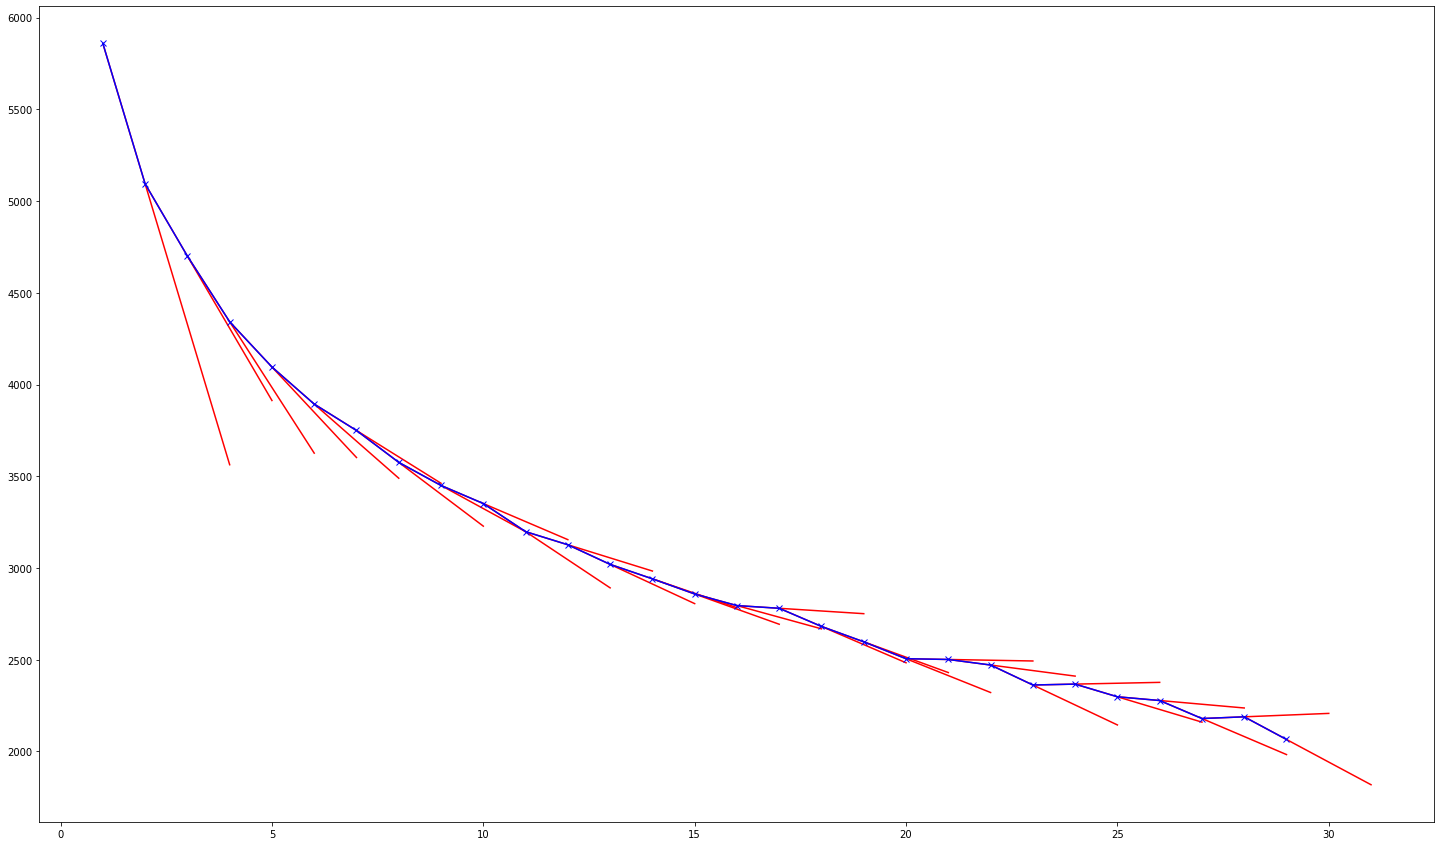

In [ ]:
w2v_file_list = ['/content/drive/MyDrive/Gilg_Theogony_n_12_ep_100_win_7.w2v',#, на самом деле 200 размерность, емб нового размера n=12 = 2 координаты + 10 цифровых меток
            ]

#w2v_file_list = ['/content/drive/MyDrive/Theogony_3_n_3_ep_851_win_11.w2v',#емб маленькой размерности много эпох

w2v_list, Ents_list, df_list, most_mentioned_Ents_list = get_w2v_vectors(w2v_file_list, MENTS_NUM)

Ents_vecs_list=[]
for n, Ents in enumerate(Ents_list):
    Ents_vecs_list.append([])
    for Entity in Ents:
        Ents_vecs_list[n].append(w2v_list[n][Entity])

for Ents_vecs in Ents_vecs_list:
    get_clusters(Ents_vecs)

In [ ]:
n_clusters_list=[7] #вообще вижу 6 (или 5), в Теогонии было 7, видимо как-то скучились

Ents_cl_list=[]
for n_clusters in n_clusters_list:
    #print(n_clusters)
    for Ents_vecs in Ents_vecs_list:
        Ents_cl_list.append(get_clusters_labels(n_clusters, Ents_vecs))
        #break
print(len(Ents_cl_list))

for k, emb_file in enumerate(w2v_file_list):
    print(emb_file, most_mentioned_Ents_list[k])
    for i, n_clusters in enumerate(n_clusters_list):#по списку кластеров выбираем номер и размер списка
        print(n_clusters,'_______')
        for n in range(n_clusters): #по номеру кластера
            #для каждого номера кластера выведем список NER ограниченный вторым списком
            print_cluster(n, Ents_list[k], Ents_cl_list[k], most_mentioned_Ents_list[k])

1
/content/drive/MyDrive/Gilg_Theogony_n_12_ep_100_win_7.w2v ['Gilgamesh', 'Enkidu', 'Zeus', 'Uruk', 'Humbaba', 'Shamash', 'Utnapishtim', 'Ocean', 'Enlil', 'Olympus', 'Urshanabi', 'Cronos', 'Uranus', 'Bull', 'Titans', 'Ninsun', 'Anu', 'Ishtar', 'Heaven', 'Aphrodite', 'Nyx', 'Iapetus', 'Hera', 'Ea', 'Tartarus', 'Heracles', 'Lugulbanda', 'Poseidon', 'Rhea', 'Cottus', 'Styx', 'Prometheus']
7 _______
************ 0 ************
Ocean
Zeus
Poseidon
Iapetus
Olympus
Tartarus
Cottus
Titans
Heracles
Styx
Prometheus
************ 1 ************
************ 2 ************
************ 3 ************
Cronos
Hera
Aphrodite
Nyx
Uranus
Rhea
************ 4 ************
Gilgamesh
Shamash
Uruk
Anu
Ishtar
Enkidu
Enlil
Ea
Ninsun
Humbaba
Lugulbanda
Bull
Heaven
Utnapishtim
Urshanabi
************ 5 ************
************ 6 ************


In [ ]:
#сейчас выведем все кластера на ограничиваясь списком
for k, emb_file in enumerate(w2v_file_list):
    print(emb_file, most_mentioned_Ents_list[k])
    for i, n_clusters in enumerate(n_clusters_list):#по списку кластеров выбираем номер и размер списка
        print(n_clusters,'_______')
        for n in range(n_clusters): #по номеру кластера
            print_cluster(n, Ents_list[k], Ents_cl_list[k], Ents_list[k])

#76 эпох те же что и в суммированном эмбидинге, кластеризовались по корпусам, единичные исключения и кластеризовались плохо. Геракл, в одной куче с реками, титанами и музами
#Разве что Гесиод попал к шумерским богам
#God попал по ошибке из Ветхого завета, тк NER по ошибке отбирал по общему списку для 3 корпусов
#считаем дальше

/content/drive/MyDrive/Gilg_Theogony_n_12_ep_100_win_7.w2v ['Gilgamesh', 'Enkidu', 'Zeus', 'Uruk', 'Humbaba', 'Shamash', 'Utnapishtim', 'Ocean', 'Enlil', 'Olympus', 'Urshanabi', 'Cronos', 'Uranus', 'Bull', 'Titans', 'Ninsun', 'Anu', 'Ishtar', 'Heaven', 'Aphrodite', 'Nyx', 'Iapetus', 'Hera', 'Ea', 'Tartarus', 'Heracles', 'Lugulbanda', 'Poseidon', 'Rhea', 'Cottus', 'Styx', 'Prometheus']
7 _______
************ 0 ************
Namtar
Euphrates
Antum
Elam
Dilmun
Ocean
Shurrupak
Heliconian
Zeus
Poseidon
Iapetus
Olympus
Olympian
Tartarus
Eros
Brontes
Steropes
Cottus
Briareos
Gyes
Cythera
Cyprus
Himerus
Titans
Hesperides
Moirocaust
Keras
Clotho
Lachesis
Atropos
Nereus
Amphitrite
Eudora
Nemertes
Graiae
Pemphredo
Enyo
Gorgons
Sthenno
Euryale
Medusa
Chrysaor
Pegasus
Geryones
Heracles
Tiryns
Orthus
Echidna
Arima
Typhaon
Cerberus
Hades
Styx
Gods
Pallas
Zelus
Hecate
Mount
Aegeum
Menoetius
Prometheus
Epimetheus
Alcmena
Theban
Mecone
Melian
Forthwith
Othyrs
Persephone
Hephaestus
Hadesoneus
Triton
Pelia

In [ ]:
#вылетает по памяти на таком объеме
'''
corp_list=['Hilg_corp.pkl','The_Genesis.pkl']
corpus_path='/content/drive/MyDrive/'
text_only=[]
for corp_name in corp_list:
    with open(corpus_path+corp_name, "rb") as fp:
        text_only += pickle.load(fp)

settings = {
          'corp_name':'Gilg_Genesis',#вылетает win=7
          #'window_size': 11, # размер окна #220427 надо - бы статистику по тексту считать #221004 - введем стандарт 11, из соображений примерно средняя длина (15-20 слов) англ предложения - артикли
          'window_size': 5, # размер окна #220427 надо - бы статистику по тексту считать #221004 - введем стандарт 11, из соображений примерно средняя длина (15-20 слов) англ предложения - артикли
          # Вложение размерности, также размер скрытого слоя.
          #'n': 3, #221004 50 сделаем стандартом, 100кб с размером 100 по памяти с трудом удерживаются в обычном колабе, сделаем запас на длину текста, попробуем остальное добрать эпохами
          #'n': 12, #220427 можно попробовать визуализировать на плоскости как 2 координаты + 10 цифр или цвета или цвета+размер окружности или маркер
          'n': 3, #220427 12 - не хватает памяти] в колабе, 7 - тоже
          'epochs': 1, # указывает количество раз, которое нужно пройти по всей выборке. В каждую эпоху мы циклически перебираем образцы тренировочного набора.
          'learning_rate': 0.01 # уровень обучения
}

corpus=[]
for text in text_only:
    #проявим уважение
    #corpus.append([word.lower() for word in text.split()])
    corpus_str=[]
    for word in text.split():
        if word in Ents:
            corpus_str.append(word)
        else:
            corpus_str.append(word.lower())
    corpus.append(corpus_str)

text_only.clear()
text=""

w2v = word2vec(settings)
training_data = w2v.generate_training_data(settings, corpus)
#w2v.train(training_data)
'''

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


83 ['God', 'Jacob', 'Joseph', 'Abraham', 'Egypt', 'Pharaoh', 'Isaac', 'Esau', 'Laban', 'Abram', 'Canaan', 'Rachel', 'Israel', 'Noah', 'Sarah', 'Lot', 'Rebekah', 'Leah', 'Judah', 'Abimelech', 'Sodom', 'Shechem', 'Cain', 'Sarai', 'King', 'Ishmael', 'Nahor', 'Come', 'Shem', 'Benjamin', 'Haran', 'Reuben', 'Egyptians', 'Hagar', 'Bethel', 'Ephron', 'Edom', 'Hittites', 'Shelah', 'Beer', 'Paddan', 'Manasseh', 'Hamor', 'Simeon', 'Hittite', 'Goshen', 'Mamre', 'Enoch', 'Ham', 'Japheth', 'Lamech', 'Canaanites', 'Ephraim', 'Seir', 'Bethuel', 'Abel', 'Terah', 'Bilhah', 'Gomorrah', 'Anah', 'Gerar', 'Philistines', 'Adah', 'Eliphaz', 'Eber', 'Milcah', 'Oholibamah', 'Zoar', 'Dinah', 'Seth', 'Zilpah', 'Zibeon', 'Nile', 'Almighty', 'Enosh', 'Levi', 'Eden', 'Canaanite', 'Basemath', 'Arpachshad', 'Machpelah', 'Dan', 'Egyptian']
15 ['Gilgamesh', 'Enkidu', 'Uruk', 'Humbaba', 'Shamash', 'Utnapishtim', 'Enlil', 'Urshanabi', 'Bull', 'Anu', 'Ninsun', 'Ishtar', 'Heaven', 'Ea', 'Lugulbanda']
(2, 3)


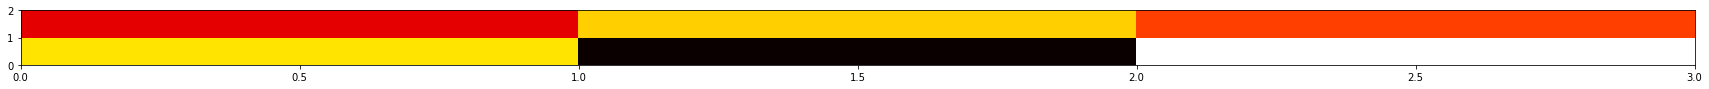

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Бытие только для n=3 рассчитал
w2v_file_list = ['/content/drive/MyDrive/The_Genesis_n_3_ep_151_win_11.w2v',  #Бытие
                 '/content/drive/MyDrive/Gilg_n_3_ep_25_win_11.w2v'         #Гильгамеш
            ]

w2v_list, Ents_list, df_list, most_mentioned_Ents_list = get_w2v_vectors(w2v_file_list, MENTS_NUM)

data=np.array([w2v_list[0]['Noah'], w2v_list[1]['Gilgamesh']])
print(data.shape)
fig = plt.figure(figsize=(30,1))#, constrained_layout=True)
plt.pcolormesh(data, cmap='hot')
plt.show()